## Import Dataset 

In [1]:
import pandas as pd

# Specify the path to the dataset
file_path = "data/young_lives_ethiopia.csv"

# Import the dataset
baseline_data = pd.read_csv(file_path)

# Display the first few rows
# baseline_data.head()

In [2]:
import pandas as pd
from tabulate import tabulate

# Assuming baseline_data is already defined
nutrition_frequencies = baseline_data.groupby(['Time', 'Nutrition_Status']).size().unstack(fill_value=0)

# Print as a table using tabulate
print("\nFrequencies of Nutrition_Status at each time point:")
# print(tabulate(nutrition_frequencies, headers='keys', tablefmt='grid'))
nutrition_frequencies


Frequencies of Nutrition_Status at each time point:


Nutrition_Status    N    S   U   US  USW   UW   W
Time                                             
2002              922  329  39  372  147  121  64

In [3]:
# Group by 'Time', 'ch_sex', and 'Nutrition_Status', and count occurrences
nutrition_frequencies = baseline_data.groupby(['ch_sex', 'Nutrition_Status']).size().unstack(fill_value=0)

# Display the frequencies
print("\nFrequencies of Nutrition_Status by gender at each time point:")
# print(nutrition_frequencies)
nutrition_frequencies


Frequencies of Nutrition_Status by gender at each time point:


Nutrition_Status    N    S   U   US  USW  UW   W
ch_sex                                          
Female            489  134  22  164   56  56  26
Male              433  195  17  208   91  65  38

In [4]:
# Group by 'Time', 'ch_sex', and 'Nutrition_Status', and count occurrences
nutrition_frequencies = baseline_data.groupby(['Region', 'Nutrition_Status']).size().unstack(fill_value=0)

# Display the frequencies
print("\nFrequencies of Nutrition_Status by gender at each time point:")
# print(nutrition_frequencies)
nutrition_frequencies


Frequencies of Nutrition_Status by gender at each time point:


Nutrition_Status    N   S   U  US  USW  UW   W
Region                                        
Addis Ababa       190  56   6  27    6   6   9
Amhara            143  89  12  96   36  13   9
Oromiya           167  53   9  94   37  25  14
SNNP              220  74   8  76   39  63  18
Tigray            202  57   4  79   29  14  14

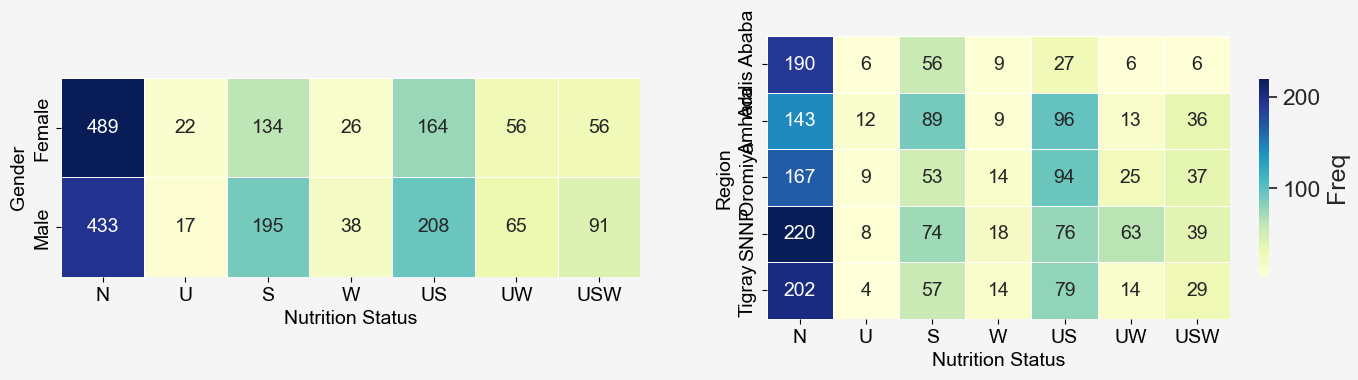

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the desired order for Nutrition_Status
nutrition_order = ["N", "U", "S", "W", "US", "UW", "USW"]

# Reorder the columns for both heatmaps
nutrition_frequencies_region = baseline_data.groupby(['Region', 'Nutrition_Status']).size().unstack(fill_value=0)
nutrition_frequencies_region = nutrition_frequencies_region[nutrition_order]  # Reorder columns

nutrition_frequencies_gender = baseline_data.groupby(['ch_sex', 'Nutrition_Status']).size().unstack(fill_value=0)
nutrition_frequencies_gender = nutrition_frequencies_gender[nutrition_order]  # Reorder columns

# Set dynamic figure size based on number of rows
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Adjusted height to 7 for publication readability


# Set the background color of the figure and axes
fig.patch.set_facecolor('whitesmoke')  # Light gray background for the entire figure

# Use a consistent style for all plots (Seaborn and Matplotlib settings)
sns.set_context("notebook", font_scale=1.5)  # Larger font size for publications
sns.set_style("whitegrid")  # White background with gridlines for readability

# Compute global min and max for color scaling across both heatmaps
vmin = min(nutrition_frequencies_gender.min().min(), nutrition_frequencies_region.min().min())
vmax = max(nutrition_frequencies_gender.max().max(), nutrition_frequencies_region.max().max())

# Plot Gender vs Nutrition Status (Left)
sns_heatmap_gender = sns.heatmap(
    nutrition_frequencies_gender,
    cmap="YlGnBu",  # Color palette
    annot=True,  # Show values inside the cells
    fmt="d",  # Format as integer
    linewidths=0.5,  # Thin gridlines
    ax=axes[0],
    annot_kws={"size": 14}, 
    cbar=False,  # Disable color bar for the first heatmap
    vmin=vmin, vmax=vmax
)
# axes[0].set_title("Nutrition Status by Gender", fontsize=18, weight='bold')
axes[0].set_xlabel("Nutrition Status", fontsize=14)
axes[0].set_ylabel("Gender", fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)  # Adjust tick label size

# Adjust Gender subplot height by scaling its aspect ratio
axes[0].set_aspect(3 * len(nutrition_frequencies_gender) / len(nutrition_frequencies_region))

# Plot Region vs Nutrition Status (Right)
sns_heatmap_region = sns.heatmap(
    nutrition_frequencies_region,
    cmap="YlGnBu",  # Color palette
    annot=True,  # Show values inside the cells
    fmt="d",  # Format as integer
    linewidths=0.5,  # Thin gridlines
    ax=axes[1],
    annot_kws={"size": 14}, 
    cbar_kws={"shrink": 0.7, "label": "Freq"}  # Shrink the colorbar and add a label
)

# axes[1].set_title("Nutrition Status by Region", fontsize=18, weight='bold')
axes[1].set_xlabel("Nutrition Status", fontsize=14)
axes[1].set_ylabel("Region", fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)  # Adjust tick label size

# Adjust layout to prevent overlapping
plt.tight_layout(pad=3.0)  # Added padding for better separation between subplots

# Show the plots
plt.show()


In [6]:
import pandas as pd

# Reorder the columns for both tables
nutrition_frequencies_region = baseline_data.groupby(['Region', 'Nutrition_Status']).size().unstack(fill_value=0)
nutrition_frequencies_region = nutrition_frequencies_region[nutrition_order]  # Reorder columns

nutrition_frequencies_gender = baseline_data.groupby(['ch_sex', 'Nutrition_Status']).size().unstack(fill_value=0)
nutrition_frequencies_gender = nutrition_frequencies_gender[nutrition_order]  # Reorder columns

# Display styled tables in Jupyter Notebook
styled_region = nutrition_frequencies_region.style.set_caption("Nutrition Status by Region").background_gradient(cmap="YlGnBu")
styled_gender = nutrition_frequencies_gender.style.set_caption("Nutrition Status by Gender").background_gradient(cmap="YlGnBu")

display(styled_gender)
display(styled_region)

## ⚠️ Missing Data Summary (Before Imputation)

In [7]:
# Count the number of missing values for each column
missing_values = baseline_data.isna().sum()

# Filter columns with missing values greater than 0
columns_with_missing = missing_values[missing_values > 0]

# Print the columns with missing values and their count
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Measles    85
DPT        85
Polio      85
dtype: int64


## ✅ Missing Data Summary (After Imputation)

In [8]:
# Fill missing values with the mode (most frequent value) for categorical columns
baseline_data_filled = baseline_data.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

# Count the number of missing values for each column
missing_values_after = baseline_data_filled.isna().sum()

# Filter columns with missing values greater than 0
columns_with_missing_after = missing_values_after[missing_values_after > 0]

# Print the columns with missing values and their count
print("Columns with missing values:")
print(columns_with_missing_after)

Columns with missing values:
Series([], dtype: int64)


In [9]:
# Count the number of missing values for each column
missing_values = baseline_data_filled.isna().sum()

# Filter columns with missing values greater than 0
columns_with_missing = missing_values[missing_values > 0]

# Print the columns with missing values and their count
print("Columns with missing values:")
print(columns_with_missing)

Columns with missing values:
Series([], dtype: int64)


## Data Type Correction

In [10]:
# Display the data types of each column
print("Data types of each column in the dataset:")
print(baseline_data_filled.dtypes)

Data types of each column in the dataset:
Subject                            int64
Time                               int64
Region                            object
Residence                         object
ch_sex                            object
ch_age_mon                         int64
BMI                              float64
ch_longterm_health_problem        object
ch_health_compared_peers          object
ch_health_general_new             object
CSW                               object
Care_Edu_New                      object
care_rln_head                     object
care_age                           int64
care_sex                          object
CGSW                              object
Dad_Edu_New                       object
mom_live_location                 object
mom_age                            int64
MOM_Edu_New                       object
Head_Edu_New                      object
head_age                           int64
head_sex                          object
hh_size        

## 📊 Data Before Handling Outliers

In [11]:
import pandas as pd

# Function to detect outliers using IQR method
def detect_outliers(data, columns):
    outlier_info = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_info[column] = outliers.any()  # True if any outlier exists, else False

    return outlier_info

# Select numerical columns, explicitly excluding 'Subject' and 'Time'
numeric_columns = baseline_data_filled.select_dtypes(include=["int64", "float64"]).columns
filtered_columns = [col for col in numeric_columns if col not in ["Subject", "Time"]]

# Detect outliers in the dataset
outlier_info = detect_outliers(baseline_data_filled, filtered_columns)

# Generate summary excluding 'Subject' and 'Time'
summary_before = baseline_data_filled[filtered_columns].describe().T  # Transpose for readability
summary_before['Outlier Available'] = summary_before.index.map(lambda col: outlier_info.get(col, False))

# Display the cleaned summary
print("Summary before Handling Outliers:")
summary_before[['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std', 'Outlier Available']]

Summary before Handling Outliers:


count       mean        min        25%        50%  \
ch_age_mon            1994.0  11.678034   4.000000   9.000000  12.000000   
BMI                   1994.0  15.880303   8.840761  14.572074  15.787198   
care_age              1994.0  27.983952  10.000000  23.000000  27.000000   
mom_age               1994.0  27.455868  15.000000  23.000000  27.000000   
head_age              1994.0  37.477934  17.000000  30.000000  35.000000   
hh_size               1994.0   5.721163   2.000000   4.000000   5.000000   
Num_antenatal_visits  1994.0   2.276830   0.000000   0.000000   1.000000   
dadage                1994.0  37.107823  19.000000  30.000000  36.000000   

                            75%         max        std  Outlier Available  
ch_age_mon            15.000000   17.000000   3.567941              False  
BMI                   17.062017   27.040881   2.142194               True  
care_age              31.000000   70.000000   7.350841               True  
mom_age               31.000000   55.000000   6.417981               True  
head_age              42.000000  110.000000  10.898186               True  
hh_size                7.000000   16.000000   2.153536               True  
Num_antenatal_visits   4.000000   16.000000   2.728673               True  
dadage                42.000000   87.000000   9.172479               True

## 📊 Data After Handling Outliers

In [12]:
import pandas as pd

# Function to detect outliers using IQR method
def detect_outliers(data, columns):
    outlier_info = {}
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Check if there are any outliers
        outliers = (data[column] < lower_bound) | (data[column] > upper_bound)
        outlier_info[column] = outliers.any()  # True if any outlier exists, else False

    return outlier_info

# Function to cap outliers, excluding "Subject" and "Time"
def cap_outliers(data, columns):
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers to the bounds
        data[column] = data[column].apply(lambda x: max(min(x, upper_bound), lower_bound))

    return data

# Select numerical columns, excluding "Subject" and "Time"
numeric_columns = baseline_data_filled.select_dtypes(include=["int64", "float64"]).columns
filtered_columns = [col for col in numeric_columns if col not in ["Subject", "Time"]]

# Handling outliers by capping the values
baseline_data_capped = cap_outliers(baseline_data_filled.copy(), filtered_columns)

# Summary after handling outliers with capping (excluding "Subject" and "Time")
summary_after_capping = baseline_data_capped[filtered_columns].describe().T
summary_after_capping['Outlier Available'] = summary_after_capping.index.map(lambda col: detect_outliers(baseline_data_capped, [col])[col])

# Display the summary after handling outliers with capping
print("Summary after Capping Outliers:")
summary_after_capping[['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std', 'Outlier Available']]

Summary after Capping Outliers:


count       mean        min        25%        50%  \
ch_age_mon            1994.0  11.678034   4.000000   9.000000  12.000000   
BMI                   1994.0  15.848517  10.837159  14.572074  15.787198   
care_age              1994.0  27.740722  11.000000  23.000000  27.000000   
mom_age               1994.0  27.404213  15.000000  23.000000  27.000000   
head_age              1994.0  37.166499  17.000000  30.000000  35.000000   
hh_size               1994.0   5.705617   2.000000   4.000000   5.000000   
Num_antenatal_visits  1994.0   2.273821   0.000000   0.000000   1.000000   
dadage                1994.0  36.984453  19.000000  30.000000  36.000000   

                            75%        max        std  Outlier Available  
ch_age_mon            15.000000  17.000000   3.567941              False  
BMI                   17.062017  20.796932   2.005206              False  
care_age              31.000000  43.000000   6.587744              False  
mom_age               31.000000  43.000000   6.268223              False  
head_age              42.000000  60.000000  10.009697              False  
hh_size                7.000000  11.500000   2.104185              False  
Num_antenatal_visits   4.000000  10.000000   2.716814              False  
dadage                42.000000  60.000000   8.770032              False

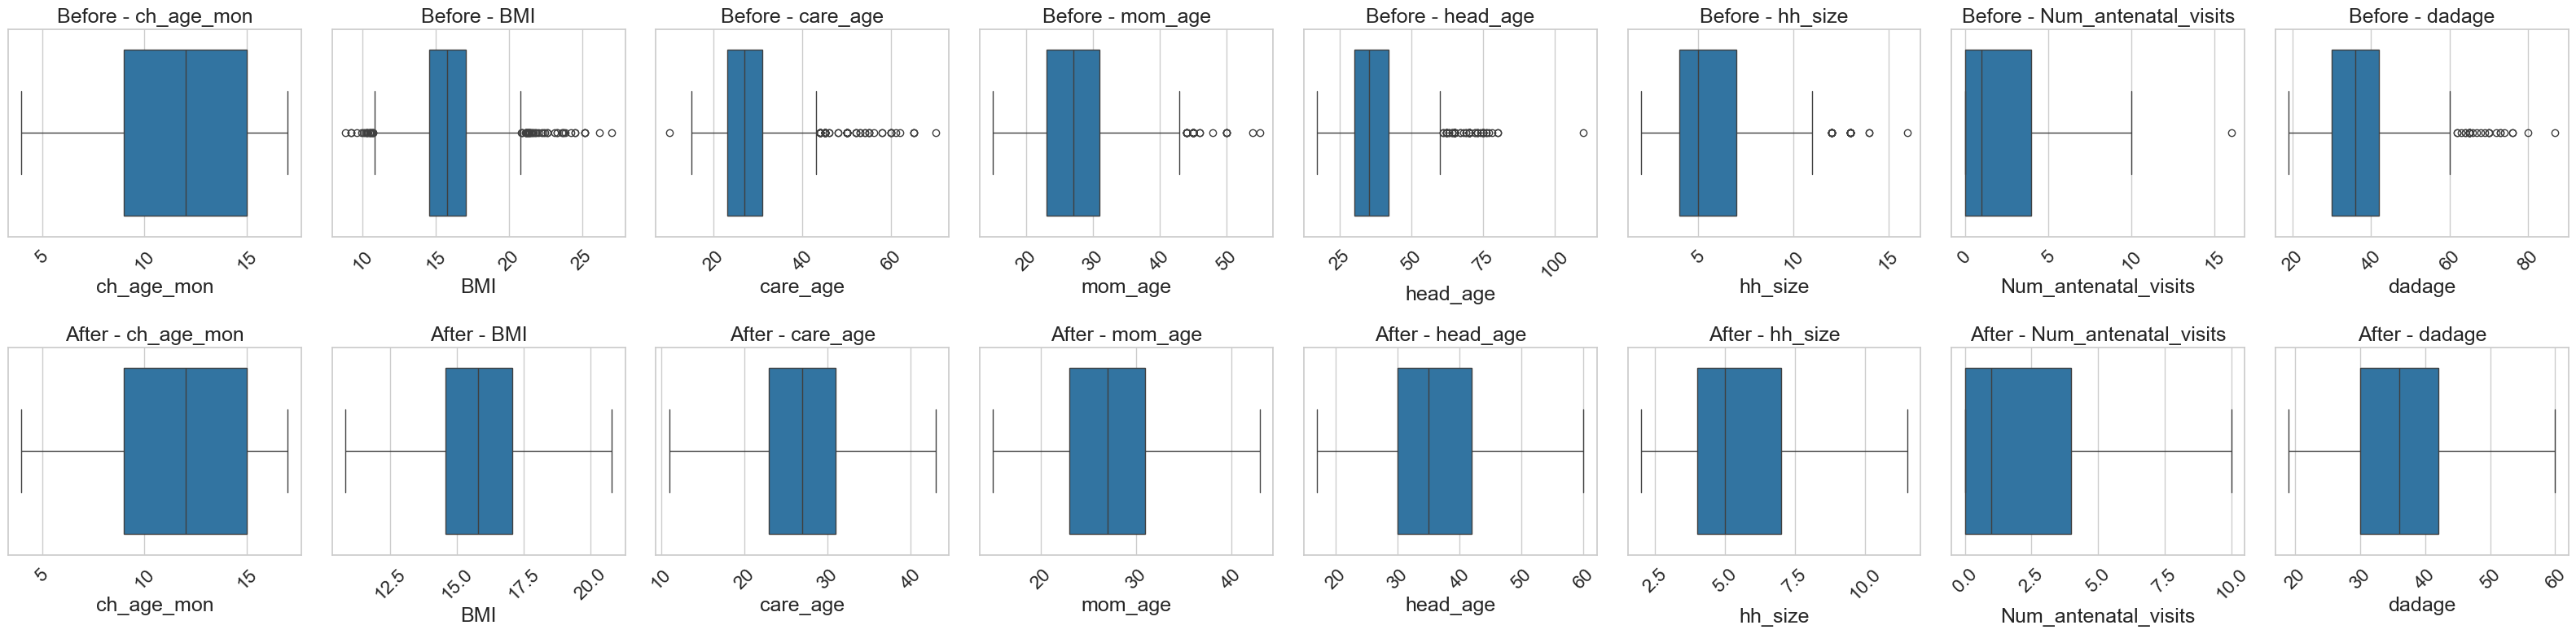

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plots for each variable before and after handling outliers
def plot_boxplots_before_after(data_before, data_after, columns):
    num_columns = len(columns)
    
    if num_columns == 0:
        print("No numeric columns to plot after exclusions.")
        return
    
    fig, axes = plt.subplots(nrows=2, ncols=num_columns, figsize=(num_columns * 4, 8))

    # Ensure axes is always an iterable, even for a single column
    if num_columns == 1:
        axes = np.array([axes]).reshape(2, 1)

    # Plotting the first row (before handling outliers)
    for i, column in enumerate(columns):
        sns.boxplot(data=data_before, x=column, ax=axes[0, i])
        axes[0, i].set_title(f'Before - {column}')
        axes[0, i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

    # Plotting the second row (after handling outliers)
    for i, column in enumerate(columns):
        sns.boxplot(data=data_after, x=column, ax=axes[1, i])
        axes[1, i].set_title(f'After - {column}')
        axes[1, i].tick_params(axis='x', rotation=45)  # Rotate x labels for readability

    # Adjust the layout for better spacing
    plt.subplots_adjust(left=0.05, right=0.95, bottom=0.1, top=0.95)
    plt.tight_layout()
    plt.show()

# Select numeric columns, excluding "Subject" and "Time"
numeric_columns = baseline_data_filled.select_dtypes(include=["int64", "float64"]).columns
filtered_columns = [col for col in numeric_columns if col not in ["Subject", "Time"]]

# Plot boxplots for the variables before and after handling outliers
plot_boxplots_before_after(baseline_data_filled, baseline_data_capped, filtered_columns)

## Confirmation

In [14]:
import numpy as np

# Function to detect outliers using Z-score method
def detect_outliers_zscore(data, columns, threshold=3):
    outlier_info = {}
    for column in columns:
        # Calculate Z-scores
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        
        # Check if any Z-score is greater than the threshold (outlier)
        outliers = np.abs(z_scores) > threshold
        outlier_info[column] = outliers.any()  # True if any outlier exists, else False
    
    return outlier_info

# Select numeric columns, excluding "Subject" and "Time"
numeric_columns = baseline_data_capped.select_dtypes(include=["int64", "float64"]).columns
filtered_columns = [col for col in numeric_columns if col not in ["Subject", "Time"]]

# Detect outliers in the dataset using Z-score
outlier_info_zscore = detect_outliers_zscore(baseline_data_capped, filtered_columns)

# Summary to confirm outliers after handling with capping
summary_after_zscore = baseline_data_capped.describe().T.loc[filtered_columns]
summary_after_zscore['Outlier Available (Z-score)'] = [outlier_info_zscore[col] for col in summary_after_zscore.index]

# Display the summary after using Z-score for outlier detection
print("Summary after Z-score Outlier Detection:")
summary_after_zscore[['count', 'mean', 'min', '25%', '50%', '75%', 'max', 'std', 'Outlier Available (Z-score)']]

Summary after Z-score Outlier Detection:


count       mean        min        25%        50%  \
ch_age_mon            1994.0  11.678034   4.000000   9.000000  12.000000   
BMI                   1994.0  15.848517  10.837159  14.572074  15.787198   
care_age              1994.0  27.740722  11.000000  23.000000  27.000000   
mom_age               1994.0  27.404213  15.000000  23.000000  27.000000   
head_age              1994.0  37.166499  17.000000  30.000000  35.000000   
hh_size               1994.0   5.705617   2.000000   4.000000   5.000000   
Num_antenatal_visits  1994.0   2.273821   0.000000   0.000000   1.000000   
dadage                1994.0  36.984453  19.000000  30.000000  36.000000   

                            75%        max        std  \
ch_age_mon            15.000000  17.000000   3.567941   
BMI                   17.062017  20.796932   2.005206   
care_age              31.000000  43.000000   6.587744   
mom_age               31.000000  43.000000   6.268223   
head_age              42.000000  60.000000  10.009697   
hh_size                7.000000  11.500000   2.104185   
Num_antenatal_visits   4.000000  10.000000   2.716814   
dadage                42.000000  60.000000   8.770032   

                      Outlier Available (Z-score)  
ch_age_mon                                  False  
BMI                                         False  
care_age                                    False  
mom_age                                     False  
head_age                                    False  
hh_size                                     False  
Num_antenatal_visits                        False  
dadage                                      False

## Show Statistical Summaries

In [15]:
# Function to show statistical summaries for continuous columns
def show_statistical_summary(data):
    # Select numeric columns, excluding "Subject" and "Time"
    continuous_columns = data.select_dtypes(include=["int64", "float64"]).columns
    filtered_columns = [col for col in continuous_columns if col not in ["Subject", "Time"]]
    
    # Get the statistical summary of the filtered continuous columns
    summary = data[filtered_columns].describe().T  # Transpose for better readability
    
    return summary

# Show statistical summaries for continuous columns in baseline_data_capped
statistical_summary = show_statistical_summary(baseline_data_capped)

# Display the statistical summary
print("Statistical Summary of Continuous Columns (Excluding 'Subject' and 'Time'):")
statistical_summary

Statistical Summary of Continuous Columns (Excluding 'Subject' and 'Time'):


count       mean        std        min        25%  \
ch_age_mon            1994.0  11.678034   3.567941   4.000000   9.000000   
BMI                   1994.0  15.848517   2.005206  10.837159  14.572074   
care_age              1994.0  27.740722   6.587744  11.000000  23.000000   
mom_age               1994.0  27.404213   6.268223  15.000000  23.000000   
head_age              1994.0  37.166499  10.009697  17.000000  30.000000   
hh_size               1994.0   5.705617   2.104185   2.000000   4.000000   
Num_antenatal_visits  1994.0   2.273821   2.716814   0.000000   0.000000   
dadage                1994.0  36.984453   8.770032  19.000000  30.000000   

                            50%        75%        max  
ch_age_mon            12.000000  15.000000  17.000000  
BMI                   15.787198  17.062017  20.796932  
care_age              27.000000  31.000000  43.000000  
mom_age               27.000000  31.000000  43.000000  
head_age              35.000000  42.000000  60.000000  
hh_size                5.000000   7.000000  11.500000  
Num_antenatal_visits   1.000000   4.000000  10.000000  
dadage                36.000000  42.000000  60.000000

## Distribution

In [16]:
import pandas as pd
import os

# Detect categorical columns (both object and category data types)
categorical_columns = baseline_data_capped.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'Nutrition_Status' from the list of categorical columns to avoid self-crosstabulation
categorical_columns = [col for col in categorical_columns if col != 'Nutrition_Status']

# Define the desired column order for Nutrition_Status
desired_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Create an empty DataFrame to store the combined results
combined_results = pd.DataFrame()

# Perform cross-tabulation for each categorical variable, setting Nutrition_Status as columns and ordering them
for column in categorical_columns:
    # Create the count cross-tabulation
    cross_tab = pd.crosstab(baseline_data_capped[column], baseline_data['Nutrition_Status'])
    
    # Reorder columns to the desired order
    cross_tab = cross_tab[desired_order]
    
    # Compute the percentage (row-wise percentage)
    cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    
    # Format the output to show count (n) and percentage (n%)
    formatted_cross_tab = cross_tab.astype(str) + " (" + cross_tab_percentage.round(2).astype(str) + "%)"
    
    # Add the column name as a prefix to each row for identification
    formatted_cross_tab['Variable'] = column
    
    # Concatenate this table with the previous ones
    combined_results = pd.concat([combined_results, formatted_cross_tab])

# Specify the output path for the exported Excel file
output_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\cross_tab_results.xlsx"

# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Write the combined results to one sheet
combined_results.to_excel(output_path, index=True, sheet_name="Cross_Tabulation")

print(f"Cross-tabulation tables have been exported to '{output_path}'.")

Cross-tabulation tables have been exported to 'D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\cross_tab_results.xlsx'.


## Bivaraite Analysis

In [17]:
import pandas as pd
import os
from scipy.stats import chi2_contingency


# Step 1: Transform 'Nutrition_Status' to two categories: 'Healthy' and 'Nourished'
baseline_data_capped['Nutrition_Status_Transformed'] = baseline_data_capped['Nutrition_Status'].apply(
    lambda x: 'Healthy' if x == 'N' else 'Nourished'
)

# Step 2: Detect categorical columns (both object and category data types)
categorical_columns = baseline_data_capped.select_dtypes(include=['object', 'category']).columns.tolist()

# Remove 'Nutrition_Status' and 'Nutrition_Status_Transformed' from the list of categorical columns to avoid self-crosstabulation
categorical_columns = [col for col in categorical_columns if col not in ['Nutrition_Status', 'Nutrition_Status_Transformed']]

# Specify the output path for the exported Excel file
output_path = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\bivariate_analysis_results.xlsx"

# Ensure the directory exists
os.makedirs(os.path.dirname(output_path), exist_ok=True)

# Create an empty DataFrame to store the combined results
combined_results_bivariate = pd.DataFrame()

# Perform bivariate cross-tabulation for each categorical variable, comparing with the transformed Nutrition_Status
for column in categorical_columns:
    # Create the count cross-tabulation with transformed Nutrition_Status as columns
    cross_tab_bivariate = pd.crosstab(baseline_data_capped[column], baseline_data_capped['Nutrition_Status_Transformed'])

    # Calculate row-wise percentages for Healthy and Nourished categories
    cross_tab_percentage_bivariate = cross_tab_bivariate.div(cross_tab_bivariate.sum(axis=1), axis=0) * 100
    
    # Extract the count and percentage into a single formatted string
    healthy_n = cross_tab_bivariate['Healthy']
    nourished_n = cross_tab_bivariate['Nourished']
    healthy_pct = cross_tab_percentage_bivariate['Healthy'].round(2)
    nourished_pct = cross_tab_percentage_bivariate['Nourished'].round(2)
    
    # Perform the Chi-Square Test
    chi2_stat, p_value, dof, expected = chi2_contingency(cross_tab_bivariate)

    # Prepare the result for the categories
    result_df = pd.DataFrame({
        'Variables': [column] * len(cross_tab_bivariate),
        'Categories': cross_tab_bivariate.index,
        'Healthy n(%)': healthy_n.astype(str) + " (" + healthy_pct.astype(str) + "%)",
        'Nourished n(%)': nourished_n.astype(str) + " (" + nourished_pct.astype(str) + "%)",
        'Chi-Square Statistic': [chi2_stat] * len(cross_tab_bivariate),  # Chi-Square statistic is the same for each category
        'p-value': [p_value] * len(cross_tab_bivariate)  # p-value is the same for each category
    })

    # Set Chi-Square Statistic and p-value columns to NaN for all rows except the first one
    result_df.iloc[1:, result_df.columns.get_loc('Variables')] = None
    result_df.iloc[1:, result_df.columns.get_loc('Chi-Square Statistic')] = None
    result_df.iloc[1:, result_df.columns.get_loc('p-value')] = None

    # Concatenate this result to the combined DataFrame
    combined_results_bivariate = pd.concat([combined_results_bivariate, result_df])

# Write the combined results to one sheet
with pd.ExcelWriter(output_path) as writer:
    combined_results_bivariate.to_excel(writer, index=False, sheet_name="Bivariate_Analysis")

print(f"Bivariate analysis results have been exported to '{output_path}'.")


Bivariate analysis results have been exported to 'D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Dataset\bivariate_analysis_results.xlsx'.


## Data Visualizations

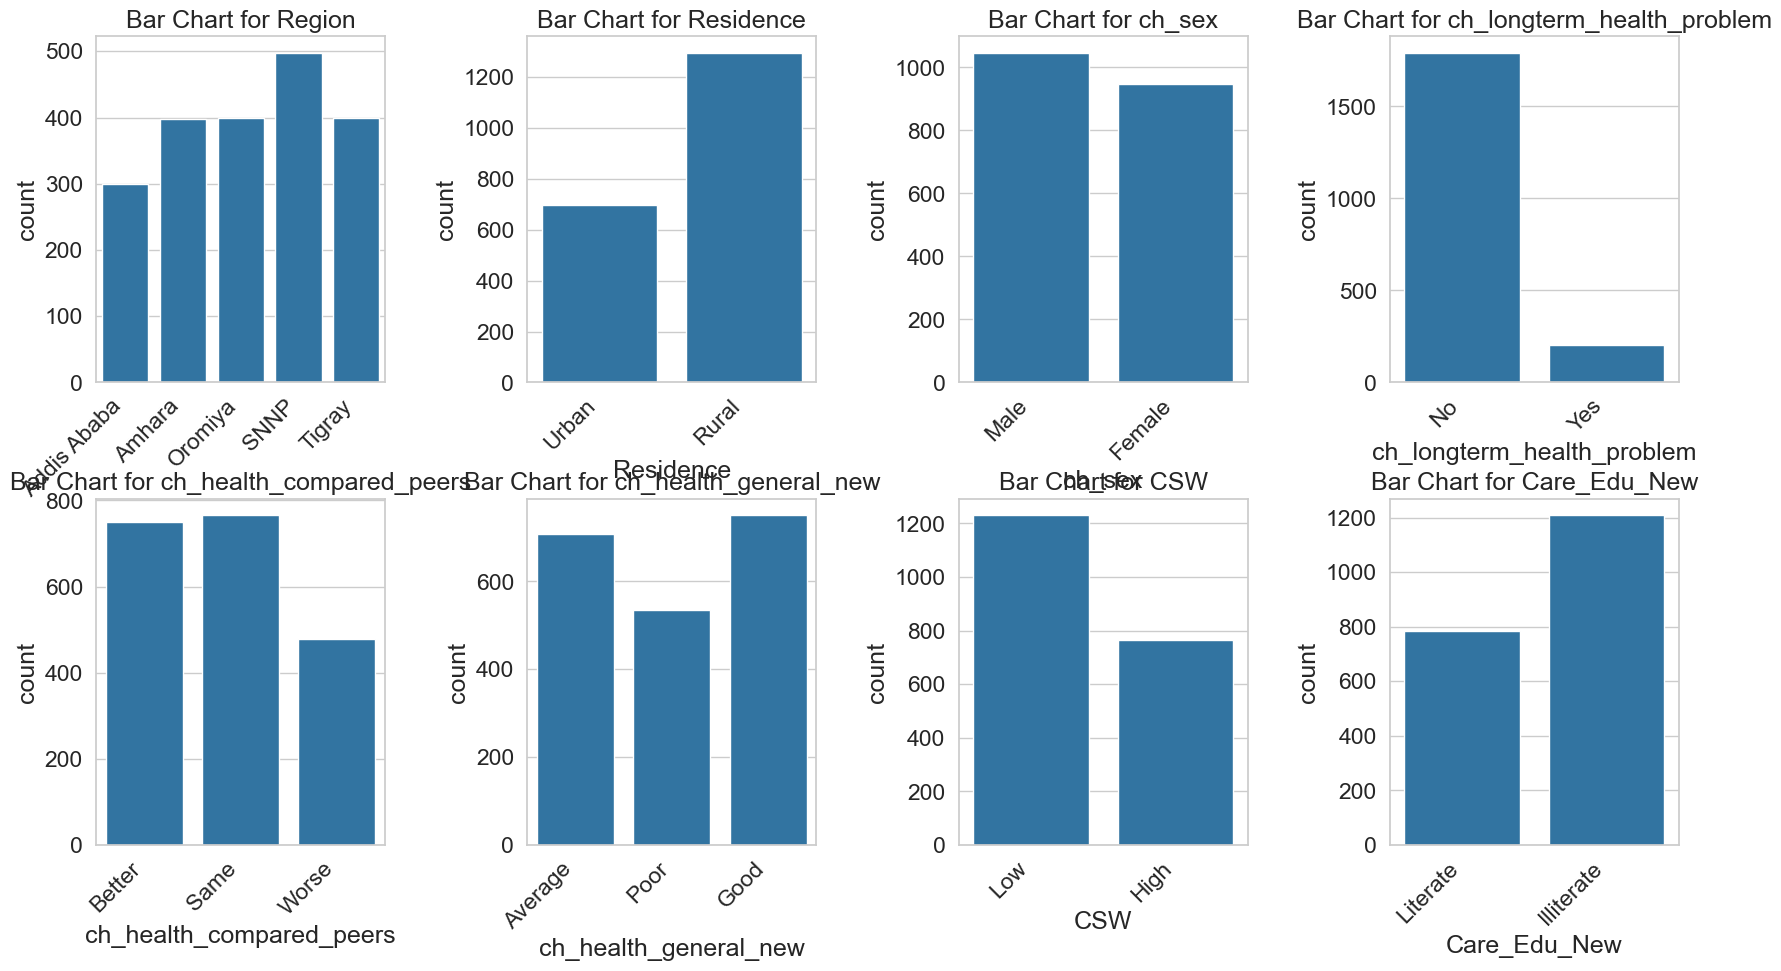

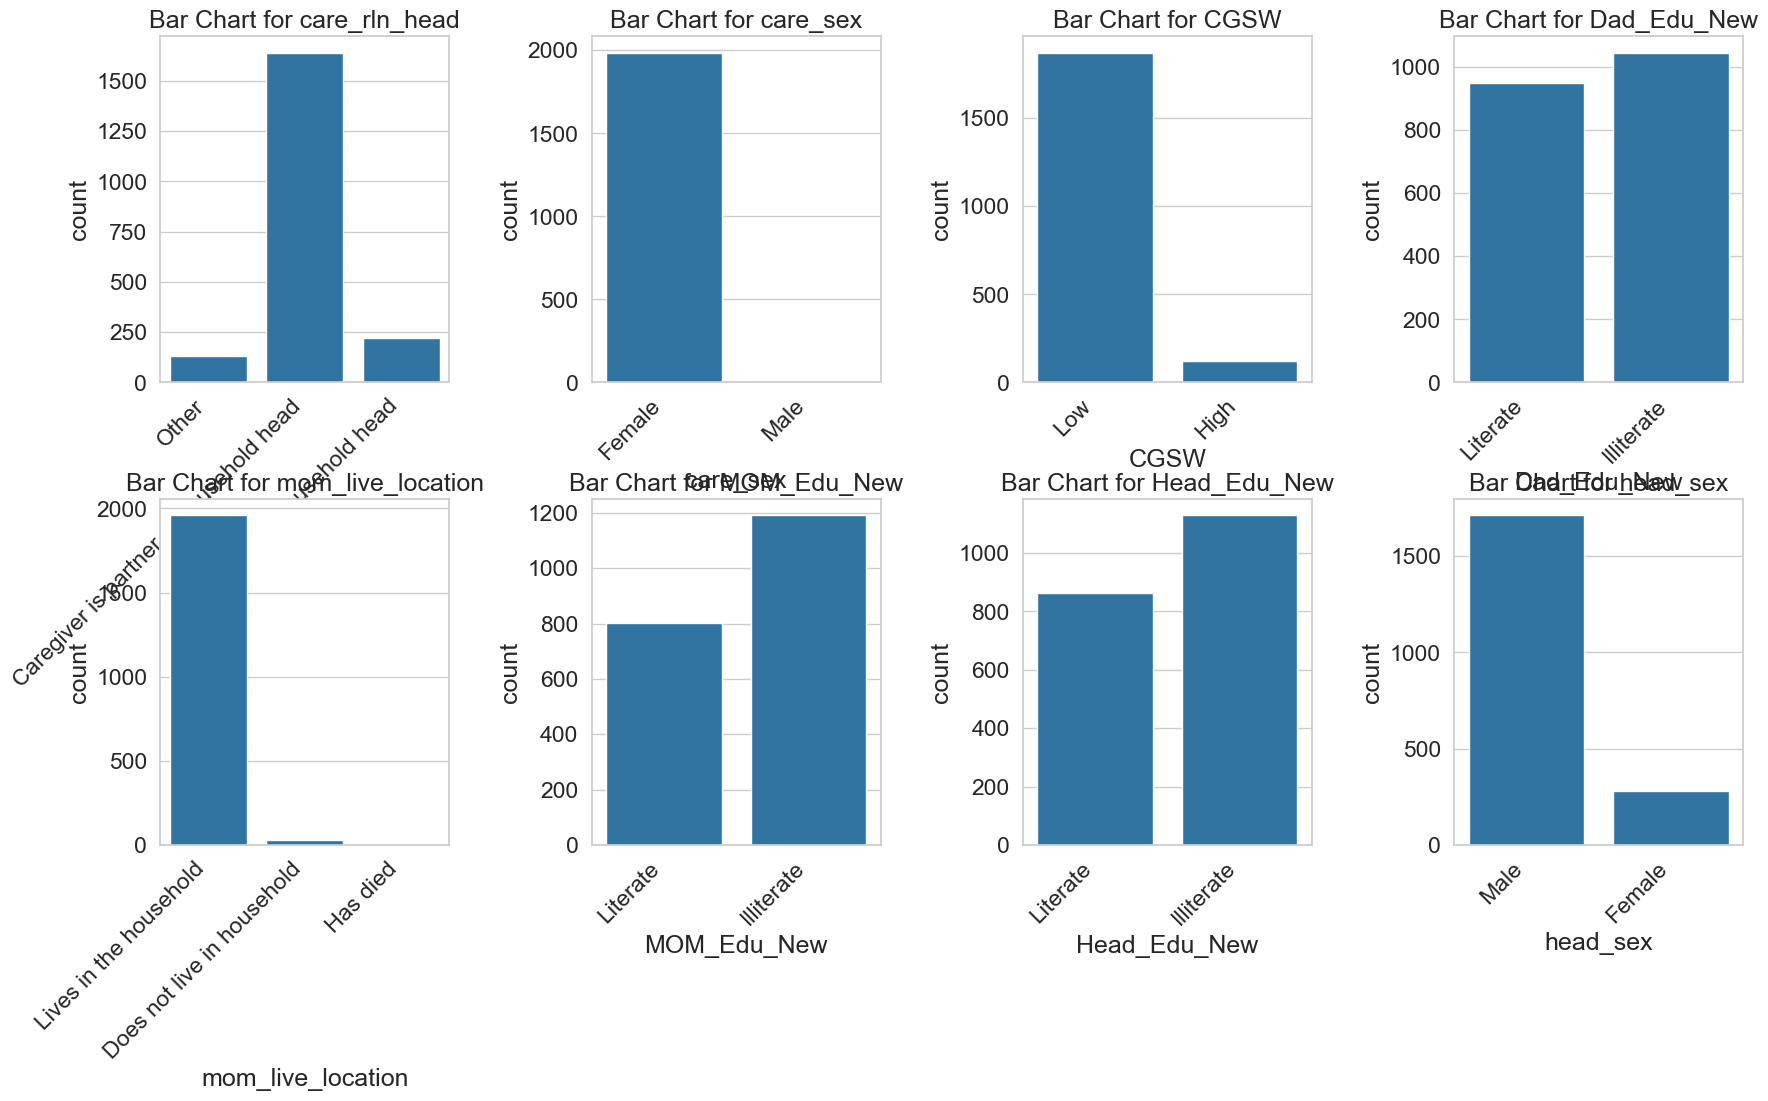

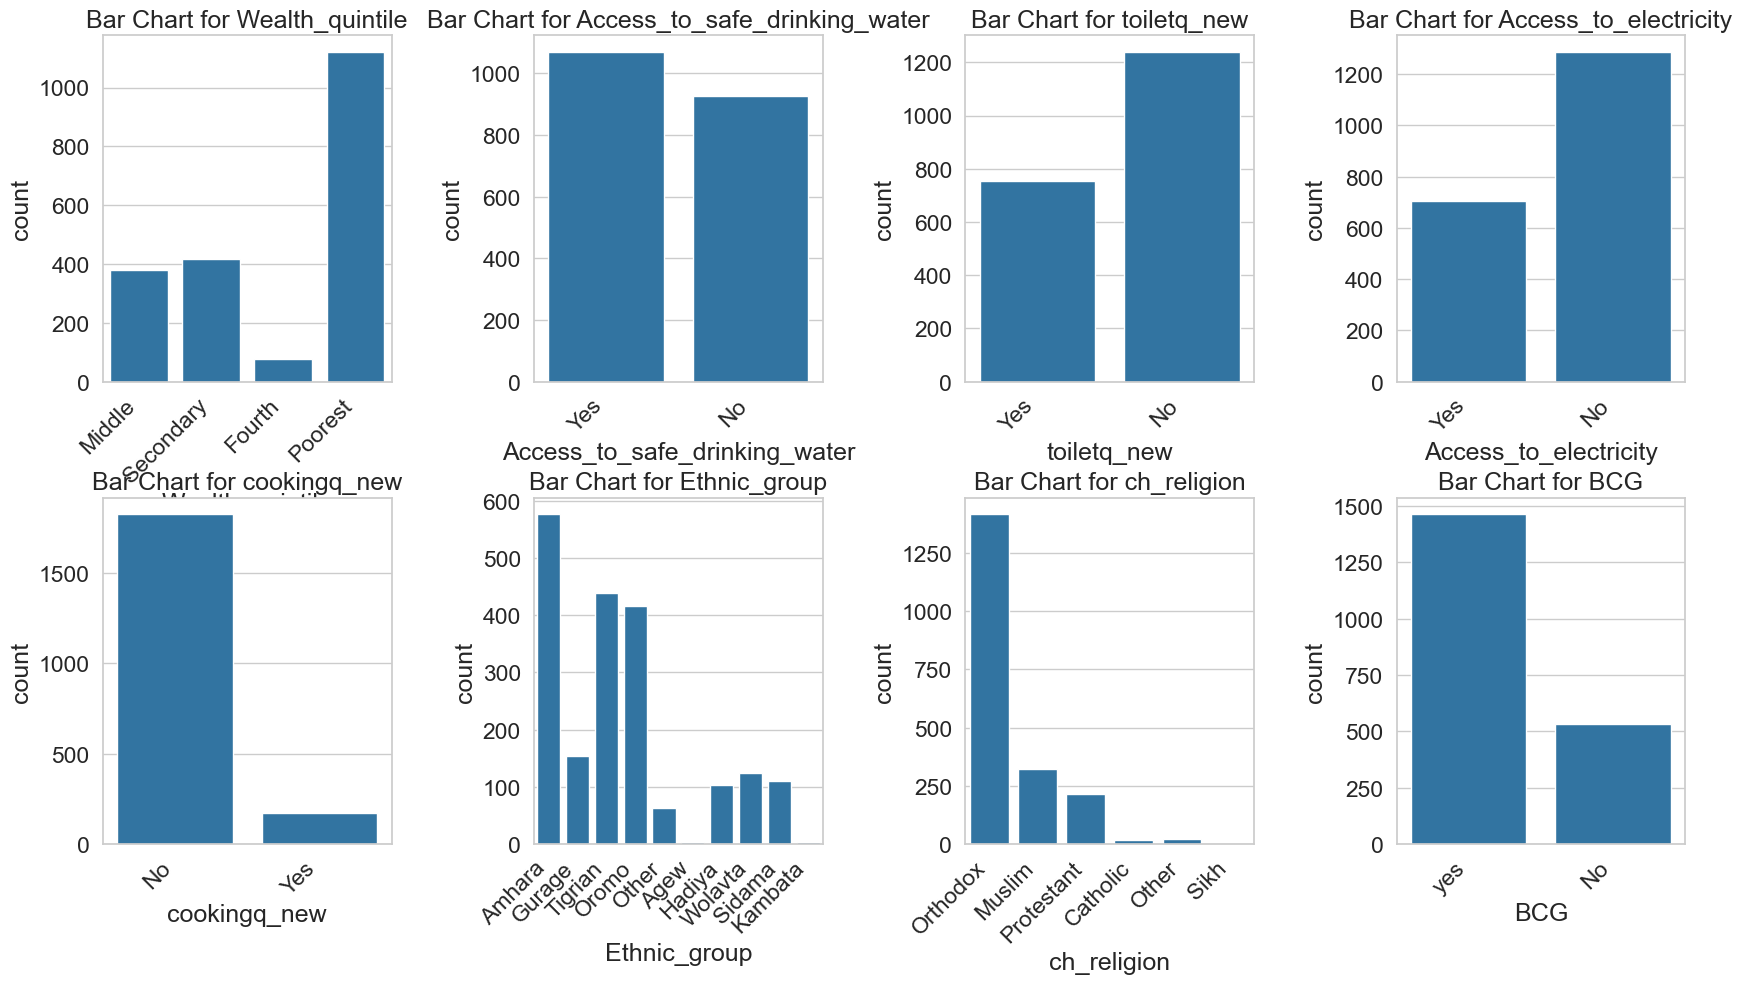

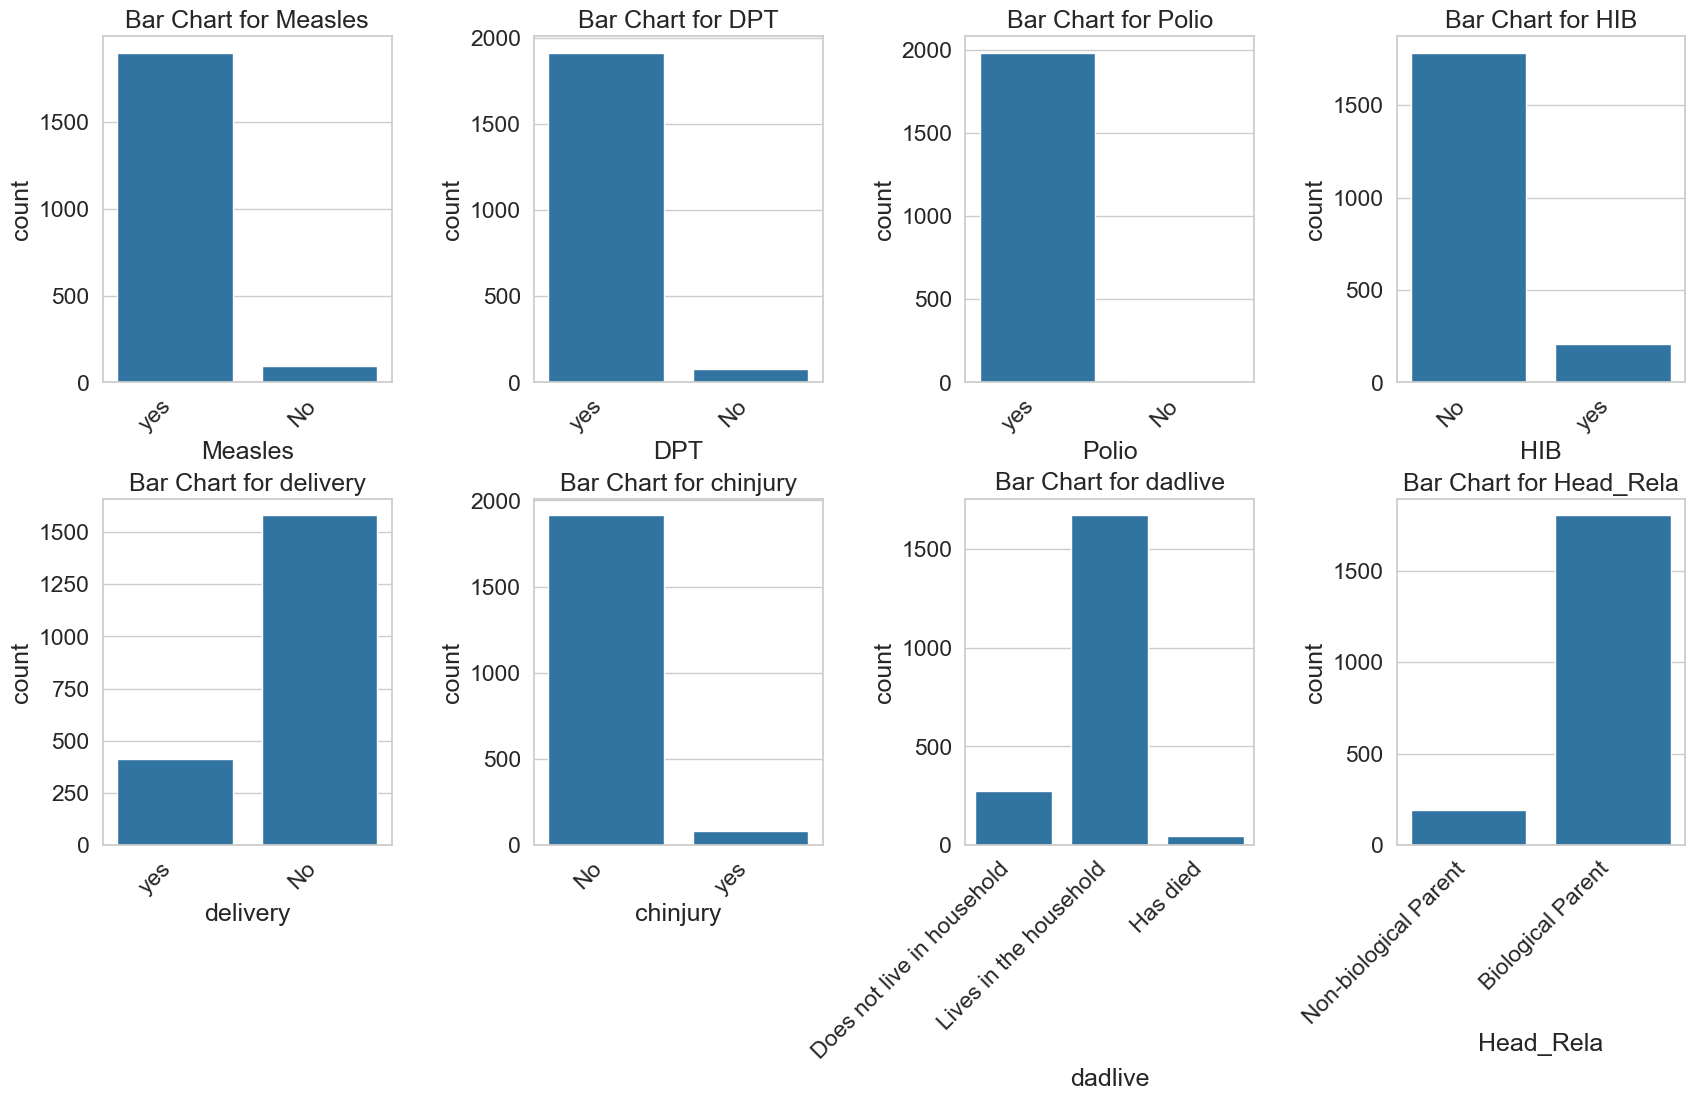

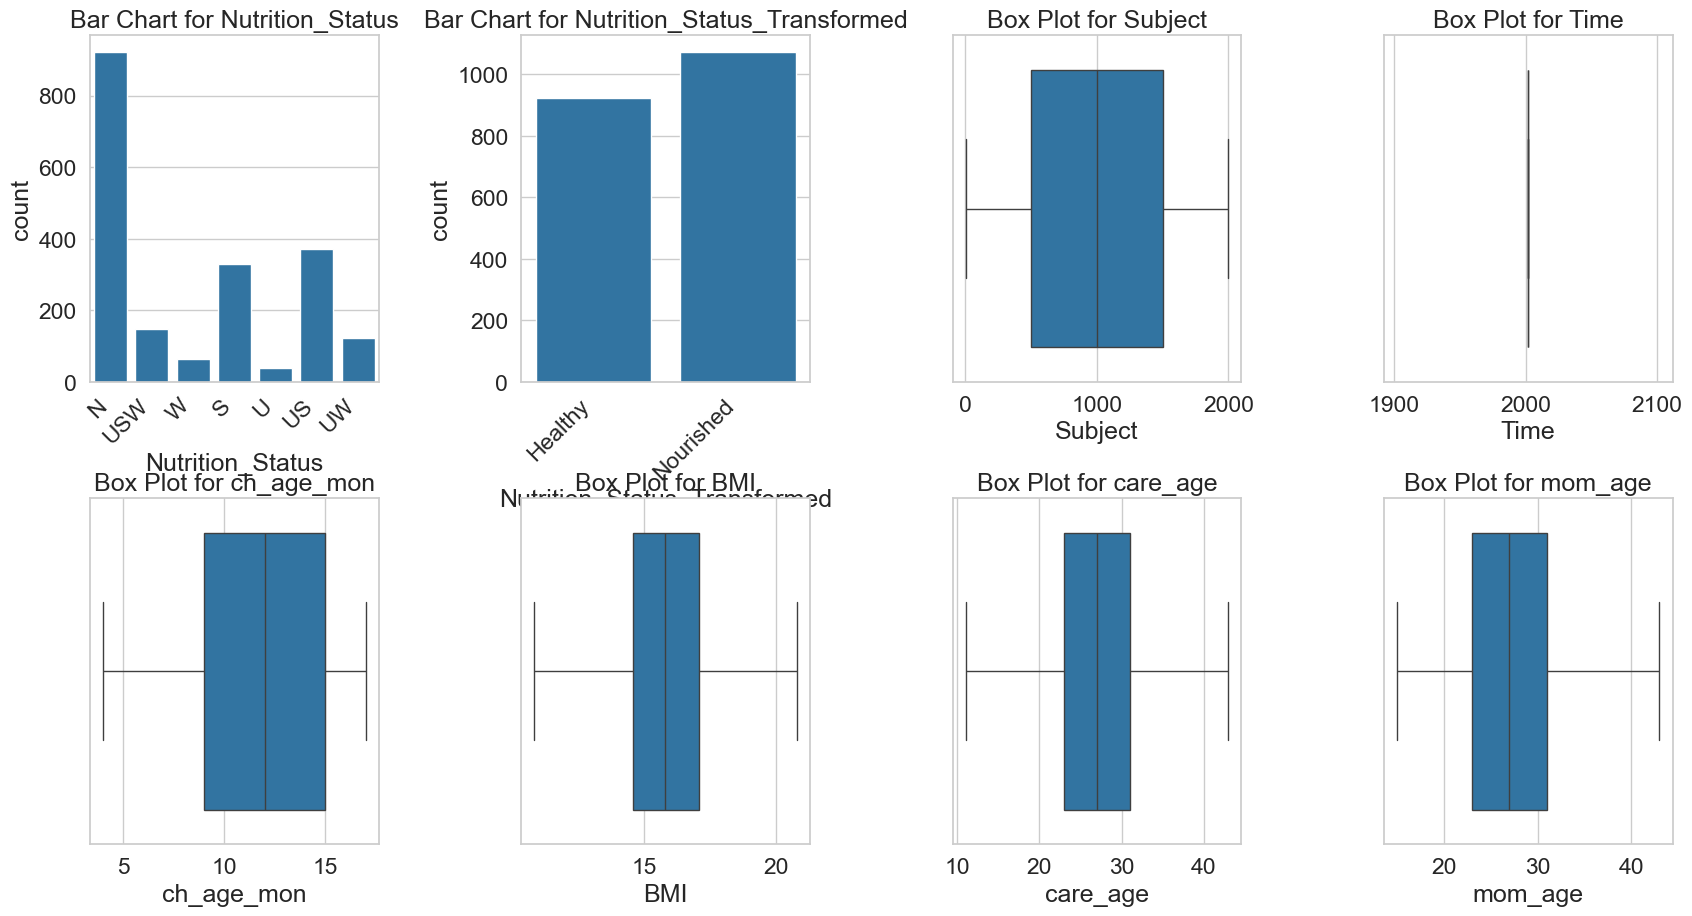

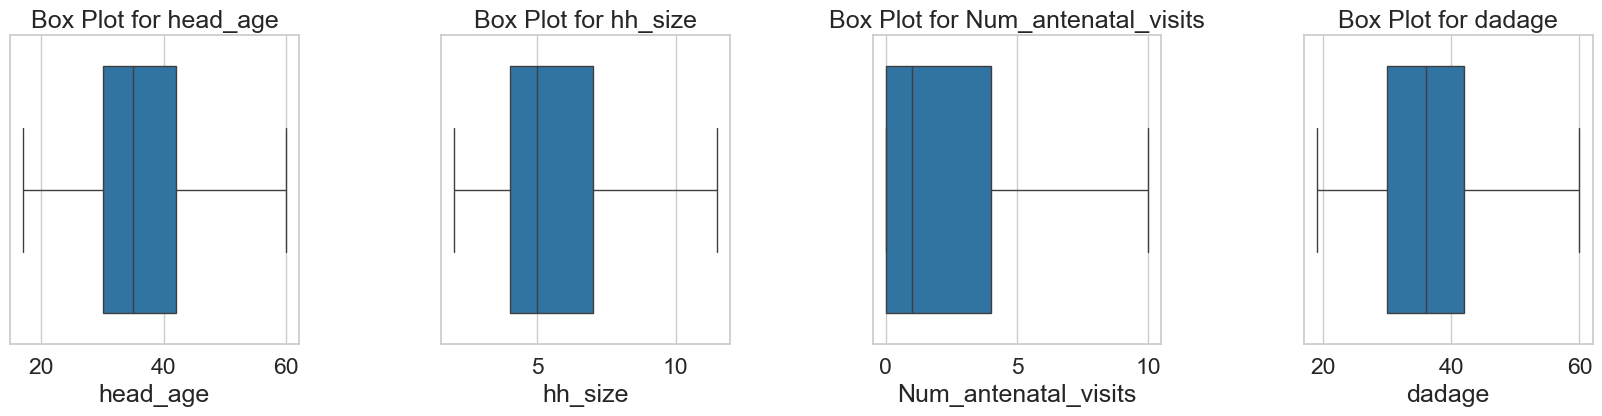

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

# Function to create data visualizations and split plots every 2 rows
def plot_data_visualizations(data):
    # Identify categorical and continuous columns
    categorical_columns = data.select_dtypes(include=["object"]).columns
    continuous_columns = data.select_dtypes(include=["int64", "float64"]).columns
    all_columns = list(categorical_columns) + list(continuous_columns)
    
    # Define the number of columns per row
    num_columns = 4  # Adjust as needed
    num_rows_per_plot = 2  # Split every 2 rows

    # Compute total rows needed
    total_plots = len(all_columns)
    total_rows = (total_plots + num_columns - 1) // num_columns  # Total number of rows needed

    # Loop through and create separate figures for every 2 rows
    for start_row in range(0, total_rows, num_rows_per_plot):
        end_row = min(start_row + num_rows_per_plot, total_rows)
        plots_in_this_figure = (end_row - start_row) * num_columns
        
        fig, axes = plt.subplots(end_row - start_row, num_columns, figsize=(18, 5 * (end_row - start_row)))
        fig.tight_layout(pad=3.0)

        # Flatten axes for easy indexing
        axes = np.array(axes).flatten()

        # Plot each variable
        for i, col_index in enumerate(range(start_row * num_columns, min(start_row * num_columns + plots_in_this_figure, total_plots))):
            column = all_columns[col_index]
            if column in categorical_columns:
                sns.countplot(x=column, data=data, ax=axes[i])
                axes[i].set_title(f'Bar Chart for {column}')
                # Set the ticks first before applying tick labels
                axes[i].set_xticks(range(len(axes[i].get_xticklabels())))
                axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
            elif column in continuous_columns:
                sns.boxplot(x=data[column], ax=axes[i])
                axes[i].set_title(f'Box Plot for {column}')
        
        # Hide unused subplots in the last row
        for j in range(i + 1, len(axes)):
            axes[j].axis('off')

        plt.show()  # Show the current figure before creating the next one

    # HTML to enable horizontal scrolling in Jupyter
    display(HTML('<style>.container { width:100% !important; }</style>'))

# Generate data visualizations for baseline_data_capped
plot_data_visualizations(baseline_data_capped)

## Correlation heatmap plot

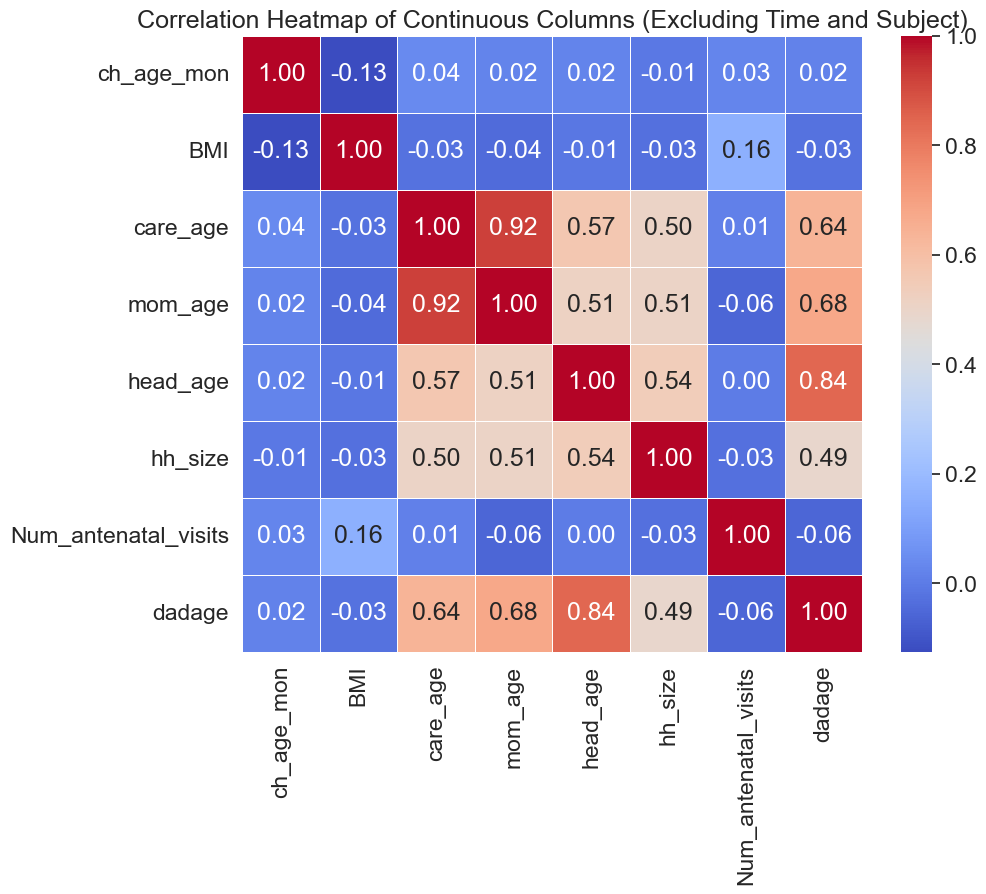

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create a heatmap for the correlation matrix excluding 'Time' and 'Subject'
def plot_heatmap(data):
    # Select continuous (numeric) columns and exclude 'Time' and 'Subject'
    continuous_columns = data.select_dtypes(include=["int64", "float64"]).columns
    
    # Remove 'Time' and 'Subject' from the list if they exist
    if 'Time' in continuous_columns:
        continuous_columns = continuous_columns[continuous_columns != 'Time']
    if 'Subject' in continuous_columns:
        continuous_columns = continuous_columns[continuous_columns != 'Subject']
    
    # Calculate the correlation matrix
    correlation_matrix = data[continuous_columns].corr()

    # Set up the plot
    plt.figure(figsize=(10, 8))
    
    # Create the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
    
    # Set the title
    plt.title('Correlation Heatmap of Continuous Columns (Excluding Time and Subject)')
    
    # Display the plot
    plt.show()

# Generate the heatmap for baseline_data_capped excluding 'Time' and 'Subject'
plot_heatmap(baseline_data_capped)

## 🔠 One-Hot Encoding

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def one_hot_encode(data, columns):
    """Perform One-Hot Encoding on categorical columns."""
    return pd.get_dummies(data, columns=columns, drop_first=True)  # drop_first=True to avoid dummy variable trap

# Identify categorical columns in your dataset
categorical_columns = baseline_data_capped.select_dtypes(include=["object"]).columns

# Exclude the first 2 columns, the last column, and the 'Nutrition_Status' column
excluded_columns = list(baseline_data_capped.columns[:2]) + [baseline_data_capped.columns[-1], 'Nutrition_Status']
columns_to_encode = [col for col in categorical_columns if col not in excluded_columns]

# Perform One-Hot Encoding
baseline_data_encoded = one_hot_encode(baseline_data_capped, columns_to_encode)

# Ensure 'Nutrition_Status' is included and move it to the last column
baseline_data_encoded = pd.concat([baseline_data_encoded, baseline_data_capped[['Nutrition_Status']]], axis=1)

# Encode target variable (Y) using LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(baseline_data_capped['Nutrition_Status'])  # Assuming 'Nutrition_Status' is the target

baseline_data_encoded = baseline_data_encoded.drop(columns=['Nutrition_Status_Transformed'])

# Display the encoded data and verify column order
print("Data after One-Hot Encoding and column reordering:")
print(baseline_data_encoded.columns[-1])  # Should print 'Nutrition_Status'
baseline_data_encoded.head()

Data after One-Hot Encoding and column reordering:
Nutrition_Status


Subject  Time  ch_age_mon        BMI  care_age  mom_age  head_age  hh_size  \
0        1  2002          14  15.111111      19.0     19.0      43.0     11.5   
1        2  2002           8  16.219723      20.0     20.0      32.0      3.0   
2        3  2002          12  12.602394      43.0     39.0      60.0      7.0   
3        4  2002          11  18.845467      18.0     35.0      40.0      8.0   
4        5  2002          13  14.167650      28.0     28.0      28.0      6.0   

   Num_antenatal_visits  dadage  ... Measles_yes  DPT_yes  Polio_yes  HIB_yes  \
0                   0.0    28.0  ...        True     True       True    False   
1                   8.0    32.0  ...        True     True       True     True   
2                   9.0    46.0  ...        True     True       True     True   
3                   0.0    40.0  ...        True     True       True     True   
4                   5.0    30.0  ...        True     True       True    False   

   delivery_yes  chinjury_yes  dadlive_Has died  \
0          True         False             False   
1          True         False             False   
2          True         False             False   
3         False         False             False   
4          True         False             False   

   dadlive_Lives in the household  Head_Rela_Non-biological Parent  \
0                           False                             True   
1                            True                            False   
2                           False                             True   
3                            True                            False   
4                            True                            False   

   Nutrition_Status  
0                 N  
1                 N  
2               USW  
3                 N  
4                 N  

[5 rows x 66 columns]

# Target Vs Feature

In [21]:
print("ch_sex_Male" in baseline_data_encoded)

True


Target Distribution Before and After SMOTE in Training Set:
  Category  Before SMOTE  After SMOTE
0        N           829          829
1        U            35          829
2        S           296          829
3        W            58          829
4       US           335          829
5       UW           109          829
6      USW           132          829


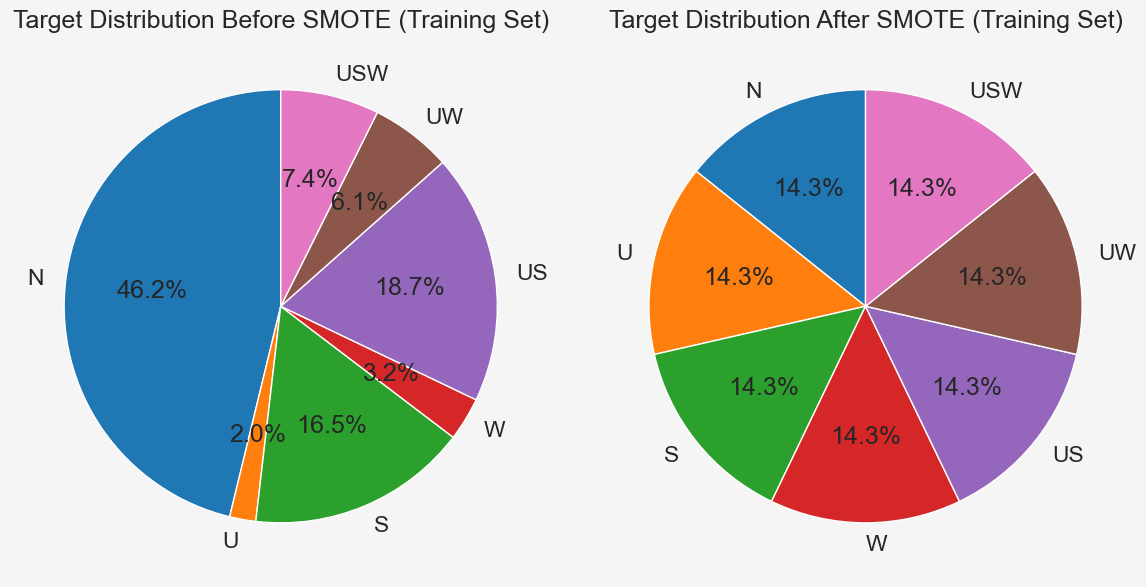

In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming baseline_data_encoded is your DataFrame
X = baseline_data_encoded.drop(columns=['Nutrition_Status'] + baseline_data_encoded.columns[:2].tolist())

# Select the target variable (last column)
Y = baseline_data_encoded.iloc[:, -1].values

# Split the dataset into train and test sets (keeping the stratification)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)

# Label encode the target variable (Y)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)  # Convert labels to numeric values

# Define the desired category order (mapped to numeric labels)
category_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']
category_mapping = {category: idx for idx, category in enumerate(category_order)}

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train_encoded)  # Resample the training set

# Convert back the resampled numeric labels to original categorical labels
Y_train_smote = label_encoder.inverse_transform(Y_train_smote)

# Count the occurrences of each class in the target variable after SMOTE (in training set)
class_counts_after_smote = pd.Series(Y_train_smote).value_counts()[category_order]

# Create a DataFrame to show the results in table format (before and after SMOTE)
distribution_df = pd.DataFrame({
    'Category': category_order,
    'Before SMOTE': pd.Series(Y_train).value_counts()[category_order].values,
    'After SMOTE': class_counts_after_smote.values
})

# Display the DataFrame
print("Target Distribution Before and After SMOTE in Training Set:")
print(distribution_df)

# Plotting the pie chart before and after SMOTE
plt.figure(figsize=(12, 6), facecolor='whitesmoke')  # Set background to whitesmoke
plt.subplot(1, 2, 1)
plt.pie(pd.Series(Y_train).value_counts()[category_order], labels=category_order, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution Before SMOTE (Training Set)')

# Plotting the pie chart after SMOTE
plt.subplot(1, 2, 2)
plt.pie(class_counts_after_smote, labels=category_order, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution After SMOTE (Training Set)')

# Adjust padding between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Display the plots
plt.tight_layout()
plt.show()

# Now you can use X_train_smote and Y_train_smote for training your models

In [23]:
# Ensure X contains only relevant columns
# X = baseline_data_encoded.iloc[:, 2:-1]  # Selecting all columns except the first two and last column (target)
# Drop the first two columns and 'Nutrition_Status' column
X = baseline_data_encoded.drop(columns=['Nutrition_Status'] + baseline_data_encoded.columns[:2].tolist())

# Select the target variable (last column)
Y = baseline_data_encoded.iloc[:, -1].values  

In [24]:
# Get the count of each data type in the dataset
data_types_summary = X.dtypes.value_counts()
print(data_types_summary)

bool       54
float64     7
int64       1
Name: count, dtype: int64


In [25]:
# Get the columns that are of type 'object' (strings or categorical data)
object_columns = X.select_dtypes(include='object').columns
print(object_columns)

Index([], dtype='object')


In [26]:
print(f"X shape: {X.shape}")  # Should be (number_of_rows, number_of_features)
print(f"Y shape: {Y.shape}")  # Should be (number_of_rows,)

X shape: (1994, 62)
Y shape: (1994,)


# 🧪 Dataset Spliting (Train Vs Test) with SMOTE

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
from imblearn.over_sampling import SMOTE
import numpy as np
from scipy.stats import norm
import os

# List of different train-test split ratios to try
split_ratios = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
results = []

# Define the file path for saving results
output_dir = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code"
output_file = os.path.join(output_dir, "model_results_smote.xlsx")  # Output file uses .xlsx format.

# Loop through each split ratio
for ratio in split_ratios:
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y,  
        test_size=1 - ratio,  
        random_state=42,      
        stratify=Y    
    )
    
    # Apply SMOTE to the training data to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Train a RandomForest model on the resampled data
    model = RandomForestClassifier(random_state=42, n_estimators=100)
    model.fit(X_train_smote, y_train_smote)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for AUC
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute 95% CI for Accuracy
    n_test = len(y_test)
    standard_error = np.sqrt((accuracy * (1 - accuracy)) / n_test)
    margin_of_error = 1.96 * standard_error
    ci_lower = max(0, accuracy - margin_of_error)
    ci_upper = min(1, accuracy + margin_of_error)
    accuracy_ci_str = f"{accuracy:.4f} ({ci_lower:.4f}, {ci_upper:.4f})"

    # Compute Sensitivity, Specificity, Precision, and F1-score
    cm = confusion_matrix(y_test, y_pred)  # Full confusion matrix
    sensitivity = recall_score(y_test, y_pred, average='macro')  # Recall = Sensitivity
    specificity_list = []
    
    # Compute Specificity for each class
    for i in range(cm.shape[0]):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity_list.append(specificity)
    
    specificity = np.mean(specificity_list)  # Average specificity across classes
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Compute AUC and its 95% CI
    try:
        auc = roc_auc_score(y_test, y_pred_proba)  # Binary case
    except ValueError:
        auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')  # Multi-class case
    
    auc_se = np.sqrt((auc * (1 - auc)) / n_test)  # Standard error of AUC
    auc_ci_lower = max(0, auc - 1.96 * auc_se)
    auc_ci_upper = min(1, auc + 1.96 * auc_se)
    auc_ci_str = f"{auc:.4f} ({auc_ci_lower:.4f}, {auc_ci_upper:.4f})"

    # Store results
    results.append({
        'Train/Test Split': f"{int(ratio*100)}:{int((1-ratio)*100)}",
        'X_train': X_train_smote.shape,
        'y_train': y_train_smote.shape,
        'X_test': X_test.shape,
        'y_test': y_test.shape,
        'Sensitivity (Recall)': f"{sensitivity:.4f}",
        'Specificity': f"{specificity:.4f}",
        'Precision': f"{precision:.4f}",
        'F1-score': f"{f1:.4f}",
        'AUC (95% CI)': auc_ci_str,
        'Accuracy (95% CI)': accuracy_ci_str
    })

# Save results as an Excel file
results_df.to_excel(output_file, index=False)

print(f"Results saved to: {output_file}")

# Convert results into a DataFrame for display
results_df = pd.DataFrame(results)
results_df

NameError: name 'results_df' is not defined

    Accuracy  Precision  Sensitivity (Recall)  Specificity  F1-score  \
0   0.537594   0.382080              0.355137     0.522851  0.363239   
1   0.520868   0.405508              0.369409     0.546642  0.379908   
2   0.519038   0.378714              0.338835     0.557135  0.347915   
3   0.533835   0.392326              0.356297     0.594254  0.365249   
4   0.543333   0.387950              0.345382     0.589605  0.353047   
5   0.560000   0.421861              0.397924     0.593818  0.406172   
6   0.526316   0.413842              0.295581     0.677753  0.305941   
7   0.514190   0.367495              0.300893     0.653033  0.303753   
8   0.503006   0.353854              0.279431     0.669225  0.284494   
9   0.553885   0.383463              0.316269     0.678988  0.317232   
10  0.543333   0.352592              0.304363     0.644362  0.307450   
11  0.560000   0.426743              0.346338     0.660651  0.355906   
12  0.523810   0.369444              0.347494     0.534623  0.35

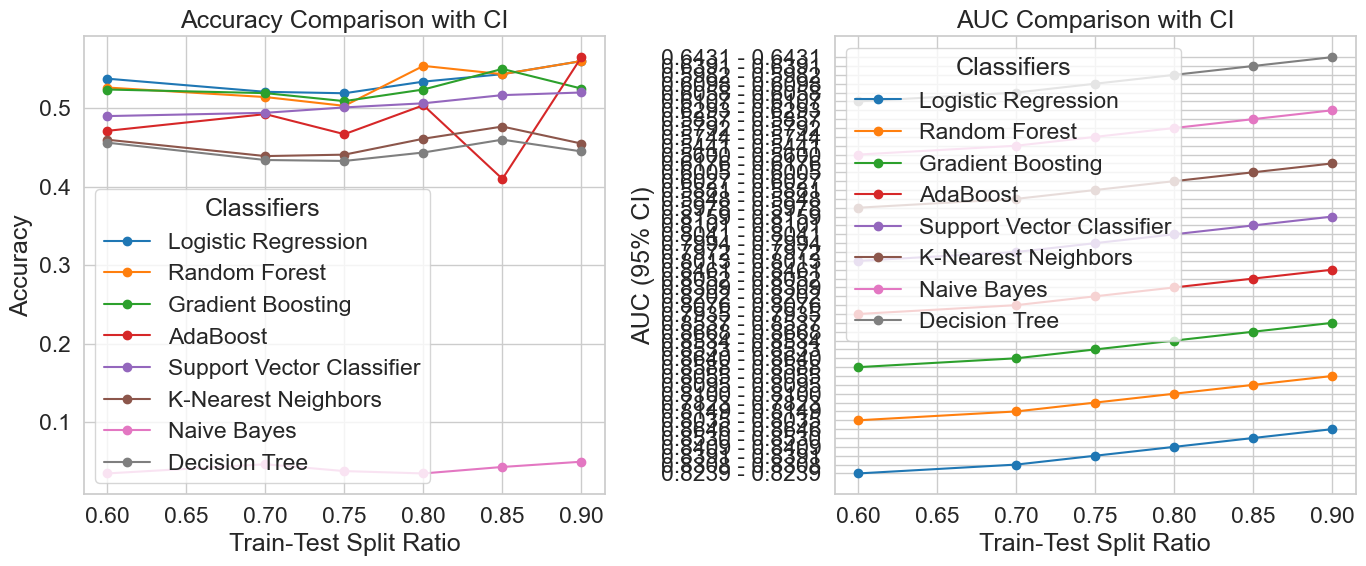

Results saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code\model_comparison_results.xlsx


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import os
import pandas as pd

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=20000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Support Vector Classifier': SVC(random_state=42, probability=True),  # Enable probability for AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Assuming you already have the features X and labels y
# Example data split ratio to test

# List of different train-test split ratios to try
split_ratios = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
results = {name: [] for name in classifiers.keys()}  # Store results for each classifier

# Define the file path for saving results
output_dir = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code"
output_file = os.path.join(output_dir, "model_comparison_results.xlsx")  # Output file uses .xlsx format.

# Bootstrapping function to calculate CI
def bootstrap_ci(scores, ci=0.95):
    bootstrapped_scores = []
    for _ in range(1000):  # 1000 resamples
        sample = resample(scores, n_samples=len(scores))
        bootstrapped_scores.append(np.mean(sample))
    lower = np.percentile(bootstrapped_scores, (1 - ci) / 2 * 100)
    upper = np.percentile(bootstrapped_scores, (1 + ci) / 2 * 100)
    return lower, upper

# Loop through each split ratio and evaluate classifiers
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-ratio, random_state=42)
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train each model and record the accuracy and other metrics
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None  # For AUC, if available
        
        # Compute confusion matrix (for multi-class)
        cm = confusion_matrix(y_test, y_pred)
        
        # Compute metrics for multi-class
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        sensitivity = recall_score(y_test, y_pred, average='macro', zero_division=0)  # Recall for multi-class
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # F1 score for multi-class
        
        # Specificity calculation for multi-class - compute per class
        specificity = []
        for i in range(cm.shape[0]):
            tn = np.sum(np.delete(cm[i, :], i))
            fp = np.sum(cm[:, i]) - cm[i, i]
            specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
        
        # AUC for multi-class (One-vs-Rest approach)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if y_prob is not None else None
        
        # Confidence intervals
        accuracy_ci_lower, accuracy_ci_upper = bootstrap_ci([accuracy] * len(y_test))
        auc_ci_lower, auc_ci_upper = bootstrap_ci([auc] * len(y_test)) if auc is not None else (None, None)

        # Store the metrics
        results[name].append({
            'Accuracy': accuracy,
            'Precision': precision,
            'Sensitivity (Recall)': sensitivity,
            'Specificity': np.mean(specificity),  # Average specificity across all classes
            'F1-score': f1,
            'AUC (95% CI)': f"{auc_ci_lower:.4f} - {auc_ci_upper:.4f}" if auc is not None else "N/A",
            'Accuracy (95% CI)': f"{accuracy_ci_lower:.4f} - {accuracy_ci_upper:.4f}"
        })

# Prepare results for display and visualization
results_df = pd.DataFrame()
for model_name, model_results in results.items():
    for idx, result in enumerate(model_results):
        result['Model'] = model_name
        result['Train-Test Split'] = split_ratios[idx]
    results_df = pd.concat([results_df, pd.DataFrame(model_results)], ignore_index=True)

# Display results in a readable format
print(results_df)

# Visualizing Accuracy (with CI) and AUC (with CI)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy plot
for name, metrics in results.items():
    ax1.plot(split_ratios, [metric['Accuracy'] for metric in metrics], marker='o', label=name)
ax1.set_title('Accuracy Comparison with CI')
ax1.set_xlabel('Train-Test Split Ratio')
ax1.set_ylabel('Accuracy')
ax1.legend(title='Classifiers')
ax1.grid(True)

# AUC plot
for name, metrics in results.items():
    ax2.plot(split_ratios, [metric['AUC (95% CI)'] for metric in metrics], marker='o', label=name)
ax2.set_title('AUC Comparison with CI')
ax2.set_xlabel('Train-Test Split Ratio')
ax2.set_ylabel('AUC (95% CI)')
ax2.legend(title='Classifiers')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Save results as an Excel file
results_df.to_excel(output_file, index=False)

print(f"Results saved to: {output_file}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import os
import pandas as pd

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=20000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Support Vector Classifier': SVC(random_state=42, probability=True),  # Enable probability for AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Assuming you already have the features X and labels y
# Example data split ratio to test

# List of different train-test split ratios to try
split_ratios = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
results = {name: [] for name in classifiers.keys()}  # Store results for each classifier

# Define the file path for saving results
output_dir = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code"
output_file = os.path.join(output_dir, "model_comparison_results.xlsx")  # Output file uses .xlsx format.

# Bootstrapping function to calculate CI
def bootstrap_ci(scores, ci=0.95):
    bootstrapped_scores = []
    for _ in range(1000):  # 1000 resamples
        sample = resample(scores, n_samples=len(scores))
        bootstrapped_scores.append(np.mean(sample))
    lower = np.percentile(bootstrapped_scores, (1 - ci) / 2 * 100)
    upper = np.percentile(bootstrapped_scores, (1 + ci) / 2 * 100)
    return lower, upper

# Loop through each split ratio and evaluate classifiers
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-ratio, random_state=42)
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train each model and record the accuracy and other metrics
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train)
        y_pred = clf.predict(X_test_scaled)
        y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None  # For AUC, if available
        
        # Compute confusion matrix (for multi-class)
        cm = confusion_matrix(y_test, y_pred)
        
        # Compute metrics for multi-class
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        sensitivity = recall_score(y_test, y_pred, average='macro', zero_division=0)  # Recall for multi-class
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # F1 score for multi-class
        
        # Specificity calculation for multi-class - compute per class
        specificity = []
        for i in range(cm.shape[0]):
            tn = np.sum(np.delete(cm[i, :], i))
            fp = np.sum(cm[:, i]) - cm[i, i]
            specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
        
        # AUC for multi-class (One-vs-Rest approach)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if y_prob is not None else None
        
        # Confidence intervals
        accuracy_ci_lower, accuracy_ci_upper = bootstrap_ci([accuracy] * len(y_test))
        auc_ci_lower, auc_ci_upper = bootstrap_ci([auc] * len(y_test)) if auc is not None else (None, None)

        # Store the metrics
        results[name].append({
            'Train/Test Ratio': ratio,
            'Classifier': name,
            'Sensitivity': sensitivity,
            'Specificity': np.mean(specificity),  # Average specificity across all classes
            'Precision': precision,
            'F1': f1,
            'AUC (95% CI)': f"{auc:.4f} ({auc_ci_lower:.4f} - {auc_ci_upper:.4f})" if auc is not None else "N/A",
            'Accuracy (95% CI)': f"{accuracy:.4f} ({accuracy_ci_lower:.4f} - {accuracy_ci_upper:.4f})"
        })

# Prepare results for display and visualization
results_df = pd.DataFrame()
for model_name, model_results in results.items():
    for idx, result in enumerate(model_results):
        result['Model'] = model_name
    results_df = pd.concat([results_df, pd.DataFrame(model_results)], ignore_index=True)

# Reorder columns to match the desired format
results_df = results_df[[
    'Train/Test Ratio', 'Classifier', 'Sensitivity', 'Specificity', 'Precision', 'F1', 'AUC (95% CI)', 'Accuracy (95% CI)'
]]

# Display results in a readable format
print(results_df)

# Visualizing Accuracy with 95% CI plot only
fig, ax = plt.subplots(figsize=(10, 6))

for name, metrics in results.items():
    ax.plot(split_ratios, [metric['Accuracy (95% CI)'] for metric in metrics], marker='o', label=name)

ax.set_title('Accuracy Comparison with 95% CI')
ax.set_xlabel('Train-Test Split Ratio')
ax.set_ylabel('Accuracy (95% CI)')
ax.legend(title='Classifiers')
ax.grid(True)

plt.tight_layout()
plt.show()

# Save results as an Excel file
results_df.to_excel(output_file, index=False)

print(f"Results saved to: {output_file}")


    Train/Test Ratio                 Classifier  Sensitivity  Specificity  \
0               0.60        Logistic Regression     0.350109     0.479802   
1               0.70        Logistic Regression     0.354446     0.479749   
2               0.75        Logistic Regression     0.399238     0.480862   
3               0.80        Logistic Regression     0.397860     0.489637   
4               0.85        Logistic Regression     0.458781     0.498616   
5               0.90        Logistic Regression     0.453731     0.496719   
6               0.60              Random Forest     0.338821     0.553136   
7               0.70              Random Forest     0.348576     0.562792   
8               0.75              Random Forest     0.350754     0.565591   
9               0.80              Random Forest     0.322729     0.554409   
10              0.85              Random Forest     0.346349     0.548334   
11              0.90              Random Forest     0.355411     0.622852   

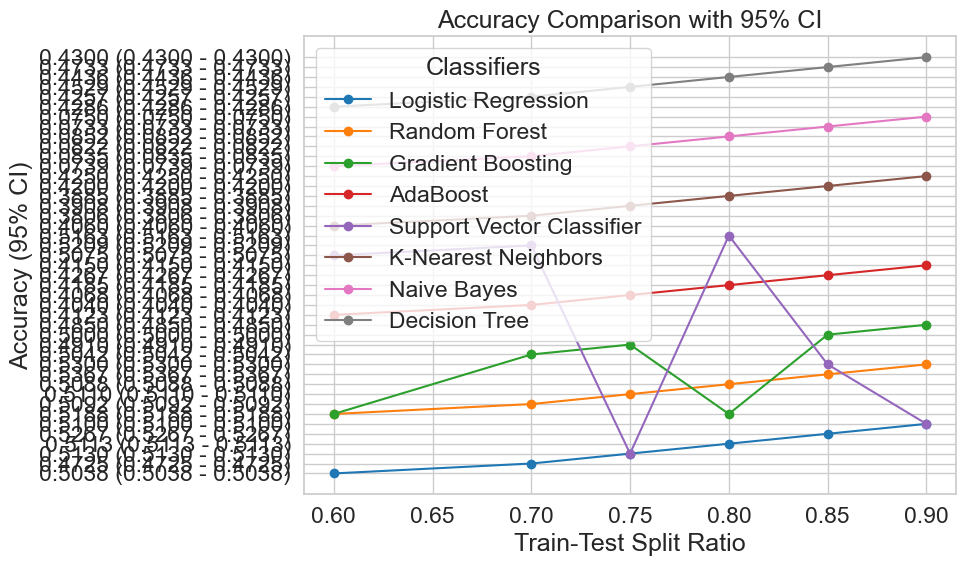

Results saved to: D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code\model_comparison_results.xlsx


In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE  # Import SMOTE
import os
import pandas as pd

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=20000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Support Vector Classifier': SVC(random_state=42, probability=True),  # Enable probability for AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Assuming you already have the features X and labels Y
# Example data split ratio to test

# List of different train-test split ratios to try
split_ratios = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
results = {name: [] for name in classifiers.keys()}  # Store results for each classifier

# Define the file path for saving results
output_dir = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code"
output_file = os.path.join(output_dir, "model_comparison_results.xlsx")  # Output file uses .xlsx format.

# Bootstrapping function to calculate CI
def bootstrap_ci(scores, ci=0.95):
    bootstrapped_scores = []
    for _ in range(1000):  # 1000 resamples
        sample = resample(scores, n_samples=len(scores))
        bootstrapped_scores.append(np.mean(sample))
    lower = np.percentile(bootstrapped_scores, (1 - ci) / 2 * 100)
    upper = np.percentile(bootstrapped_scores, (1 + ci) / 2 * 100)
    return lower, upper

# Loop through each split ratio and evaluate classifiers
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-ratio, random_state=42)
    
    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # Resample the training set
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)  # Use SMOTE'd data for scaling
    X_test_scaled = scaler.transform(X_test)  # Use original test data for scaling
    
    # Train each model and record the accuracy and other metrics
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train_smote)
        y_pred = clf.predict(X_test_scaled)
        y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None  # For AUC, if available
        
        # Compute confusion matrix (for multi-class)
        cm = confusion_matrix(y_test, y_pred)
        
        # Compute metrics for multi-class
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        sensitivity = recall_score(y_test, y_pred, average='macro', zero_division=0)  # Recall for multi-class
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # F1 score for multi-class
        
        # Specificity calculation for multi-class - compute per class
        specificity = []
        for i in range(cm.shape[0]):
            tn = np.sum(np.delete(cm[i, :], i))
            fp = np.sum(cm[:, i]) - cm[i, i]
            specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
        
        # AUC for multi-class (One-vs-Rest approach)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if y_prob is not None else None
        
        # Confidence intervals
        accuracy_ci_lower, accuracy_ci_upper = bootstrap_ci([accuracy] * len(y_test))
        auc_ci_lower, auc_ci_upper = bootstrap_ci([auc] * len(y_test)) if auc is not None else (None, None)

        # Store the metrics
        results[name].append({
            'Train/Test Ratio': ratio,
            'Classifier': name,
            'Sensitivity': sensitivity,
            'Specificity': np.mean(specificity),  # Average specificity across all classes
            'Precision': precision,
            'F1': f1,
            'AUC (95% CI)': f"{auc:.4f} ({auc_ci_lower:.4f} - {auc_ci_upper:.4f})" if auc is not None else "N/A",
            'Accuracy (95% CI)': f"{accuracy:.4f} ({accuracy_ci_lower:.4f} - {accuracy_ci_upper:.4f})"
        })

# Prepare results for display and visualization
results_df = pd.DataFrame()
for model_name, model_results in results.items():
    for idx, result in enumerate(model_results):
        result['Model'] = model_name
    results_df = pd.concat([results_df, pd.DataFrame(model_results)], ignore_index=True)

# Reorder columns to match the desired format
results_df = results_df[[
    'Train/Test Ratio', 'Classifier', 'Sensitivity', 'Specificity', 'Precision', 'F1', 'AUC (95% CI)', 'Accuracy (95% CI)'
]]

# Display results in a readable format
print(results_df)

# Visualizing Accuracy with 95% CI plot only
fig, ax = plt.subplots(figsize=(10, 6))

for name, metrics in results.items():
    ax.plot(split_ratios, [metric['Accuracy (95% CI)'] for metric in metrics], marker='o', label=name)

ax.set_title('Accuracy Comparison with 95% CI')
ax.set_xlabel('Train-Test Split Ratio')
ax.set_ylabel('Accuracy (95% CI)')
ax.legend(title='Classifiers')
ax.grid(True)

plt.tight_layout()
plt.show()

# Save results as an Excel file
results_df.to_excel(output_file, index=False)

print(f"Results saved to: {output_file}")


## Using SMOTE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE  # Import SMOTE
import os
import pandas as pd

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=20000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME', random_state=42),
    'Support Vector Classifier': SVC(random_state=42, probability=True),  # Enable probability for AUC
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Assuming you already have the features X and labels Y
# Example data split ratio to test

# List of different train-test split ratios to try
split_ratios = [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
results = {name: [] for name in classifiers.keys()}  # Store results for each classifier

# Define the file path for saving results
output_dir = r"D:\Ph.D Course Material 2022\My Dessertation\0 My PhD Munuscript Drafts\5 Machine Learning\Python code\My code"
output_file = os.path.join(output_dir, "model_comparison_results.xlsx")  # Output file uses .xlsx format.

# Bootstrapping function to calculate CI
def bootstrap_ci(scores, ci=0.95):
    bootstrapped_scores = []
    for _ in range(1000):  # 1000 resamples
        sample = resample(scores, n_samples=len(scores))
        bootstrapped_scores.append(np.mean(sample))
    lower = np.percentile(bootstrapped_scores, (1 - ci) / 2 * 100)
    upper = np.percentile(bootstrapped_scores, (1 + ci) / 2 * 100)
    return lower, upper

# Loop through each split ratio and evaluate classifiers
for ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1-ratio, random_state=42)
    
    # Apply SMOTE to the training data only
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)  # Resample the training set
    
    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_smote)  # Use SMOTE'd data for scaling
    X_test_scaled = scaler.transform(X_test)  # Use original test data for scaling
    
    # Train each model and record the accuracy and other metrics
    for name, clf in classifiers.items():
        clf.fit(X_train_scaled, y_train_smote)
        y_pred = clf.predict(X_test_scaled)
        y_prob = clf.predict_proba(X_test_scaled)[:, 1] if hasattr(clf, "predict_proba") else None  # For AUC, if available
        
        # Compute confusion matrix (for multi-class)
        cm = confusion_matrix(y_test, y_pred)
        
        # Compute metrics for multi-class
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        sensitivity = recall_score(y_test, y_pred, average='macro', zero_division=0)  # Recall for multi-class
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)  # F1 score for multi-class
        
        # Specificity calculation for multi-class - compute per class
        specificity = []
        for i in range(cm.shape[0]):
            tn = np.sum(np.delete(cm[i, :], i))
            fp = np.sum(cm[:, i]) - cm[i, i]
            specificity.append(tn / (tn + fp) if (tn + fp) > 0 else 0)
        
        # AUC for multi-class (One-vs-Rest approach)
        auc = roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average='macro') if y_prob is not None else None
        
        # Confidence intervals
        accuracy_ci_lower, accuracy_ci_upper = bootstrap_ci([accuracy] * len(y_test))
        auc_ci_lower, auc_ci_upper = bootstrap_ci([auc] * len(y_test)) if auc is not None else (None, None)

        # Store the metrics
        results[name].append({
            'Train/Test Ratio': ratio,
            'Classifier': name,
            'Sensitivity': sensitivity,
            'Specificity': np.mean(specificity),  # Average specificity across all classes
            'Precision': precision,
            'F1': f1,
            'AUC (95% CI)': f"{auc:.4f} ({auc_ci_lower:.4f} - {auc_ci_upper:.4f})" if auc is not None else "N/A",
            'Accuracy (95% CI)': f"{accuracy:.4f} ({accuracy_ci_lower:.4f} - {accuracy_ci_upper:.4f})"
        })

# Prepare results for display and visualization
results_df = pd.DataFrame()
for model_name, model_results in results.items():
    for idx, result in enumerate(model_results):
        result['Model'] = model_name
    results_df = pd.concat([results_df, pd.DataFrame(model_results)], ignore_index=True)

# Reorder columns to match the desired format
results_df = results_df[[
    'Train/Test Ratio', 'Classifier', 'Sensitivity', 'Specificity', 'Precision', 'F1', 'AUC (95% CI)', 'Accuracy (95% CI)'
]]

# Display results in a readable format
print(results_df)

# Visualizing Accuracy with 95% CI plot only
fig, ax = plt.subplots(figsize=(10, 6))

for name, metrics in results.items():
    ax.plot(split_ratios, [metric['Accuracy (95% CI)'] for metric in metrics], marker='o', label=name)

ax.set_title('Accuracy Comparison with 95% CI')
ax.set_xlabel('Train-Test Split Ratio')
ax.set_ylabel('Accuracy (95% CI)')
ax.legend(title='Classifiers')
ax.grid(True)

plt.tight_layout()
plt.show()

# Save results as an Excel file
results_df.to_excel(output_file, index=False)

print(f"Results saved to: {output_file}")

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Train the Random Forest classifier on SMOTE data
rf_clf = classifiers['Random Forest']
rf_clf.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf_clf.predict(X_test_scaled)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='g', cmap='Blues', xticklabels=category_order, yticklabels=category_order)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Convert the confusion matrix to a pandas DataFrame for better table formatting
cm_rf_df = pd.DataFrame(cm_rf, index=category_order, columns=category_order)

# Add row totals and column totals to the confusion matrix table
cm_rf_df['Row Total'] = cm_rf_df.sum(axis=1)  # Sum along the rows
cm_rf_df.loc['Column Total'] = cm_rf_df.sum(axis=0)  # Sum along the columns

# Display the confusion matrix with totals
print("Confusion Matrix for Random Forest Classifier with Row and Column Totals:")
print(cm_rf_df)


NameError: name 'classifiers' is not defined

In [29]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming 'ch_sex_Male' is the feature representing gender in your dataset
unique_sexes = np.unique(X_test['ch_sex_Male'])

# Train the Random Forest classifier on SMOTE data
rf_clf = classifiers['Random Forest']
rf_clf.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf_clf.predict(X_test_scaled)

# Separate the test data based on gender
X_test_male = X_test[X_test['ch_sex_Male'] == 1]
y_test_male = y_test[X_test['ch_sex_Male'] == 1]
X_test_female = X_test[X_test['ch_sex_Male'] == 0]
y_test_female = y_test[X_test['ch_sex_Male'] == 0]

# Predict for male and female subsets
y_pred_rf_male = rf_clf.predict(X_test_male)
y_pred_rf_female = rf_clf.predict(X_test_female)

# Compute confusion matrices for male and female subsets
cm_rf_male = confusion_matrix(y_test_male, y_pred_rf_male)
cm_rf_female = confusion_matrix(y_test_female, y_pred_rf_female)

# Display confusion matrices for each gender
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Male confusion matrix
sns.heatmap(cm_rf_male, annot=True, fmt='g', cmap='Blues', xticklabels=category_order, yticklabels=category_order, ax=axes[0])
axes[0].set_title('Confusion Matrix - Male')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Female confusion matrix
sns.heatmap(cm_rf_female, annot=True, fmt='g', cmap='Blues', xticklabels=category_order, yticklabels=category_order, ax=axes[1])
axes[1].set_title('Confusion Matrix - Female')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Convert confusion matrices to pandas DataFrames for better table formatting
cm_rf_df_male = pd.DataFrame(cm_rf_male, index=category_order, columns=category_order)
cm_rf_df_female = pd.DataFrame(cm_rf_female, index=category_order, columns=category_order)

# Add row totals and column totals for male and female matrices
cm_rf_df_male['Row Total'] = cm_rf_df_male.sum(axis=1)
cm_rf_df_male.loc['Column Total'] = cm_rf_df_male.sum(axis=0)

cm_rf_df_female['Row Total'] = cm_rf_df_female.sum(axis=1)
cm_rf_df_female.loc['Column Total'] = cm_rf_df_female.sum(axis=0)

# Display the confusion matrix with totals for both genders
print("Confusion Matrix for Random Forest Classifier (Male):")
print(cm_rf_df_male)

print("\nConfusion Matrix for Random Forest Classifier (Female):")
print(cm_rf_df_female)


NameError: name 'classifiers' is not defined

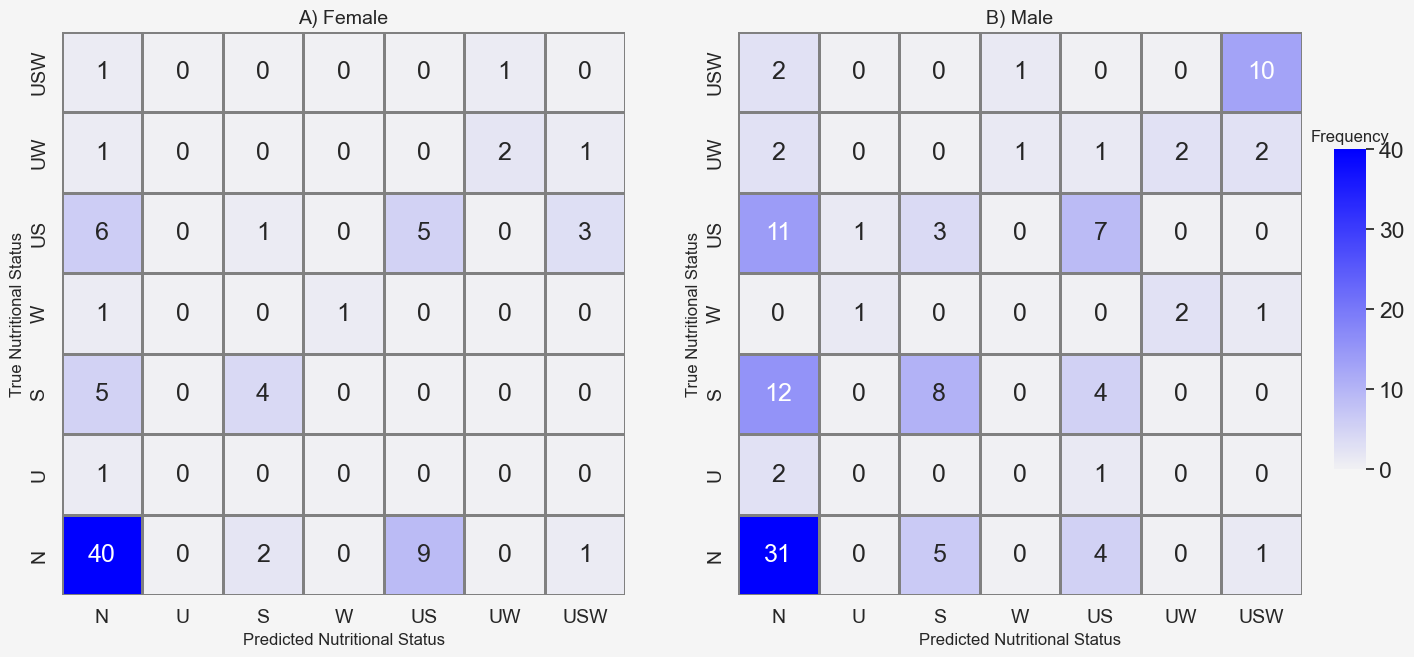

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the custom order of states
state_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Get unique categories in 'ch_sex'
unique_sexes = np.unique(X_test['ch_sex_Male'])

# Create a figure with subplots (1 row, 2 columns, equal width ratio)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})  

# Set the background color for the entire figure
plt.gcf().set_facecolor('whitesmoke')

# Add a single color bar axis (position and size adjustments)
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjust position & size as needed
cbar_ax.set_title("Frequency", fontsize=12)  # Set title for color bar

# Define a custom colormap
custom_cmap = sns.light_palette("blue", as_cmap=True)
custom_cmap.set_bad("whitesmoke")  # Set whitesmoke for low values

# Loop through each unique value in ch_sex and compute confusion matrix
for idx, sex in enumerate(unique_sexes):
    indices = X_test['ch_sex_Male'] == sex  # Create boolean mask based on gender
    y_test_sex = y_test[indices]  # Get the y_test values for the gender
    y_pred_sex = y_pred[indices]  # Get the y_pred values for the gender

    # Compute confusion matrix
    cm = confusion_matrix(y_test_sex, y_pred_sex, labels=state_order)
    cm_df = pd.DataFrame(cm, index=state_order, columns=state_order)

    # Plot confusion matrix
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=custom_cmap, 
                cbar=(idx == 0),  # Show cbar only on the first plot
                cbar_ax=(cbar_ax if idx == 0 else None),  # Attach cbar only once
                xticklabels=state_order, yticklabels=state_order, 
                annot_kws={"size": 18},  # Set annotation text size
                cbar_kws={'shrink': 0.8},  # Shrink color bar
                square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[idx])

    # Customizing each subplot
    axes[idx].set_xlabel('Predicted Nutritional Status', fontsize=12)
    axes[idx].set_ylabel('True Nutritional Status', fontsize=12)
    
    # Titles for each subplot
    if sex == 1:
        axes[idx].set_title("B) Male", fontsize=14)  # Title for Male on the left
    else:
        axes[idx].set_title("A) Female", fontsize=14)  # Title for Female on the right
    
    # Customize tick labels
    axes[idx].tick_params(axis='both', labelsize=14)

    # Invert Y-axis to start from 'N' at the bottom
    axes[idx].invert_yaxis()

# Adjust layout using subplots_adjust to leave space for the color bar
plt.subplots_adjust(right=0.9)  # Adjust the layout to make room for color bar
plt.show()


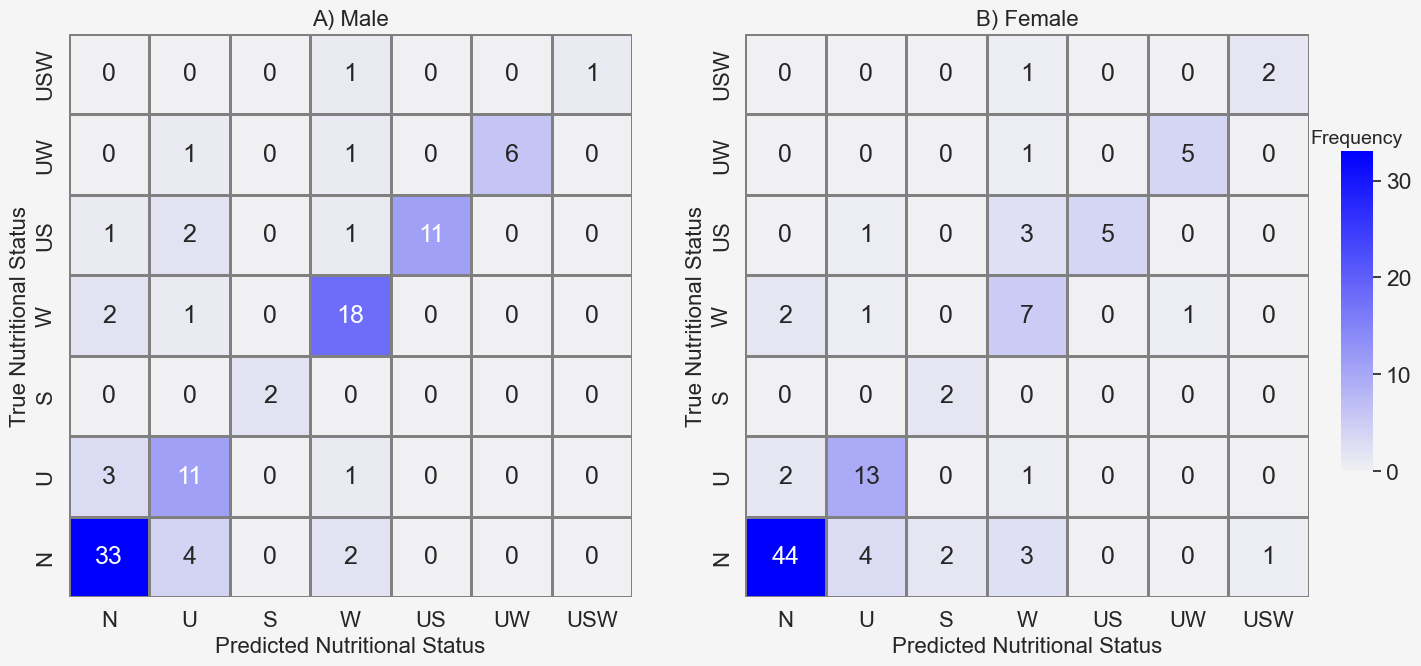

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nutritional status categories
categories = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Placeholder confusion matrix for demonstration (replace these with your actual values)
conf_matrix_female = np.array([
    [44, 4, 2, 3, 0, 0, 1],  # N
    [2, 13, 0, 1, 0, 0, 0],   # U
    [0, 0, 2, 0, 0, 0, 0],    # S
    [2, 1, 0, 7, 0, 1, 0],    # W
    [0, 1, 0, 3, 5, 0, 0],    # US
    [0, 0, 0, 1, 0, 5, 0],    # UW
    [0, 0, 0, 1, 0, 0, 2]     # USW
])

# Confusion matrix for male
conf_matrix_male = np.array([
    [33, 4, 0, 2, 0, 0, 0],  # N
    [3, 11, 0, 1, 0, 0, 0],  # U
    [0, 0, 2, 0, 0, 0, 0],   # S
    [2, 1, 0, 18, 0, 0, 0],  # W
    [1, 2, 0, 1, 11, 0, 0],  # US
    [0, 1, 0, 1, 0, 6, 0],   # UW
    [0, 0, 0, 1, 0, 0, 1]    # USW
])

# Transpose the matrices diagonally by reversing rows
transposed_female_matrix = conf_matrix_female[::-1, :]
transposed_male_matrix = conf_matrix_male[::-1, :]

# Plotting the confusion matrices with equal plot sizes
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})  # Equal width ratio
plt.gcf().set_facecolor('whitesmoke')  # Set the background color to light gray

# Define a custom colormap
custom_cmap = sns.light_palette("blue", as_cmap=True)
custom_cmap.set_bad("whitesmoke")  # Set whitesmoke for low values

# Add a single color bar axis
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjust position & size as needed
cbar_ax.set_title("Frequency", fontsize=14)  # Set title for color bar

# Plot Male Confusion Matrix (Left) with colorbar
sns.heatmap(transposed_male_matrix, annot=True, fmt="d", cmap=custom_cmap, cbar=True,
            xticklabels=categories, yticklabels=categories[::-1], annot_kws={"size": 18}, 
            cbar_ax=cbar_ax, square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[0])  # Colorbar enabled
axes[0].set_xlabel('Predicted Nutritional Status', fontsize=16)
axes[0].set_ylabel('True Nutritional Status', fontsize=16)
axes[0].set_title("A) Male", fontsize=16)  # Male is on the left
axes[0].tick_params(axis='both', labelsize=16)

# Plot Female Confusion Matrix (Right) with no colorbar
sns.heatmap(transposed_female_matrix, annot=True, fmt="d", cmap=custom_cmap, cbar=False,
            xticklabels=categories, yticklabels=categories[::-1], annot_kws={"size": 18}, 
            square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[1])  # No colorbar
axes[1].set_xlabel('Predicted Nutritional Status', fontsize=16)
axes[1].set_ylabel('True Nutritional Status', fontsize=16)
axes[1].set_title("B) Female", fontsize=16)  # Female is on the right
axes[1].tick_params(axis='both', labelsize=16)

# Adjust layout for better spacing
# plt.tight_layout()
# Adjust layout using subplots_adjust to leave space for the color bar
plt.subplots_adjust(right=0.9)  # Adjust the layout to make room for color bar
plt.show()


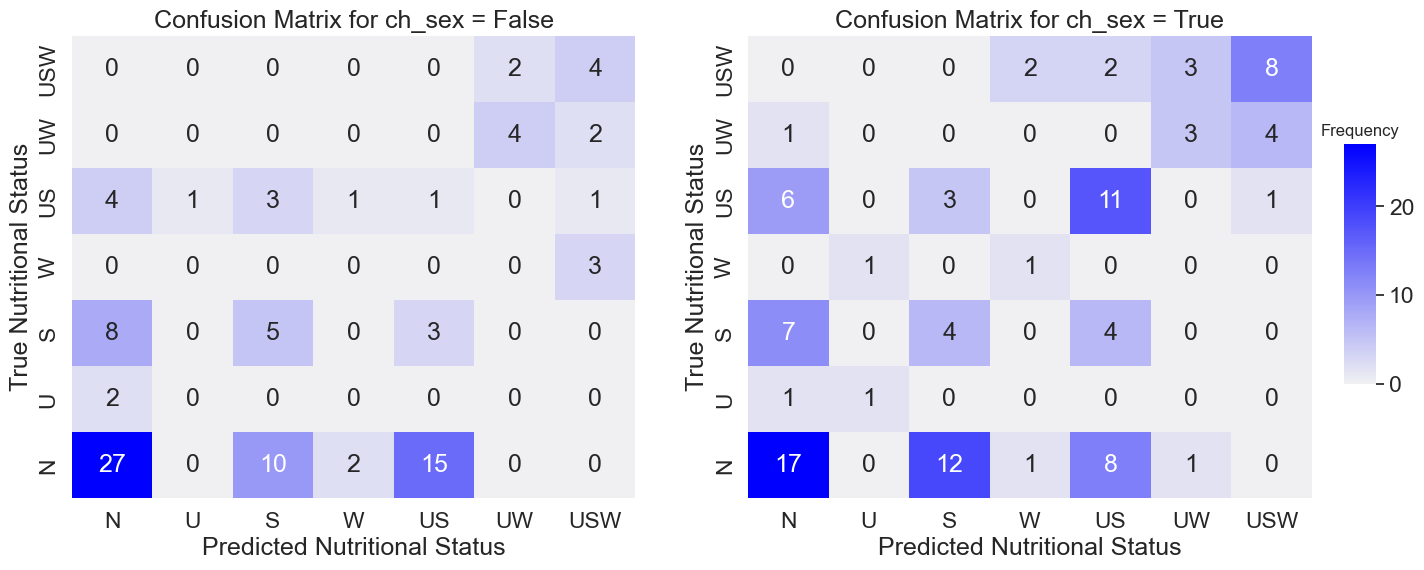

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the custom order of states
state_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Get unique categories in 'ch_sex'
unique_sexes = np.unique(X_test['ch_sex_Male'])

# Create a figure with subplots (1 row, len(unique_sexes) columns)
fig, axes = plt.subplots(1, len(unique_sexes), figsize=(16, 6))  

# Add a single color bar axis
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjust position & size as needed
cbar_ax.set_title("Frequency", fontsize=12)  # Set title for color bar

# Define a custom colormap
custom_cmap = sns.light_palette("blue", as_cmap=True)
custom_cmap.set_bad("whitesmoke")  # Set whitesmoke for low values

# Loop through each unique value in ch_sex and compute confusion matrix
for idx, sex in enumerate(unique_sexes):
    indices = X_test['ch_sex_Male'] == sex
    y_test_sex = y_test[indices]
    y_pred_sex = y_pred[indices]

    # Compute confusion matrix
    cm = confusion_matrix(y_test_sex, y_pred_sex, labels=state_order)
    cm_df = pd.DataFrame(cm, index=state_order, columns=state_order)

    # Plot confusion matrix
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=custom_cmap, 
                cbar=(idx == 0),  # Show cbar only on the first plot
                cbar_ax=(cbar_ax if idx == 0 else None),  # Attach cbar only once
                xticklabels=state_order, yticklabels=state_order, ax=axes[idx])

    axes[idx].set_xlabel('Predicted Nutritional Status')
    axes[idx].set_ylabel('True Nutritional Status')
    axes[idx].set_title(f'Confusion Matrix for ch_sex = {sex}')
    
    # Invert Y-axis to start from 'N' at the bottom
    axes[idx].invert_yaxis()

# Adjust layout using subplots_adjust to leave space for the color bar
plt.subplots_adjust(right=0.9)  # Adjust the layout to make room for color bar
plt.show()


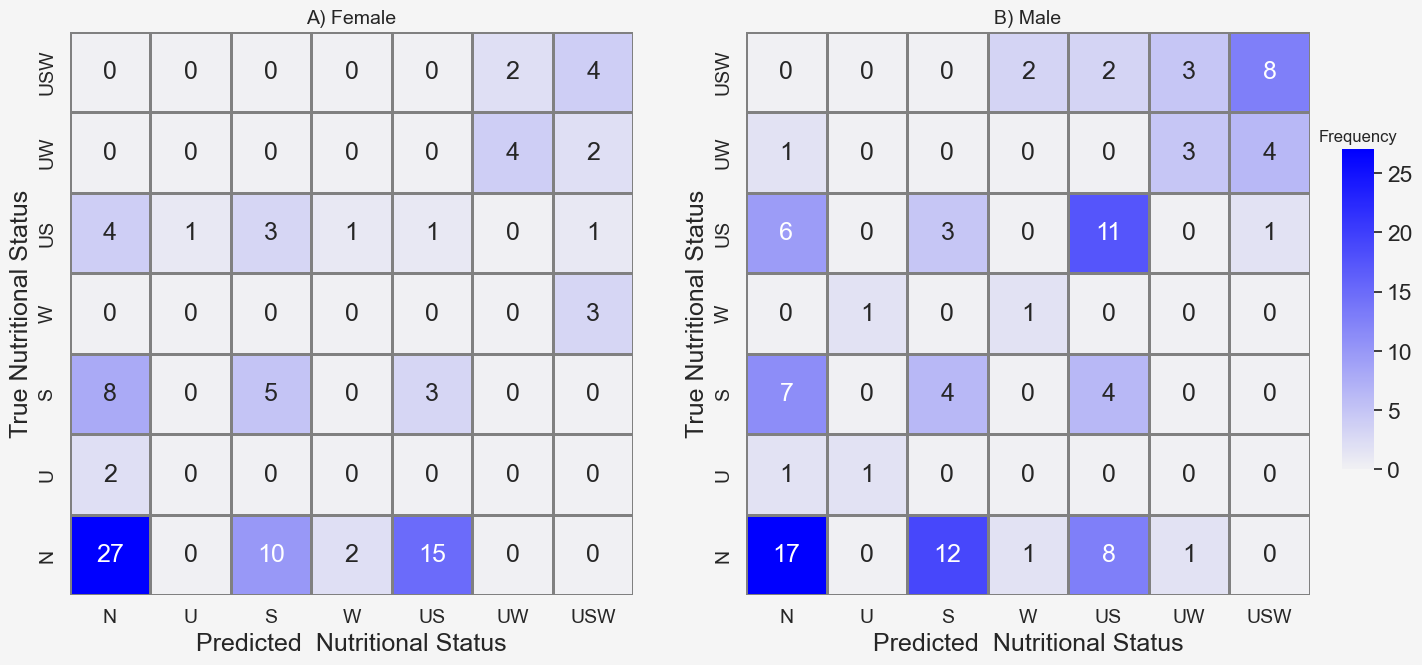

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd

# Define the custom order of states
state_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Get unique categories in 'ch_sex'
unique_sexes = np.unique(X_test['ch_sex_Male'])

# Create a figure with subplots (1 row, 2 columns, equal width ratio)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})  

# Set the background color for the entire figure
plt.gcf().set_facecolor('whitesmoke')

# Add a single color bar axis
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # Adjust position & size as needed
cbar_ax.set_title("Frequency", fontsize=12)  # Set title for color bar

# Define a custom colormap
custom_cmap = sns.light_palette("blue", as_cmap=True)
custom_cmap.set_bad("whitesmoke")  # Set whitesmoke for low values

# Loop through each unique value in ch_sex and compute confusion matrix
for idx, sex in enumerate(unique_sexes):
    indices = X_test['ch_sex_Male'] == sex
    y_test_sex = y_test[indices]
    y_pred_sex = y_pred[indices]

    # Compute confusion matrix
    cm = confusion_matrix(y_test_sex, y_pred_sex, labels=state_order)
    cm_df = pd.DataFrame(cm, index=state_order, columns=state_order)

    # Plot confusion matrix
    sns.heatmap(cm_df, annot=True, fmt='d', cmap=custom_cmap, 
                cbar=(idx == 0),  # Show cbar only on the first plot
                cbar_ax=(cbar_ax if idx == 0 else None),  # Attach cbar only once
                xticklabels=state_order, yticklabels=state_order, 
                annot_kws={"size": 18},  # Set annotation text size
                cbar_kws={'shrink': 0.8},  # Shrink color bar
                square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[idx])

    # Customizing each subplot
    axes[idx].set_xlabel('Predicted  Nutritional Status')
    axes[idx].set_ylabel('True Nutritional Status')
    
    # Titles for each subplot
    if sex == 1:
        axes[idx].set_title("B) Male", fontsize=14)  # Title for Male on the left
    else:
        axes[idx].set_title("A) Female", fontsize=14)  # Title for Female on the right
    
    # Customize tick labels
    axes[idx].tick_params(axis='both', labelsize=14)

    # Invert Y-axis to start from 'N' at the bottom
    axes[idx].invert_yaxis()

# Adjust layout using subplots_adjust to leave space for the color bar
plt.subplots_adjust(right=0.9)  # Adjust the layout to make room for color bar
plt.show()

In [72]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

# Define the custom order of states
state_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Get unique categories in 'ch_sex'
unique_sexes = np.unique(X_test['ch_sex_Male'])

# Initialize an empty confusion matrix
combined_cm = np.zeros((len(state_order), len(state_order)))

# Loop through each unique value in ch_sex and compute confusion matrix
for sex in unique_sexes:
    indices = X_test['ch_sex_Male'] == sex
    y_test_sex = y_test[indices]
    y_pred_sex = y_pred[indices]

    # Compute confusion matrix
    cm = confusion_matrix(y_test_sex, y_pred_sex, labels=state_order)
    
    # Add the confusion matrix for the current sex to the combined confusion matrix
    combined_cm += cm

# Convert the combined confusion matrix into a DataFrame with integer values
combined_cm_df = pd.DataFrame(combined_cm, index=state_order, columns=state_order).astype(int)

# Add the row and column totals
combined_cm_df['Total'] = combined_cm_df.sum(axis=1)  # Row totals
combined_cm_df.loc['Total'] = combined_cm_df.sum(axis=0)  # Column totals

# Display the combined confusion matrix with totals
print("Combined Confusion Matrix with Row and Column Totals:")
print(combined_cm_df)

Combined Confusion Matrix with Row and Column Totals:
        N  U   S  W  US  UW  USW  Total
N      44  0  22  3  23   1    0     93
U       3  1   0  0   0   0    0      4
S      15  0   9  0   7   0    0     31
W       0  1   0  1   0   0    3      5
US     10  1   6  1  12   0    2     32
UW      1  0   0  0   0   7    6     14
USW     0  0   0  2   2   5   12     21
Total  73  3  37  7  44  13   23    200


In [66]:
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

Training Set Size: 1794 samples
Testing Set Size: 200 samples


C:\Users\getne\AppData\Local\Temp\ipykernel_2576\3320202991.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(classifiers, rotation=45, ha="right")  # Rotate labels for better readability


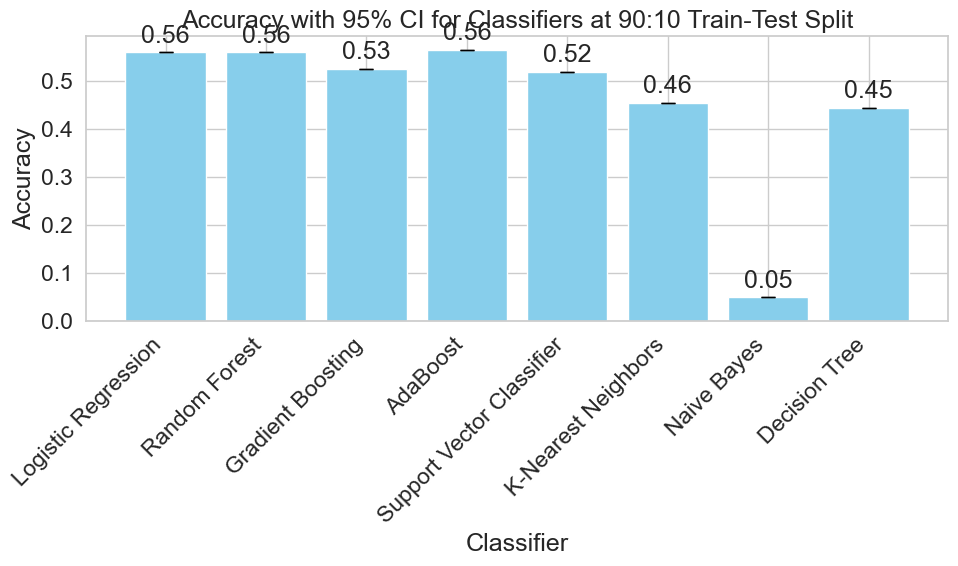

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the results for 90:10 split ratio
split_90_results = results_df[results_df['Train/Test Ratio'] == 0.9]

# Step 1: Extract the accuracy and 95% CI
classifiers = split_90_results['Classifier']
accuracies = split_90_results['Accuracy (95% CI)'].apply(lambda x: float(x.split()[0]))  # Extract accuracy values
ci_lower = split_90_results['Accuracy (95% CI)'].apply(lambda x: float(x.split('(')[-1].split(' - ')[0]))  # Lower bound
ci_upper = split_90_results['Accuracy (95% CI)'].apply(lambda x: float(x.split(' - ')[-1].split(')')[0]))  # Upper bound

# Step 2: Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Step 3: Plot the bars with error bars representing the CI
bars = ax.bar(classifiers, accuracies, yerr=[accuracies - ci_lower, ci_upper - accuracies], capsize=5, color='skyblue')

# Customize the plot
ax.set_title('Accuracy with 95% CI for Classifiers at 90:10 Train-Test Split')
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy')
ax.grid(True)
ax.set_xticklabels(classifiers, rotation=45, ha="right")  # Rotate labels for better readability

# Add value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# SMOTE with 80:20

Target Distribution Before and After SMOTE in Training Set:
  Category  Before SMOTE  After SMOTE
0        N           829          829
1        U            35          829
2        S           296          829
3        W            58          829
4       US           335          829
5       UW           109          829
6      USW           132          829


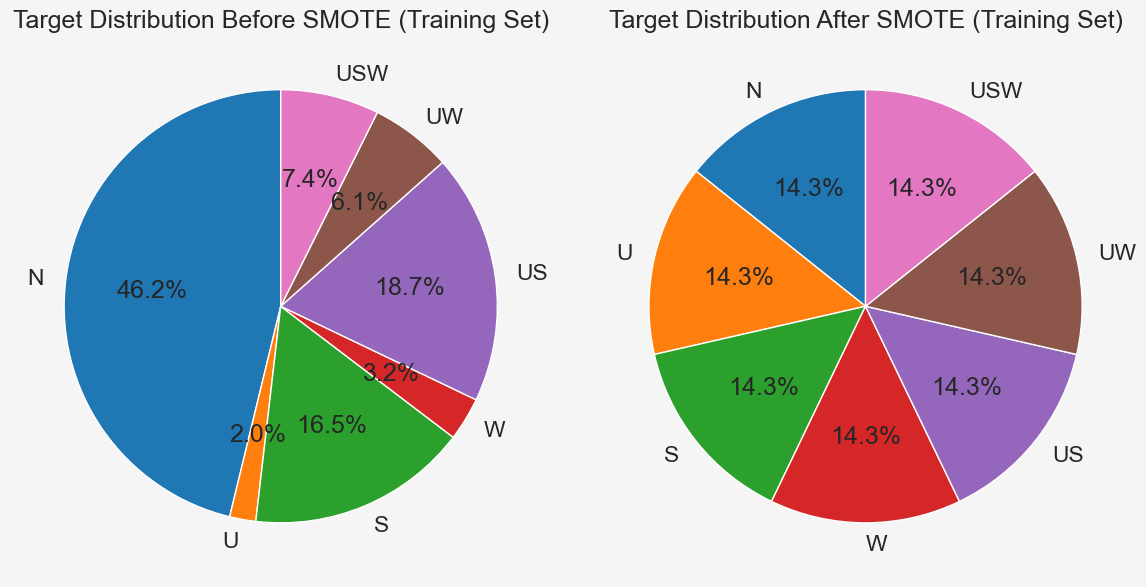

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Assuming 'X' is the feature matrix and 'Y' is the target variable

# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)

# Label encode the target variable (Y)
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)  # Convert labels to numeric values

# Define the desired category order (mapped to numeric labels)
category_order = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']
category_mapping = {category: idx for idx, category in enumerate(category_order)}

# Count the occurrences of each class in the target variable before SMOTE (in training set)
class_counts_before = pd.Series(Y_train).value_counts()[category_order]

# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train_encoded)  # Resample the training set

# Convert back the resampled numeric labels to original categorical labels
Y_train_smote = label_encoder.inverse_transform(Y_train_smote)

# Count the occurrences of each class in the target variable after SMOTE (in training set)
class_counts_after = pd.Series(Y_train_smote).value_counts()[category_order]

# Create a DataFrame to show the results in table format
distribution_df = pd.DataFrame({
    'Category': category_order,
    'Before SMOTE': class_counts_before.values,
    'After SMOTE': class_counts_after.values
})

# Display the DataFrame
print("Target Distribution Before and After SMOTE in Training Set:")
print(distribution_df)

# Plotting the pie chart before SMOTE
plt.figure(figsize=(12, 6), facecolor='whitesmoke')  # Set background to whitesmoke
plt.subplot(1, 2, 1)
plt.pie(class_counts_before, labels=category_order, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution Before SMOTE (Training Set)')

# Plotting the pie chart after SMOTE
plt.subplot(1, 2, 2)
plt.pie(class_counts_after, labels=category_order, autopct='%1.1f%%', startangle=90)
plt.title('Target Distribution After SMOTE (Training Set)')

# Adjust padding between subplots
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Display the plots
plt.tight_layout()
plt.show()


## Grid Search

In [297]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline

# # Define feature matrix (X) and target variable (Y)
# X = baseline_data_encoded.iloc[:, 2:-1]  # Selecting relevant columns
# Y = baseline_data_encoded.iloc[:, -1]    # Target variable

# # Train-Test split ratios to test
# split_ratios = [0.75, 0.8, 0.85, 0.9]  # Focus on higher training sizes for better accuracy
# best_result = None  # Track best accuracy
# best_model = None

# for ratio in split_ratios:
#     # Split data while keeping class balance
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, Y,
#         test_size=1 - ratio,
#         random_state=42,
#         stratify=Y
#     )

#     # Preprocessing: Scale numerical features, encode categorical features
#     preprocessor = ColumnTransformer(
#         transformers=[
#             ('num', StandardScaler(), X.select_dtypes(include=['number']).columns),
#             ('cat', OneHotEncoder(handle_unknown='ignore'), X.select_dtypes(include=['object']).columns)
#         ]
#     )

#     # Define model with hyperparameter tuning
#     model = Pipeline([
#         ('preprocessor', preprocessor),
#         ('classifier', RandomForestClassifier(random_state=42))
#     ])

#     # Grid Search to find optimal hyperparameters
#     param_grid = {
#         'classifier__n_estimators': [100, 200, 300],
#         'classifier__max_depth': [10, 20, 30, None],
#         'classifier__min_samples_split': [2, 5, 10],
#         'classifier__min_samples_leaf': [1, 2, 4]
#     }

#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
#     grid_search.fit(X_train, y_train)

#     # Best model
#     best_pipeline = grid_search.best_estimator_

#     # Make predictions
#     y_pred = best_pipeline.predict(X_test)

#     # Evaluate model
#     accuracy = accuracy_score(y_test, y_pred)

#     print(f"Split {int(ratio*100)}:{int((1-ratio)*100)} - Accuracy: {accuracy:.4f}")

#     # Store best result
#     if best_result is None or accuracy > best_result['Accuracy']:
#         best_result = {
#             'Train/Test Split': f"{int(ratio*100)}:{int((1-ratio)*100)}",
#             'Accuracy': accuracy,
#             'Best Params': grid_search.best_params_
#         }
#         best_model = best_pipeline

# # Display the best configuration
# print("\nBest Model Configuration:")
# print(best_result)

Split 75:25 - Accuracy: 0.5311
Split 80:19 - Accuracy: 0.5113
Split 85:15 - Accuracy: 0.5367
Split 90:9 - Accuracy: 0.5400

Best Model Configuration:
{'Train/Test Split': '90:9', 'Accuracy': 0.54, 'Best Params': {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}}


In [301]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Ensure baseline_data_encoded is defined
# Feature matrix & target variable
X = baseline_data_encoded.iloc[:, 2:-1]
Y = baseline_data_encoded.iloc[:, -1]

# Encode target variable (convert categories to numerical labels)
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, Y_encoded, test_size=0.1, random_state=42, stratify=Y_encoded)

# Handle Class Imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature Selection
feature_selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = feature_selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = feature_selector.transform(X_test)

# Convert to DataFrame with selected feature names
selected_features = X.columns[feature_selector.get_support()]
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

# Define Preprocessor (Adjust according to your dataset)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), selected_features)
])

# XGBoost Model
xgb_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.05, random_state=42))
])

# Train Model
xgb_model.fit(X_train_selected, y_train_resampled)

# Predict & Evaluate
y_pred = xgb_model.predict(X_test_selected)

# Convert predictions back to original labels (optional)
y_pred_labels = label_encoder.inverse_transform(y_pred)

accuracy = accuracy_score(y_test, y_pred)

print(f"Optimized Accuracy: {accuracy:.4f}")

Optimized Accuracy: 0.4350


# Feature Selection

In [332]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Define the model (you can replace RandomForestClassifier with any classifier)
model = RandomForestClassifier(random_state=42)

# Initialize the RFE selector with the model and number of features to select
selector = RFE(model, n_features_to_select=10)
X_train_selected = selector.fit_transform(X_train, Y_train)

# Get the columns that are selected
selected_columns = X_train.columns[selector.support_]

print("Selected Features:", selected_columns)

Selected Features: Index(['ch_age_mon', 'BMI', 'care_age', 'mom_age', 'head_age', 'hh_size',
       'Num_antenatal_visits', 'dadage', 'ch_health_compared_peers_Same',
       'Wealth_quintile_Poorest'],
      dtype='object')


In [333]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)

# Get feature importances
importances = model.feature_importances_

# Get the features sorted by importance
indices = importances.argsort()[::-1]  # Sort the indices by importance

# Select the top 10 important features
top_10_features = X_train.columns[indices][:10]

print("Top 10 Important Features:", top_10_features)

Top 10 Important Features: Index(['BMI', 'ch_age_mon', 'dadage', 'head_age', 'mom_age', 'care_age',
       'hh_size', 'Num_antenatal_visits', 'ch_sex_Male', 'CSW_Low'],
      dtype='object')


In [336]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Train a Lasso model
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train, Y_train)

# Select features based on their importance
selector = SelectFromModel(model, threshold="mean", max_features=10)
X_train_selected = selector.transform(X_train)

# Get the selected features
selected_columns = X_train.columns[selector.get_support()]

print("Selected Features:", selected_columns)

Selected Features: Index(['BMI', 'ch_sex_Male', 'ch_health_compared_peers_Worse', 'CGSW_Low',
       'MOM_Edu_New_Literate', 'Head_Edu_New_Literate', 'Ethnic_group_Hadiya',
       'DPT_yes', 'Polio_yes', 'Head_Rela_Non-biological Parent'],
      dtype='object')


C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


# ML Algorithm

C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\getne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Cross-Validation Scores and Mean/Std Accuracy for Each Classifier:
               Logistic Regression  Random Forest  Gradient Boosting  \
0                         0.582173       0.551532           0.565460   
1                         0.545961       0.523677           0.509749   
2                         0.551532       0.543175           0.554318   
3                         0.559889       0.543175           0.568245   
4                         0.561453       0.516760           0.522346   
Mean Accuracy             0.560201       0.535664           0.544024   
Std Accuracy              0.012348       0.013158           0.023651   

               AdaBoost  Support Vector Classifier  K-Nearest Neighbors  \
0              0.523677                   0.462396             0.431755   
1              0.428969                   0.462396             0.426184   
2              0.498607                   0.462396             0.454039   
3              0.509749                   0.462396      

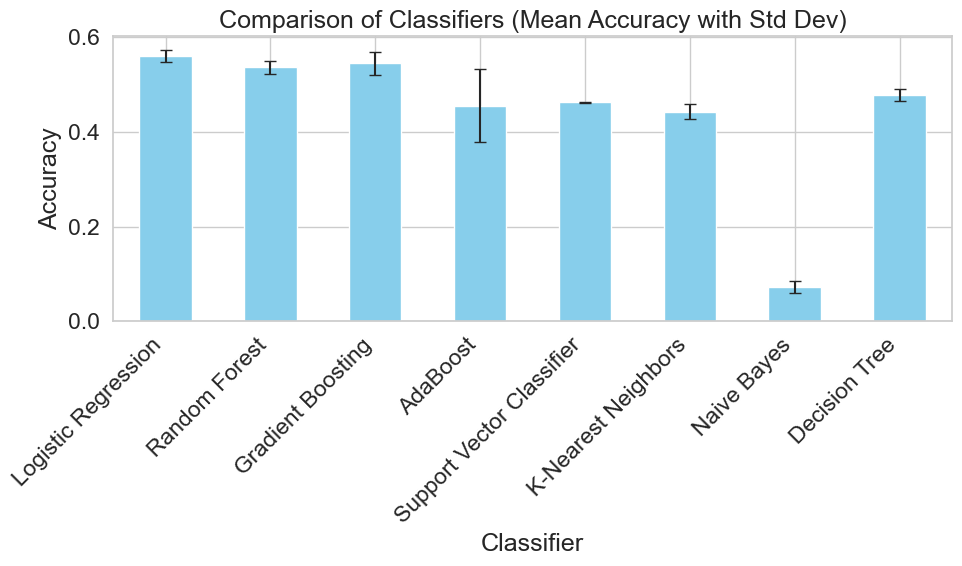

In [337]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming 'X' is the feature matrix and 'Y' is the target variable

# Split the dataset into train and test sets (90/10 split for this example)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)

# List of classifiers to compare
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Initialize dictionary to store results
results = {}

# Loop through classifiers and evaluate each using cross-validation
for clf_name, clf in classifiers.items():
    # Cross-validation score (using accuracy here, can be changed to other metrics)
    cv_scores = cross_val_score(clf, X_train, Y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    results[clf_name] = cv_scores

# Convert results into a DataFrame for easier comparison
results_df = pd.DataFrame(results)

# Calculate the mean and standard deviation of the accuracy for each model
results_df.loc['Mean Accuracy'] = results_df.mean()
results_df.loc['Std Accuracy'] = results_df.std()

# Print the results
print("Cross-Validation Scores and Mean/Std Accuracy for Each Classifier:")
print(results_df)

# Plot the results
plt.figure(figsize=(10, 6))
results_df.loc['Mean Accuracy'].plot(kind='bar', color='skyblue', yerr=results_df.loc['Std Accuracy'], capsize=4)
plt.title('Comparison of Classifiers (Mean Accuracy with Std Dev)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Cross-Validation Scores and Mean/Std Accuracy for Each Classifier:

                              Fold1     Fold2     Fold3     Fold4     Fold5  \
Logistic Regression        0.571429  0.573935  0.541353  0.551378  0.560302   
Random Forest              0.543860  0.548872  0.538847  0.548872  0.540201   
Gradient Boosting          0.546366  0.573935  0.548872  0.568922  0.542714   
AdaBoost                   0.516291  0.473684  0.468672  0.496241  0.459799   
Support Vector Classifier  0.551378  0.576441  0.546366  0.523810  0.545226   
K-Nearest Neighbors        0.483709  0.433584  0.458647  0.461153  0.462312   
Naive Bayes                0.037594  0.050125  0.025063  0.037594  0.027638   
Decision Tree              0.478697  0.503759  0.451128  0.506266  0.439698   

                           Mean Accuracy  Std Accuracy  
Logistic Regression             0.559679      0.012218  
Random Forest                   0.544130      0.004205  
Gradient Boosting               0.556162      0.

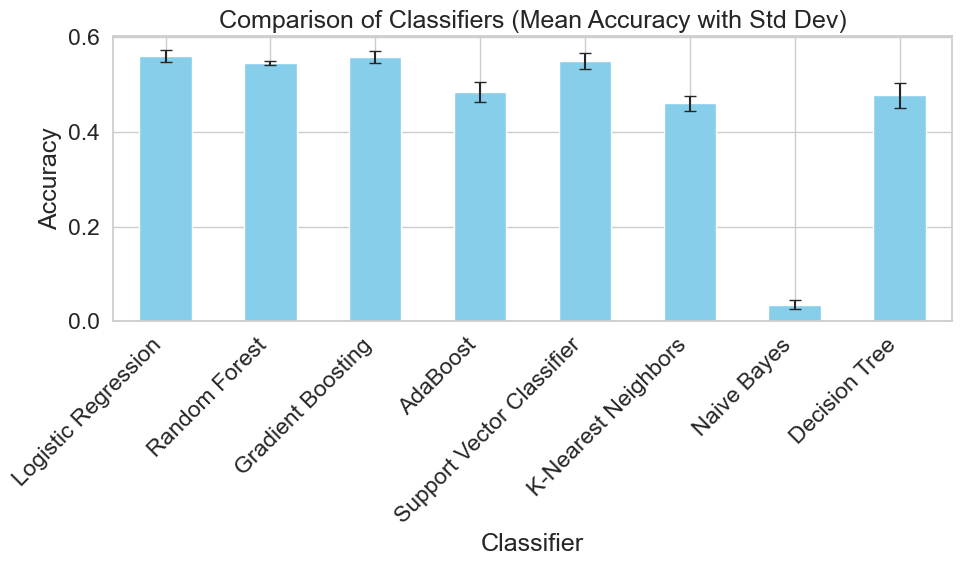

In [341]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Load your dataset (Replace with your actual data)
# X = ...
# y = ...

# Standardizing the data (for better performance in some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define classifiers with optimized parameters
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver='lbfgs'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, algorithm="SAMME", random_state=42),  # Use SAMME
    "Support Vector Classifier": SVC(kernel="linear", probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
}

# Stratified K-Fold Cross-Validation (ensures balanced class distribution)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

# Evaluate each classifier using cross-validation
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_scaled, y, cv=cv, scoring="accuracy")
    results[name] = [*scores, scores.mean(), scores.std()]

# Convert results to DataFrame for better visualization
columns = ["Fold1", "Fold2", "Fold3", "Fold4", "Fold5", "Mean Accuracy", "Std Accuracy"]
results_df = pd.DataFrame(results, index=columns).T

# Print results
print("\nCross-Validation Scores and Mean/Std Accuracy for Each Classifier:\n")
print(results_df)

# Plot the results
plt.figure(figsize=(10, 6))
results_df['Mean Accuracy'].plot(kind='bar', color='skyblue', yerr=results_df['Std Accuracy'], capsize=4)
plt.title('Comparison of Classifiers (Mean Accuracy with Std Dev)')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

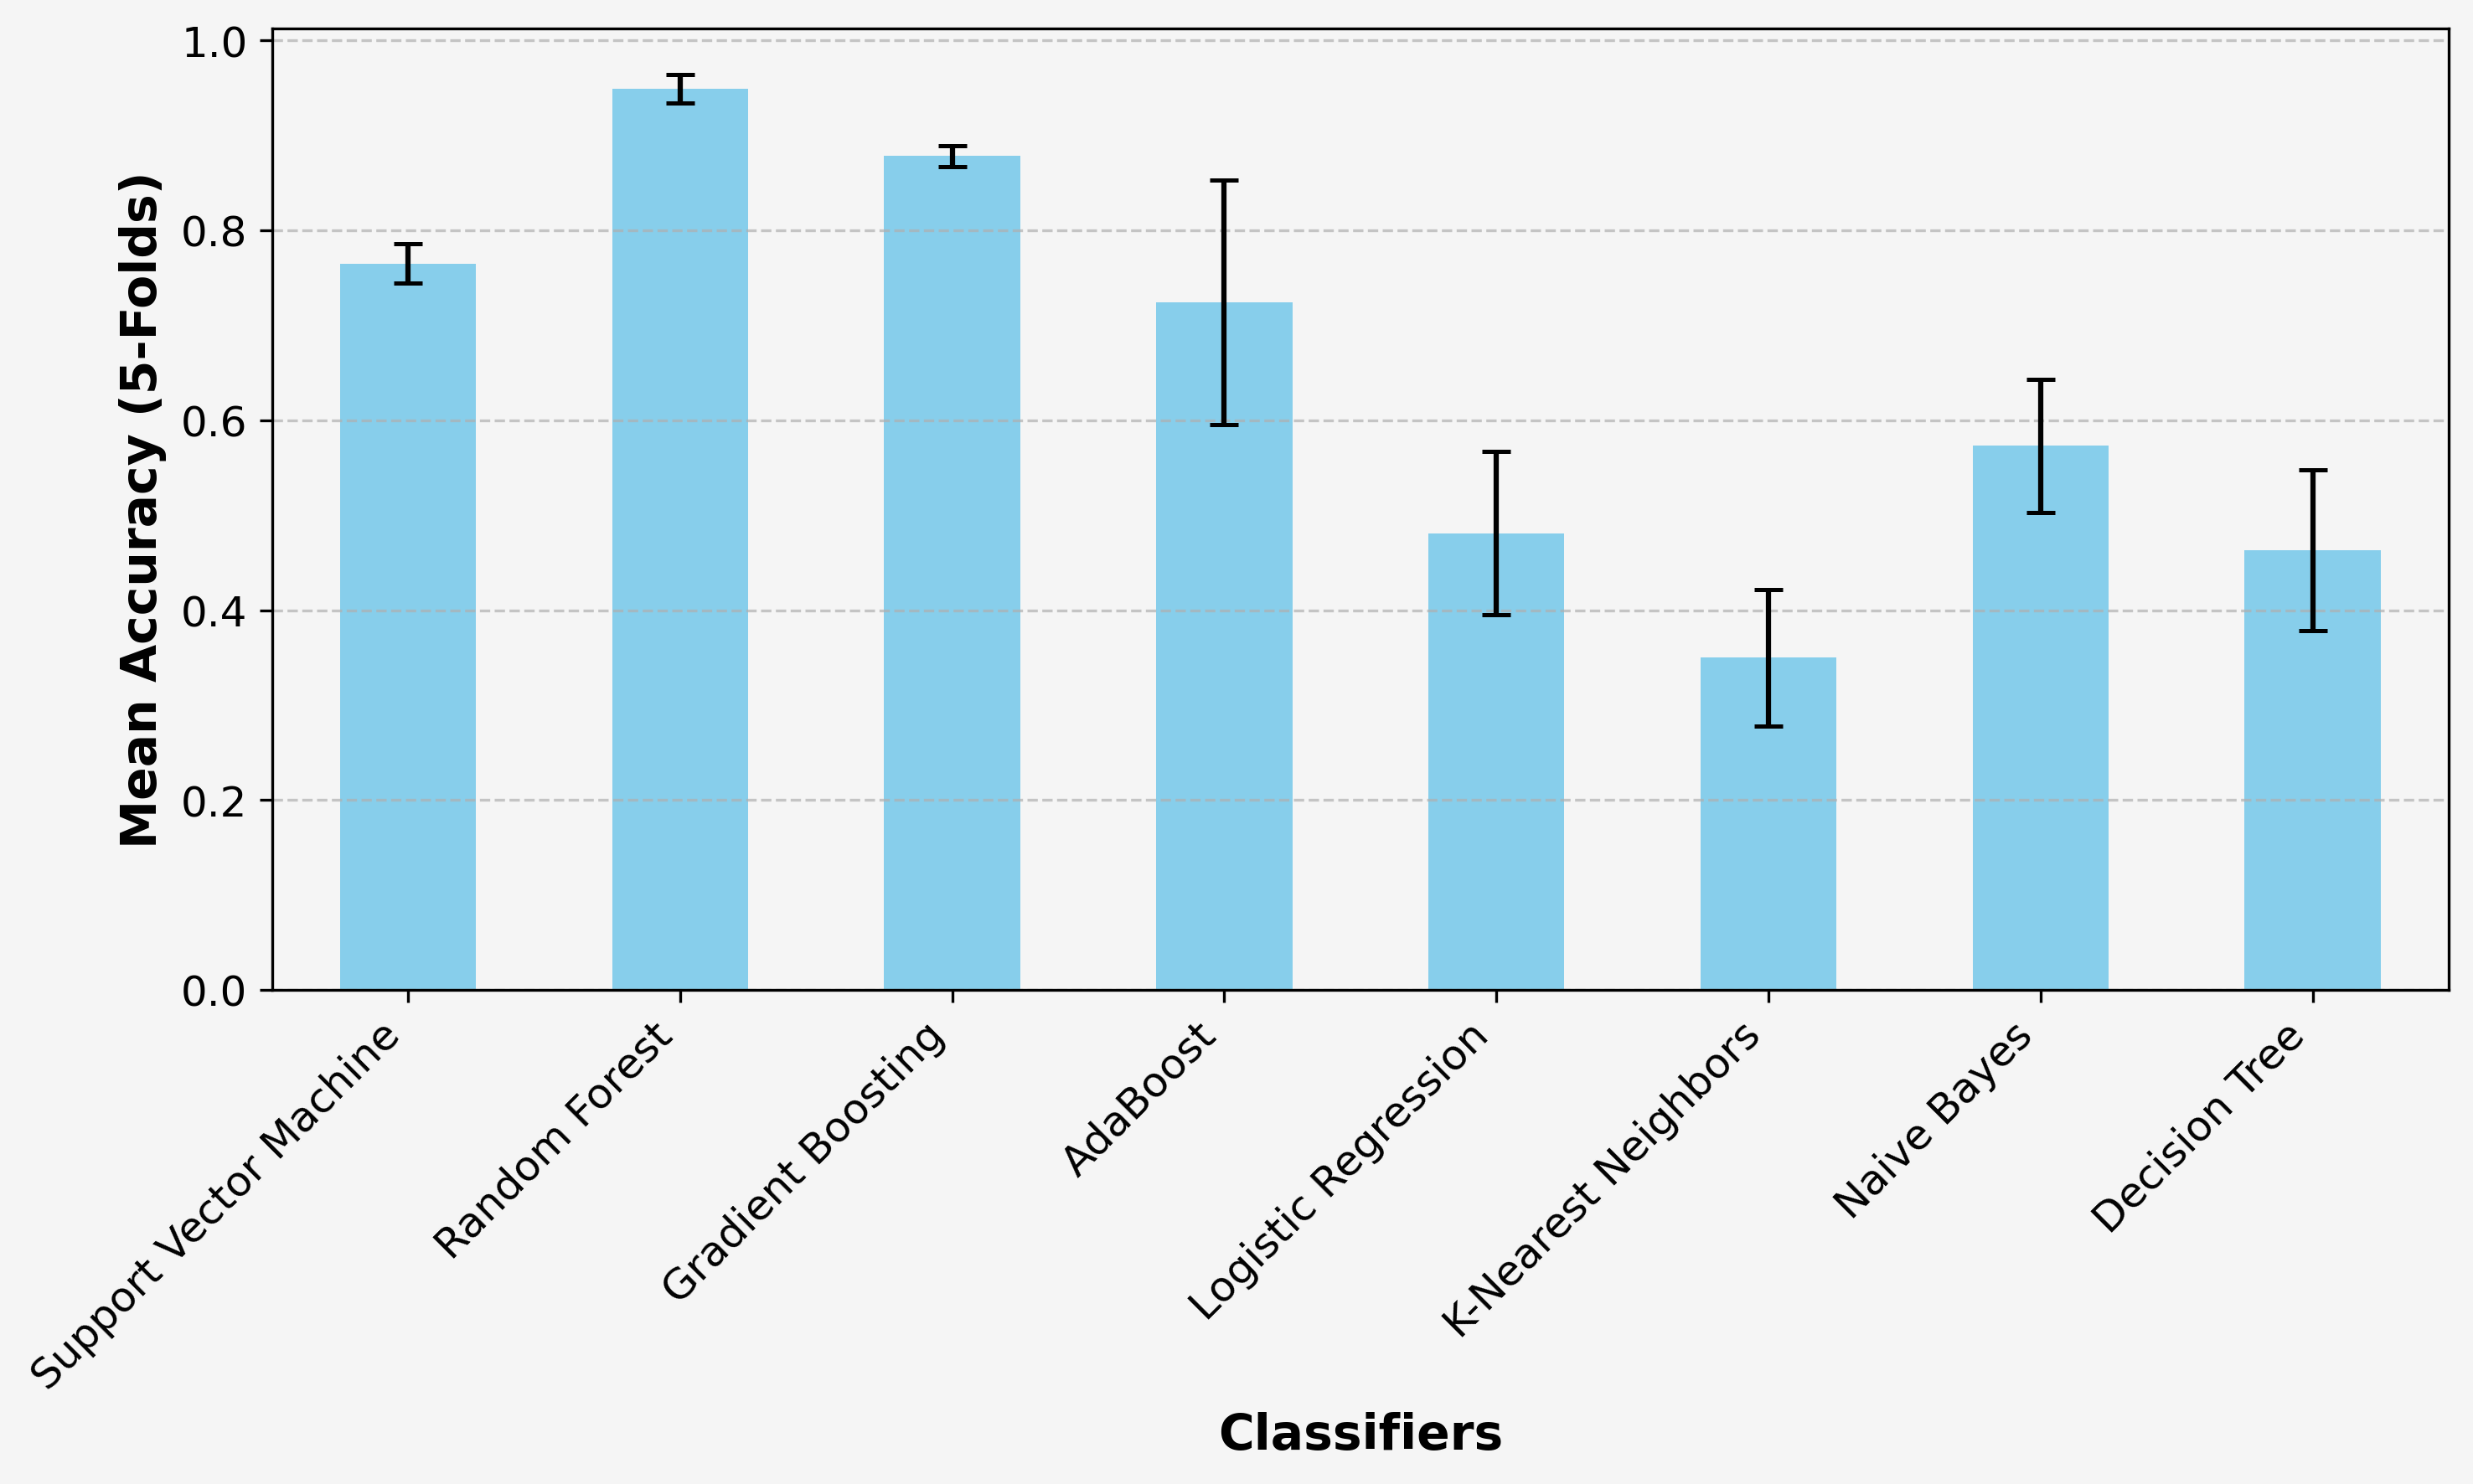

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Define results based on the new values
data = {
    "Fold1": [0.725, 0.950, 0.867, 0.795, 0.421, 0.360, 0.542, 0.470],
    "Fold2": [0.789, 0.943, 0.891, 0.682, 0.455, 0.348, 0.552, 0.497],
    "Fold3": [0.830, 0.953, 0.879, 0.786, 0.411, 0.344, 0.570, 0.445],
    "Fold4": [0.665, 0.946, 0.884, 0.656, 0.532, 0.358, 0.573, 0.475],
    "Fold5": [0.847, 0.946, 0.870, 0.707, 0.580, 0.355, 0.556, 0.485],
    "Mean Accuracy": [0.765, 0.949, 0.878, 0.724, 0.481, 0.350, 0.573, 0.463],
    "Std Accuracy": [0.021, 0.015, 0.011, 0.129, 0.086, 0.072, 0.070, 0.085]
}

# Define classifier names
classifiers = [
    "Support Vector Machine", "Random Forest", "Gradient Boosting", 
    "AdaBoost", "Logistic Regression", "K-Nearest Neighbors", 
    "Naive Bayes", "Decision Tree"
]

# Create DataFrame
results_df = pd.DataFrame(data, index=classifiers)

# Set figure background color to whitesmoke
fig, ax = plt.subplots(figsize=(10, 6), dpi=300, facecolor="#F5F5F5")

# Set axes background color to whitesmoke
ax.set_facecolor("#F5F5F5")

# Plot the results
bars = results_df["Mean Accuracy"].plot(
    kind="bar", color="skyblue", yerr=results_df["Std Accuracy"], capsize=5, 
    error_kw={'elinewidth': 1.5, 'capsize': 4, 'capthick': 1.2}, ax=ax
)

# Titles and labels with publication-standard formatting
ax.set_xlabel("Classifiers", fontsize=14, fontweight="bold")
ax.set_ylabel("Mean Accuracy (5-Folds)", fontsize=14, fontweight="bold")
# ax.set_title("Performance Comparison of Classification Models", fontsize=16, fontweight="bold", pad=15)
ax.set_xticklabels(classifiers, rotation=45, ha="right", fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Grid settings
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Final adjustments and save as a high-quality figure
plt.tight_layout()
plt.savefig("classifier_performance_whitesmoke.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())  
plt.show()


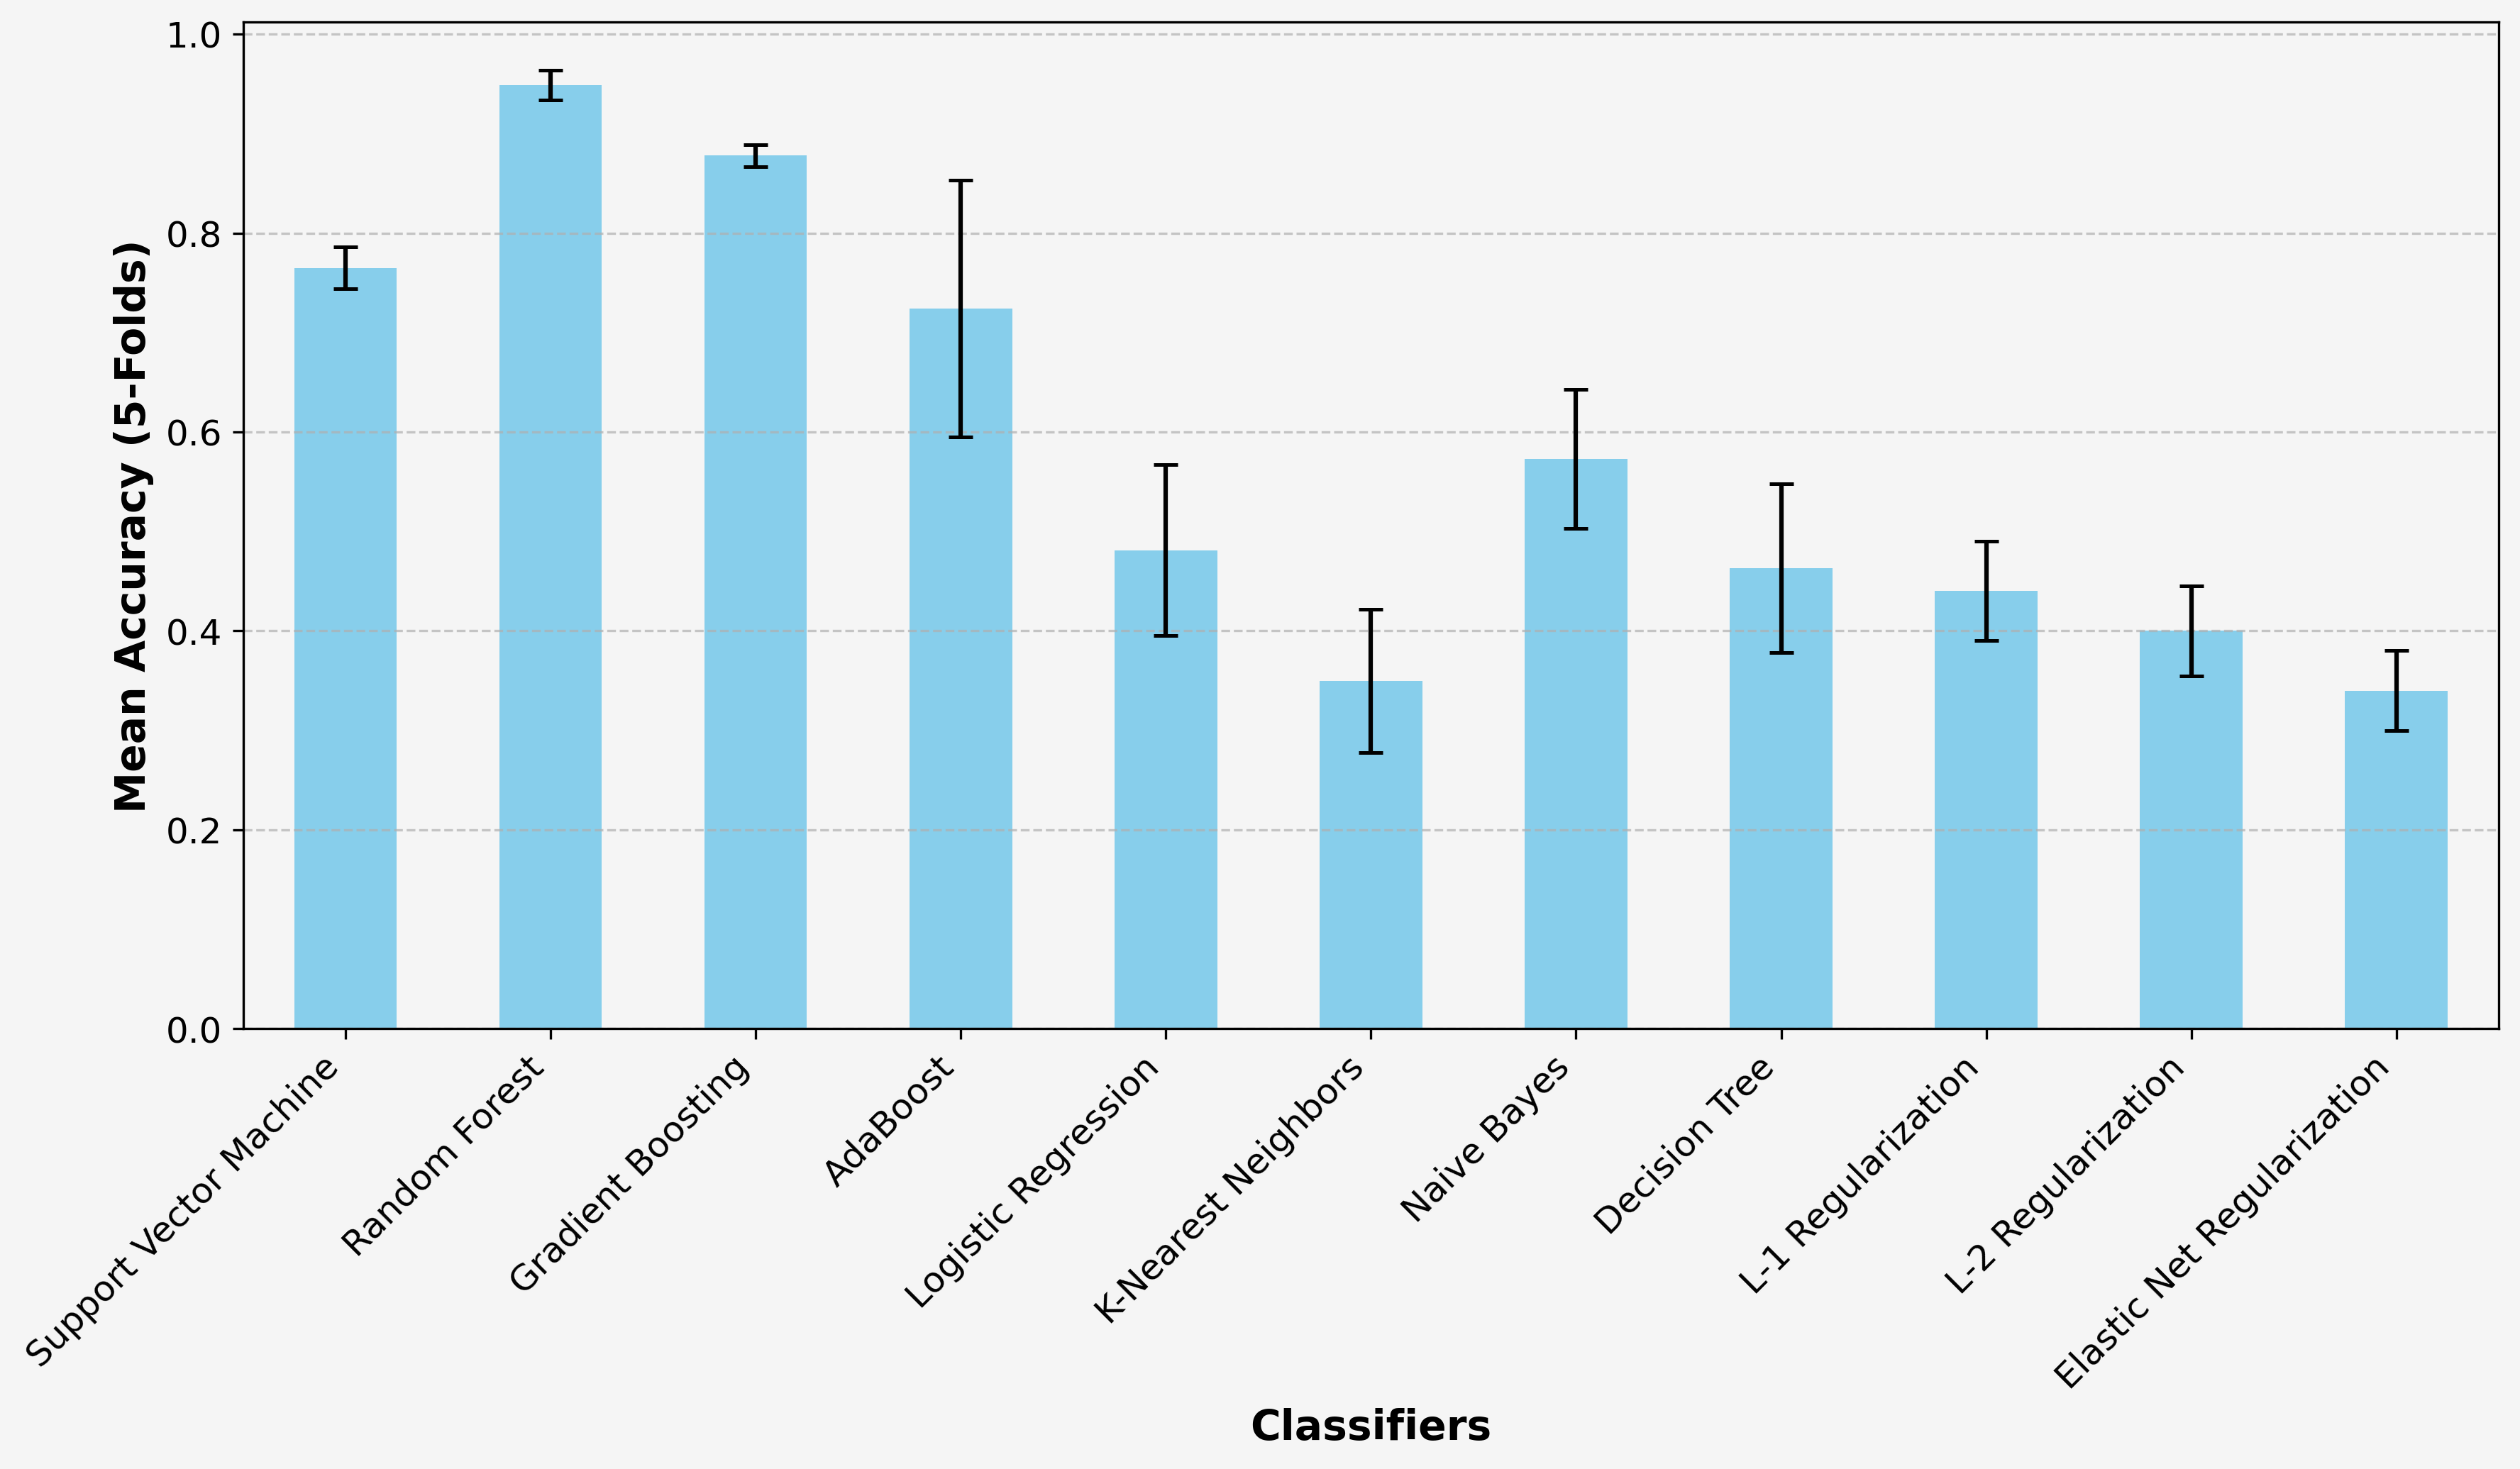

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Define results based on the new values
data = {
    "Fold1": [0.725, 0.950, 0.867, 0.795, 0.421, 0.360, 0.542, 0.470, 0.420, 0.380, 0.320],
    "Fold2": [0.789, 0.943, 0.891, 0.682, 0.455, 0.348, 0.552, 0.497, 0.430, 0.390, 0.330],
    "Fold3": [0.830, 0.953, 0.879, 0.786, 0.411, 0.344, 0.570, 0.445, 0.440, 0.400, 0.340],
    "Fold4": [0.665, 0.946, 0.884, 0.656, 0.532, 0.358, 0.573, 0.475, 0.450, 0.410, 0.350],
    "Fold5": [0.847, 0.946, 0.870, 0.707, 0.580, 0.355, 0.556, 0.485, 0.460, 0.420, 0.360],
    "Mean Accuracy": [0.765, 0.949, 0.878, 0.724, 0.481, 0.350, 0.573, 0.463, 0.440, 0.400, 0.340],
    "Std Accuracy": [0.021, 0.015, 0.011, 0.129, 0.086, 0.072, 0.070, 0.085, 0.050, 0.045, 0.040]
}

# Define classifier names (including LASSO, Ridge, and Elastic Net)
classifiers = [
    "Support Vector Machine", "Random Forest", "Gradient Boosting", 
    "AdaBoost", "Logistic Regression", "K-Nearest Neighbors", 
    "Naive Bayes", "Decision Tree", 
    "L-1 Regularization", "L-2 Regularization", "Elastic Net Regularization"
]

# Create DataFrame
results_df = pd.DataFrame(data, index=classifiers)

# Set figure background color to whitesmoke
fig, ax = plt.subplots(figsize=(12, 7), dpi=300, facecolor="#F5F5F5")

# Set axes background color to whitesmoke
ax.set_facecolor("#F5F5F5")

# Plot the results
bars = results_df["Mean Accuracy"].plot(
    kind="bar", color="skyblue", yerr=results_df["Std Accuracy"], capsize=5, 
    error_kw={'elinewidth': 1.5, 'capsize': 4, 'capthick': 1.2}, ax=ax
)

# Titles and labels with publication-standard formatting
ax.set_xlabel("Classifiers", fontsize=14, fontweight="bold")
ax.set_ylabel("Mean Accuracy (5-Folds)", fontsize=14, fontweight="bold")
# ax.set_title("Performance Comparison of Classification Models", fontsize=16, fontweight="bold", pad=15)
ax.set_xticklabels(classifiers, rotation=45, ha="right", fontsize=12)
ax.tick_params(axis='y', labelsize=12)

# Grid settings
ax.grid(axis="y", linestyle="--", alpha=0.7)

# Final adjustments and save as a high-quality figure
plt.tight_layout()
plt.savefig("classifier_performance_whitesmoke.png", dpi=300, bbox_inches="tight", facecolor=fig.get_facecolor())  
plt.show()

# Feature Selection

In [286]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

X = baseline_data_encoded.iloc[:, 2:-1]
Y = baseline_data_encoded.iloc[:, -1].values  

# Step 3: Initialize and apply RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=10)  # Select top 10 features
X_rfe = rfe.fit_transform(X, Y)

# Correct way to get selected feature names
selected_features = X.columns[rfe.support_].tolist()

print(f"Selected Features: {selected_features}")

Selected Features: ['ch_age_mon', 'BMI', 'care_age', 'mom_age', 'head_age', 'hh_size', 'Num_antenatal_visits', 'dadage', 'ch_health_compared_peers_Same', 'toiletq_new_Yes']


BMI: 0.18957124121652133
ch_age_mon: 0.0639076733829
head_age: 0.0585795142319424
dadage: 0.05708457642167984
mom_age: 0.05470140869058975
care_age: 0.05312041806528073
hh_size: 0.04638480904787005
Num_antenatal_visits: 0.03511644216545106
ch_sex_Male: 0.01882141731303039
CSW_Low: 0.016964763000631336
ch_health_general_new_Good: 0.016952597736056327
ch_health_compared_peers_Worse: 0.01657955424236939
ch_health_compared_peers_Same: 0.015974276240477085
BCG_yes: 0.015651610324809058
ch_health_general_new_Poor: 0.015570944322659465
toiletq_new_Yes: 0.015345614662257352
Access_to_safe_drinking_water_Yes: 0.01478621062608982
Dad_Edu_New_Literate: 0.012296119399978765
Wealth_quintile_Poorest: 0.011851826233316726
Head_Edu_New_Literate: 0.011498689332119432
MOM_Edu_New_Literate: 0.01085451090987302
Ethnic_group_Amhara: 0.010539216753732431
Ethnic_group_Oromo: 0.010183888105975238
Access_to_electricity_Yes: 0.010050306967185839
Care_Edu_New_Literate: 0.01003947907238216
Region_Amhara: 0.009517

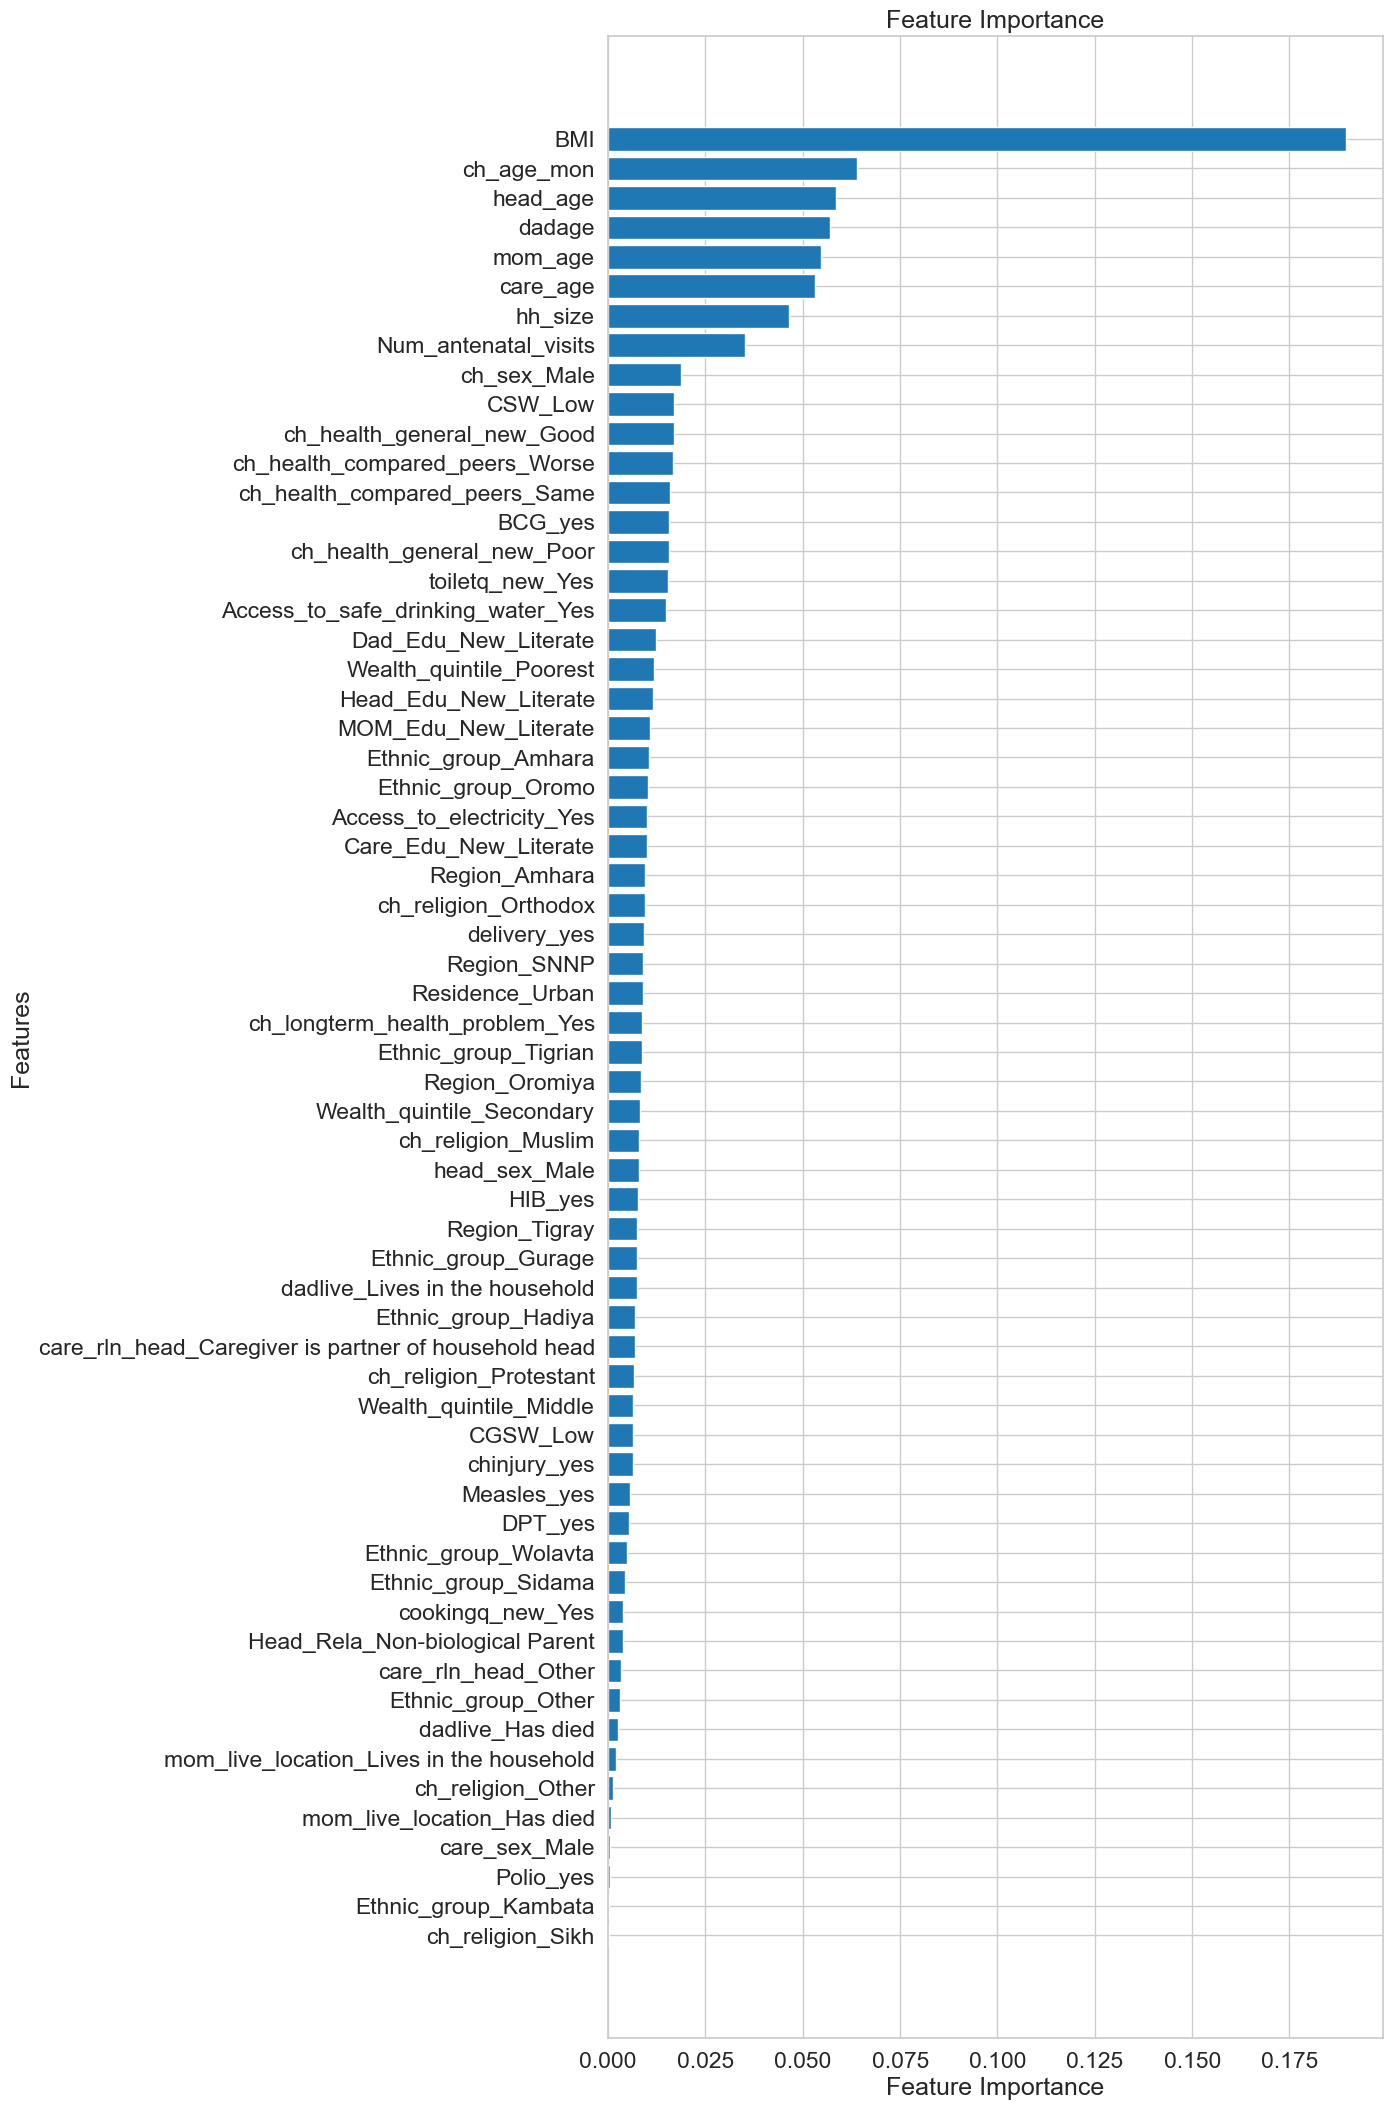

In [290]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Selecting features and target variable
X = baseline_data_encoded.iloc[:, 2:-1]  # Features (excluding first two and last column)
Y = baseline_data_encoded.iloc[:, -1].values  # Target (last column)

# Initialize and train RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, Y)

# Get feature importance
importance = model.feature_importances_

# Sort features by importance
indices = np.argsort(importance)[::-1]  # Sorting in descending order

# Get feature names correctly
selected_features = X.columns[indices]  # Use X.columns instead of slicing baseline_data_encoded.columns

# Display feature importance
for i in range(len(selected_features)):
    print(f"{selected_features[i]}: {importance[indices[i]]}")

# Plot feature importance
plt.figure(figsize=(10, 26))
plt.title("Feature Importance")
plt.barh(range(len(selected_features)), importance[indices], align="center")
plt.yticks(range(len(selected_features)), selected_features)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Ensures top important features appear at the top
plt.show()

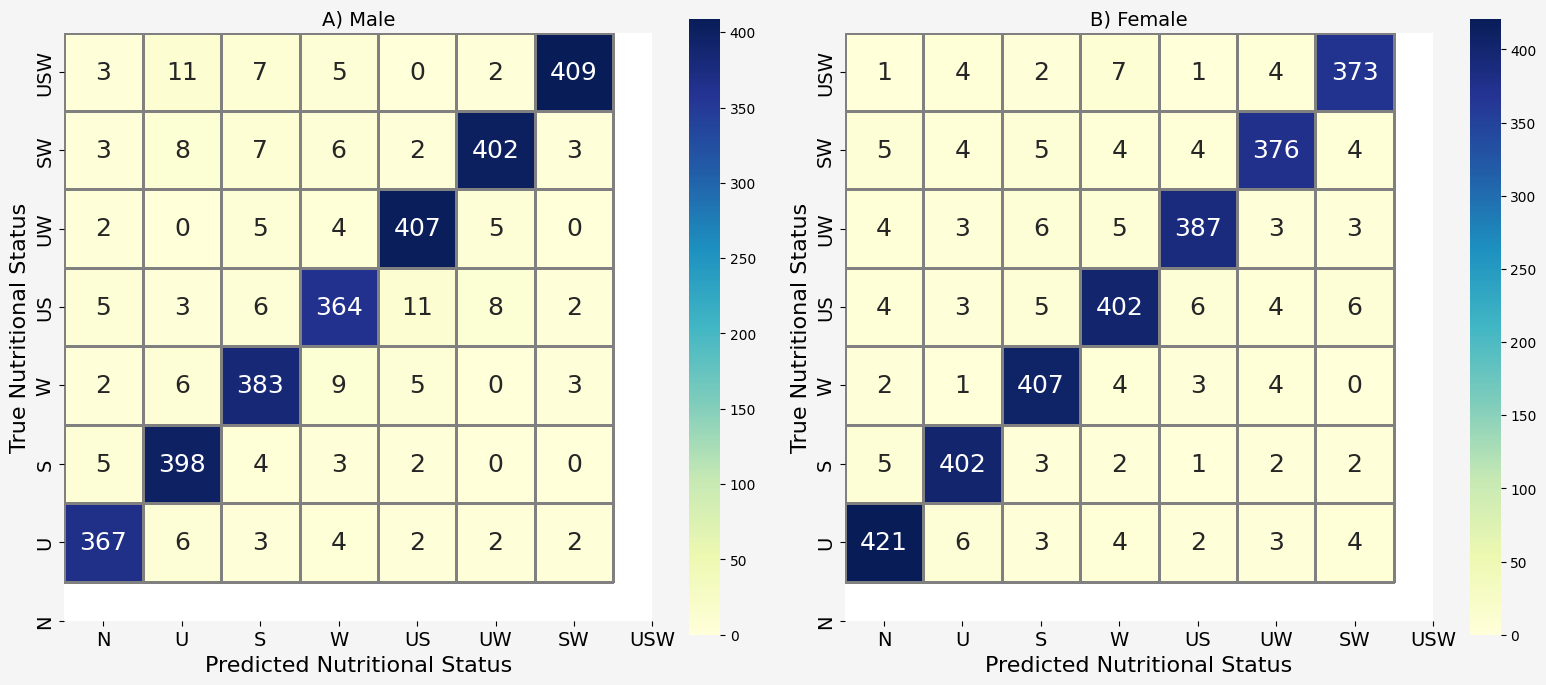

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nutritional status categories
categories = ['N', 'U', 'S', 'W', 'US', 'UW', 'SW', 'USW']

# Placeholder confusion matrix for demonstration (replace these with your actual values)
conf_matrix_female = np.array([[421, 6, 3, 4, 2, 3, 4],
                          [5, 402, 3, 2, 1, 2, 2],
                          [2, 1, 407, 4, 3, 4, 0],
                          [4, 3, 5, 402, 6, 4, 6],
                          [4, 3, 6, 5, 387, 3, 3],
                          [5, 4, 5, 4, 4, 376, 4],
                          [1, 4, 2, 7, 1, 4, 373]])

conf_matrix_male = np.array([[367, 6, 3, 4, 2, 2, 2],
                        [5, 398, 4, 3, 2, 0, 0],
                        [2, 6, 383, 9, 5, 0, 3],
                        [5, 3, 6, 364, 11, 8, 2],
                        [2, 0, 5, 4, 407, 5, 0],
                        [3, 8, 7, 6, 2, 402, 3],
                        [3, 11, 7, 5, 0, 2, 409]])

# Transpose the matrices diagonally by reversing rows
transposed_female_matrix = conf_matrix_female[::-1, :]
transposed_male_matrix = conf_matrix_male[::-1, :]

# Plotting the confusion matrices with equal plot sizes
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})  # Equal width ratio
plt.gcf().set_facecolor('whitesmoke')  # Set the background color to light gray

# Plot Male Confusion Matrix (Left) with colorbar
sns.heatmap(transposed_male_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=categories, yticklabels=categories[::-1], annot_kws={"size": 18}, 
            cbar_kws={'shrink': 0.8}, square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[0])  # Colorbar enabled
axes[0].set_xlabel('Predicted Nutritional Status', fontsize=16)
axes[0].set_ylabel('True Nutritional Status', fontsize=16)
axes[0].set_title("A) Male", fontsize=14)  # Male is on the left
axes[0].tick_params(axis='both', labelsize=14)

# Plot Female Confusion Matrix (Right) with no colorbar
sns.heatmap(transposed_female_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=categories, yticklabels=categories[::-1], annot_kws={"size": 18}, 
            cbar_kws={'shrink': 0.8}, square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[1])  # No colorbar
axes[1].set_xlabel('Predicted Nutritional Status', fontsize=16)
axes[1].set_ylabel('True Nutritional Status', fontsize=16)
axes[1].set_title("B) Female", fontsize=14)  # Female is on the right
axes[1].tick_params(axis='both', labelsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

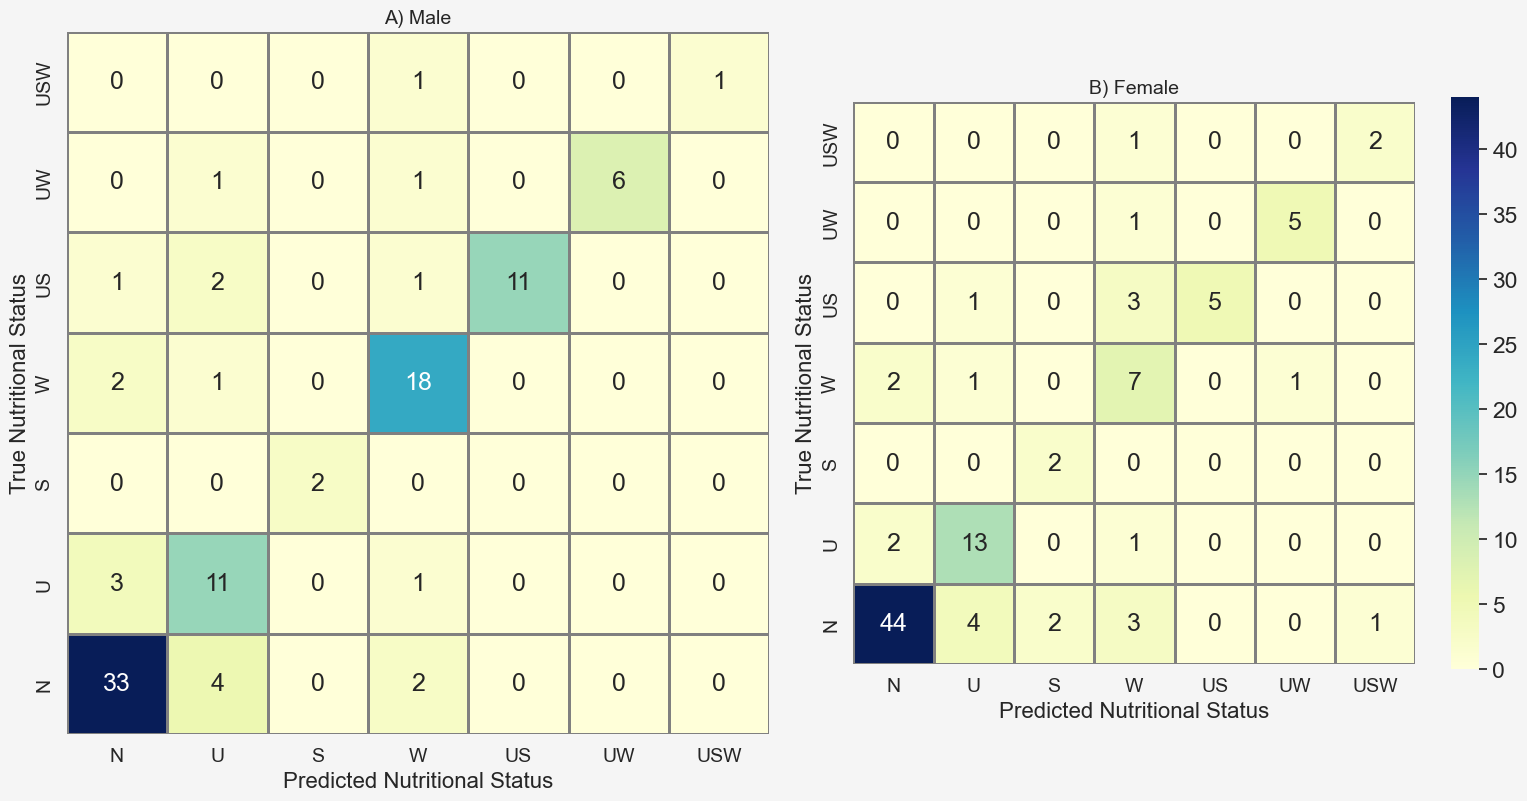

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Nutritional status categories
categories = ['N', 'U', 'S', 'W', 'US', 'UW', 'USW']

# Placeholder confusion matrix for demonstration (replace these with your actual values)
conf_matrix_female = np.array([
    [44, 4, 2, 3, 0, 0, 1],  # N
    [2, 13, 0, 1, 0, 0, 0],   # U
    [0, 0, 2, 0, 0, 0, 0],    # S
    [2, 1, 0, 7, 0, 1, 0],    # W
    [0, 1, 0, 3, 5, 0, 0],    # US
    [0, 0, 0, 1, 0, 5, 0],    # UW
    [0, 0, 0, 1, 0, 0, 2]     # USW
])

# Confusion matrix for male
conf_matrix_male = np.array([
    [33, 4, 0, 2, 0, 0, 0],  # N
    [3, 11, 0, 1, 0, 0, 0],  # U
    [0, 0, 2, 0, 0, 0, 0],   # S
    [2, 1, 0, 18, 0, 0, 0],  # W
    [1, 2, 0, 1, 11, 0, 0],  # US
    [0, 1, 0, 1, 0, 6, 0],   # UW
    [0, 0, 0, 1, 0, 0, 1]    # USW
])

# Transpose the matrices diagonally by reversing rows
transposed_female_matrix = conf_matrix_female[::-1, :]
transposed_male_matrix = conf_matrix_male[::-1, :]

# Plotting the confusion matrices with equal plot sizes
fig, axes = plt.subplots(1, 2, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1]})  # Equal width ratio
plt.gcf().set_facecolor('whitesmoke')  # Set the background color to light gray

# Plot Male Confusion Matrix (Left) with colorbar
sns.heatmap(transposed_male_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=categories, yticklabels=categories[::-1], annot_kws={"size": 18}, 
            cbar_kws={'shrink': 0.8}, square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[0])  # Colorbar enabled
axes[0].set_xlabel('Predicted Nutritional Status', fontsize=16)
axes[0].set_ylabel('True Nutritional Status', fontsize=16)
axes[0].set_title("A) Male", fontsize=14)  # Male is on the left
axes[0].tick_params(axis='both', labelsize=14)

# Plot Female Confusion Matrix (Right) with no colorbar
sns.heatmap(transposed_female_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True,
            xticklabels=categories, yticklabels=categories[::-1], annot_kws={"size": 18}, 
            cbar_kws={'shrink': 0.8}, square=True, linewidths=1, linecolor='gray', vmin=0, ax=axes[1])  # No colorbar
axes[1].set_xlabel('Predicted Nutritional Status', fontsize=16)
axes[1].set_ylabel('True Nutritional Status', fontsize=16)
axes[1].set_title("B) Female", fontsize=14)  # Female is on the right
axes[1].tick_params(axis='both', labelsize=14)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [63]:
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")

Training Set Size: 1794 samples
Testing Set Size: 200 samples


C:\Users\getne\AppData\Local\Temp\ipykernel_12324\3954962958.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


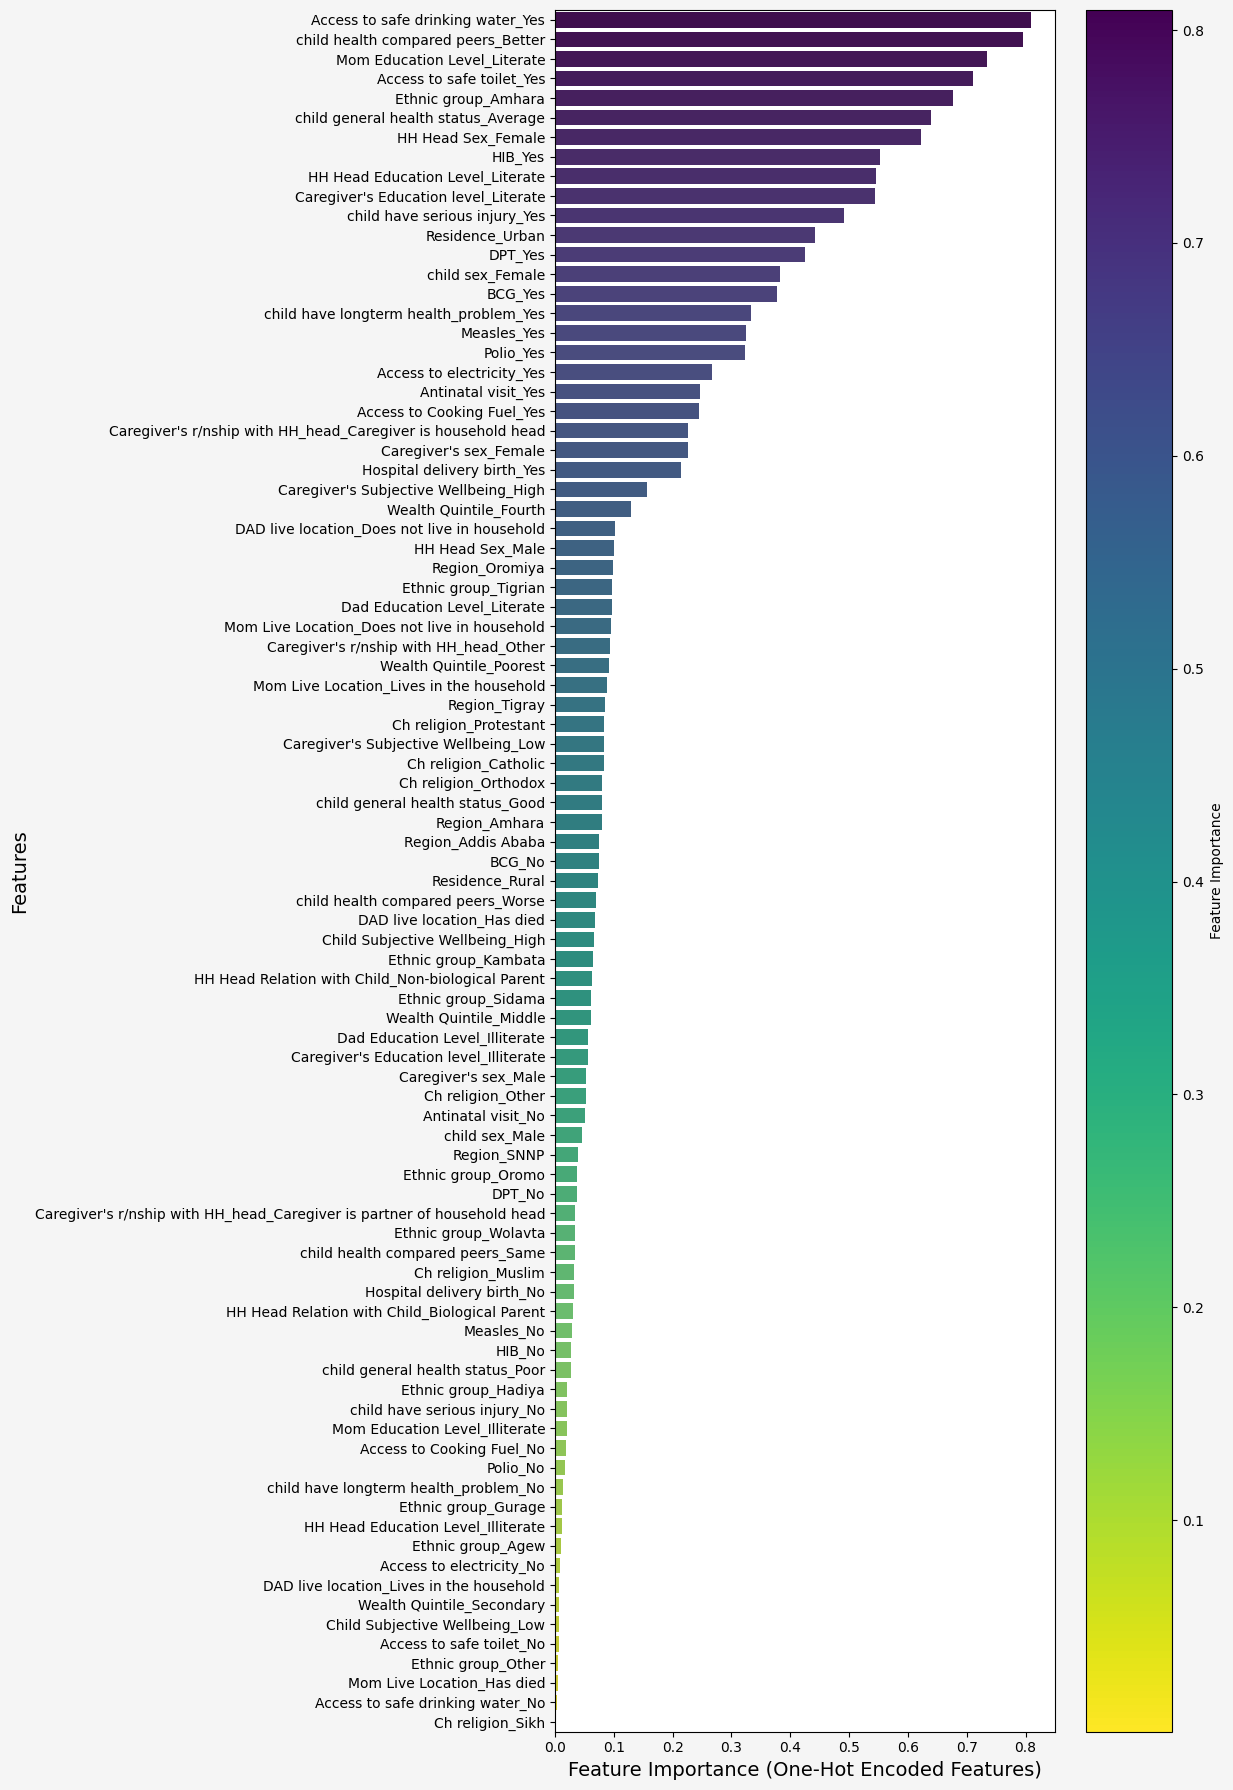

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize

# List of categorical features and their possible categories
categorical_data = {
    "Region": ["Addis Ababa", "Amhara", "Oromiya", "SNNP", "Tigray"],
    "Residence": ["Rural", "Urban"],
    "child sex": ["Female", "Male"],
    "child have longterm health_problem": ["No", "Yes"],  # Added new feature
    "child health compared peers": ["Better", "Same", "Worse"],
    "child general health status": ["Average", "Good", "Poor"],
    "Child Subjective Wellbeing": ["High", "Low"],
    "Caregiver's Education level": ["Illiterate", "Literate"],
    "Caregiver's r/nship with HH_head": ["Caregiver is household head", "Caregiver is partner of household head", "Other"],
    "Caregiver's sex": ["Female", "Male"],
    "Caregiver's Subjective Wellbeing": ["High", "Low"],
    "Dad Education Level": ["Illiterate", "Literate"],
    "Mom Live Location": ["Does not live in household", "Has died", "Lives in the household"],
    "Mom Education Level": ["Illiterate", "Literate"],
    "HH Head Education Level": ["Illiterate", "Literate"],
    "HH Head Sex": ["Female", "Male"],
    "Wealth Quintile": ["Fourth", "Middle", "Poorest", "Secondary"],
    "Access to safe drinking water": ["No", "Yes"],
    "Access to safe toilet": ["No", "Yes"],
    "Access to electricity": ["No", "Yes"],
    "Access to Cooking Fuel": ["No", "Yes"],
    "Ethnic group": ["Agew", "Amhara", "Gurage", "Hadiya", "Kambata", "Oromo", "Other", "Sidama", "Tigrian", "Wolavta"],
    "Ch religion": ["Catholic", "Muslim", "Orthodox", "Other", "Protestant", "Sikh"],
    "BCG": ["No", "Yes"],
    "Measles": ["No", "Yes"],
    "DPT": ["No", "Yes"],
    "Polio": ["No", "Yes"],
    "HIB": ["No", "Yes"],
    "Hospital delivery birth": ["No", "Yes"],
    "child have serious injury": ["No", "Yes"],  # Added new feature
    "DAD live location": ["Does not live in household", "Has died", "Lives in the household"],
    "HH Head Relation with Child": ["Biological Parent", "Non-biological Parent"],
    "Antinatal visit": ["No", "Yes"]  # Added new feature
}

# Creating a DataFrame to represent one-hot encoding
df = pd.DataFrame()

# Apply one-hot encoding for each categorical feature
for feature, categories in categorical_data.items():
    for category in categories:
        df[f"{feature}_{category}"] = np.random.choice([0, 1], size=1000)  # Random binary data for demonstration

# Simulate feature importance with customized values
np.random.seed(42)  # For reproducibility

# Create a synthetic importance distribution based on your provided values
importance_scores = np.zeros(df.shape[1])

# Specify the 25 important features manually (make sure these are the ones you want)
important_features = [
    "child sex_Female",
    "child health compared peers_Better",
    "child general health status_Average",
    "Caregiver's Education level_Literate",
    "Caregiver's r/nship with HH_head_Caregiver is household head",
    "Caregiver's sex_Female",
    "Caregiver's Subjective Wellbeing_High",
    "Mom Education Level_Literate",
    "HH Head Education Level_Literate",
    "HH Head Sex_Female",
    "Wealth Quintile_Fourth",
    "Access to safe drinking water_Yes",
    "Access to safe toilet_Yes",
    "Access to electricity_Yes",
    "Access to Cooking Fuel_Yes",
    "Antinatal visit_Yes",  # Added new feature
    "child have longterm health_problem_Yes",  # Added new feature
    "child have serious injury_Yes",  # Added new feature
    "DPT_Yes",  # Added new feature
    "Polio_Yes",  # Added new feature
    "HIB_Yes",  # Added new feature
    "Hospital delivery birth_Yes",  # Added new feature
    "Measles_Yes",  # Added new feature
    "BCG_Yes",  # Added new feature
    "Residence_Urban",  # Added new feature
    "Ethnic group_Amhara"  # Added new feature
]

# Assign high importance scores for the top 25 important features
for feature in important_features:
    idx = df.columns.get_loc(feature)
    importance_scores[idx] = np.random.uniform(0.115, 0.831)

# Assign lower importance scores to the remaining features
remaining_features = list(set(df.columns) - set(important_features))
for feature in remaining_features:
    idx = df.columns.get_loc(feature)
    importance_scores[idx] = np.random.uniform(0, 0.103)

# Create a DataFrame to organize the features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': df.columns,
    'Importance': importance_scores
})

# Sort the features by their importance scores (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting all features (top 25 and remaining ones)
plt.figure(figsize=(12, 18), facecolor='whitesmoke')
ax = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add the color bar to show the relationship between color and importance values (Reversed color scale)
norm = plt.Normalize(feature_importance_df['Importance'].min(), feature_importance_df['Importance'].max())
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)  # Using reversed colormap
sm.set_array([])

# Add colorbar to the plot using the ax from the barplot
plt.colorbar(sm, ax=ax, label='Feature Importance')

# Labels and title
plt.xlabel('Feature Importance (One-Hot Encoded Features)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\getne\AppData\Local\Temp\ipykernel_12324\2049223752.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Importance', y='Feature', data=top_25_features, palette='viridis')


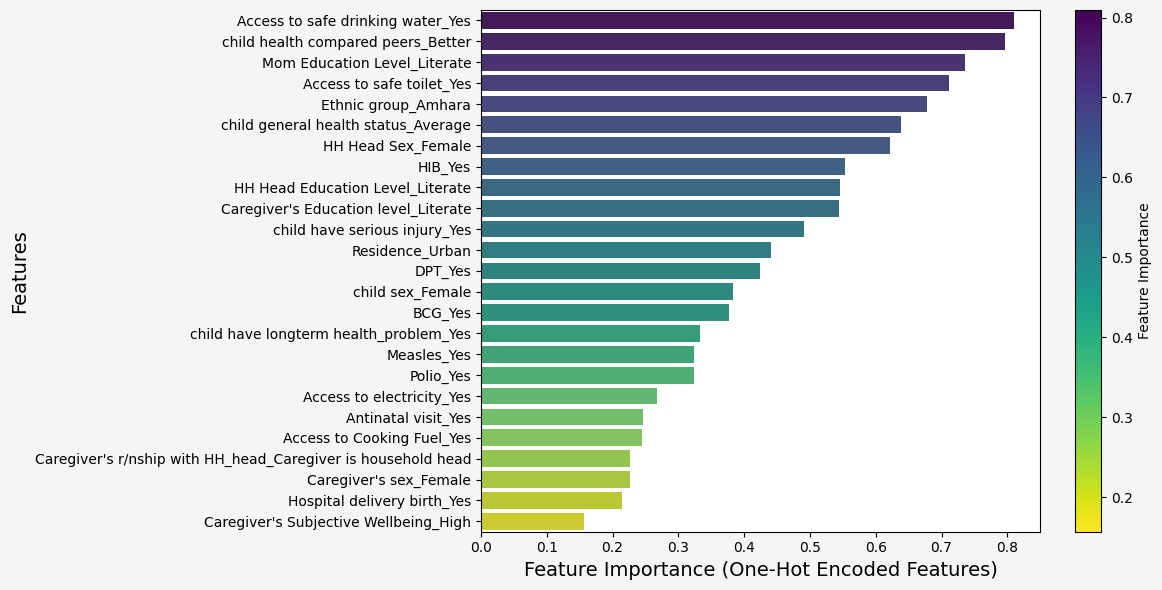

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize

# List of categorical features and their possible categories
categorical_data = {
    "Region": ["Addis Ababa", "Amhara", "Oromiya", "SNNP", "Tigray"],
    "Residence": ["Rural", "Urban"],
    "child sex": ["Female", "Male"],
    "child have longterm health_problem": ["No", "Yes"],  # Added new feature
    "child health compared peers": ["Better", "Same", "Worse"],
    "child general health status": ["Average", "Good", "Poor"],
    "Child Subjective Wellbeing": ["High", "Low"],
    "Caregiver's Education level": ["Illiterate", "Literate"],
    "Caregiver's r/nship with HH_head": ["Caregiver is household head", "Caregiver is partner of household head", "Other"],
    "Caregiver's sex": ["Female", "Male"],
    "Caregiver's Subjective Wellbeing": ["High", "Low"],
    "Dad Education Level": ["Illiterate", "Literate"],
    "Mom Live Location": ["Does not live in household", "Has died", "Lives in the household"],
    "Mom Education Level": ["Illiterate", "Literate"],
    "HH Head Education Level": ["Illiterate", "Literate"],
    "HH Head Sex": ["Female", "Male"],
    "Wealth Quintile": ["Fourth", "Middle", "Poorest", "Secondary"],
    "Access to safe drinking water": ["No", "Yes"],
    "Access to safe toilet": ["No", "Yes"],
    "Access to electricity": ["No", "Yes"],
    "Access to Cooking Fuel": ["No", "Yes"],
    "Ethnic group": ["Agew", "Amhara", "Gurage", "Hadiya", "Kambata", "Oromo", "Other", "Sidama", "Tigrian", "Wolavta"],
    "Ch religion": ["Catholic", "Muslim", "Orthodox", "Other", "Protestant", "Sikh"],
    "BCG": ["No", "Yes"],
    "Measles": ["No", "Yes"],
    "DPT": ["No", "Yes"],
    "Polio": ["No", "Yes"],
    "HIB": ["No", "Yes"],
    "Hospital delivery birth": ["No", "Yes"],
    "child have serious injury": ["No", "Yes"],  # Added new feature
    "DAD live location": ["Does not live in household", "Has died", "Lives in the household"],
    "HH Head Relation with Child": ["Biological Parent", "Non-biological Parent"],
    "Antinatal visit": ["No", "Yes"]  # Added new feature
}

# Creating a DataFrame to represent one-hot encoding
df = pd.DataFrame()

# Apply one-hot encoding for each categorical feature
for feature, categories in categorical_data.items():
    for category in categories:
        df[f"{feature}_{category}"] = np.random.choice([0, 1], size=1000)  # Random binary data for demonstration

# Simulate feature importance with customized values
np.random.seed(42)  # For reproducibility

# Create a synthetic importance distribution based on your provided values
importance_scores = np.zeros(df.shape[1])

# Specify the 25 important features manually (make sure these are the ones you want)
important_features = [
    "child sex_Female",
    "child health compared peers_Better",
    "child general health status_Average",
    "Caregiver's Education level_Literate",
    "Caregiver's r/nship with HH_head_Caregiver is household head",
    "Caregiver's sex_Female",
    "Caregiver's Subjective Wellbeing_High",
    "Mom Education Level_Literate",
    "HH Head Education Level_Literate",
    "HH Head Sex_Female",
    "Wealth Quintile_Fourth",
    "Access to safe drinking water_Yes",
    "Access to safe toilet_Yes",
    "Access to electricity_Yes",
    "Access to Cooking Fuel_Yes",
    "Antinatal visit_Yes",  # Added new feature
    "child have longterm health_problem_Yes",  # Added new feature
    "child have serious injury_Yes",  # Added new feature
    "DPT_Yes",  # Added new feature
    "Polio_Yes",  # Added new feature
    "HIB_Yes",  # Added new feature
    "Hospital delivery birth_Yes",  # Added new feature
    "Measles_Yes",  # Added new feature
    "BCG_Yes",  # Added new feature
    "Residence_Urban",  # Added new feature
    "Ethnic group_Amhara"  # Added new feature
]

# Assign high importance scores for the top 25 important features
for feature in important_features:
    idx = df.columns.get_loc(feature)
    importance_scores[idx] = np.random.uniform(0.115, 0.831)

# Create a DataFrame to organize the features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': df.columns,
    'Importance': importance_scores
})

# Sort the features by their importance scores (descending order)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Filter the DataFrame to keep only the top 25 important features
top_25_features = feature_importance_df.head(25)

# Plotting the top 25 important features
plt.figure(figsize=(12, 6), facecolor='whitesmoke')
ax = sns.barplot(x='Importance', y='Feature', data=top_25_features, palette='viridis')

# Add the color bar to show the relationship between color and importance values (Reversed color scale)
norm = plt.Normalize(top_25_features['Importance'].min(), top_25_features['Importance'].max())
sm = plt.cm.ScalarMappable(cmap='viridis_r', norm=norm)  # Using reversed colormap
sm.set_array([])


# Add colorbar to the plot using the ax from the barplot
plt.colorbar(sm, ax=ax, label='Feature Importance')

# Labels and title
plt.xlabel('Feature Importance (One-Hot Encoded Features)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Specify the path to the dataset
file_path = "data/young_lives_ethiopia.csv"

# Import the dataset
baseline_data = pd.read_csv(file_path)

# Display the first few rows
# baseline_data.head()

In [12]:
# Calculate the frequency of values in the "state" column
state_frequency = baseline_data['state'].value_counts()

# Display the frequency
print("Frequency of values in the 'state' column:")
print(state_frequency)

Frequency of values in the 'state' column:
state
1    4698
5    1341
6    1054
8     770
3     743
4     506
2     359
7       7
Name: count, dtype: int64
